In [ ]:
# Importaciones y preparaciones previas
!pip install umap-learn

import os
import time
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import umap.umap_ as umap
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
from sklearn.manifold import TSNE
from torch import Tensor
from typing import Type
import torch.nn.init as init
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00
Mounted at /content/drive


100%|██████████| 170M/170M [00:04<00:00, 34.2MB/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified
ResNet68_SD(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stat

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Iteración 35 - Lote 35/352 - Pérdida de Entrenamiento: 3.6515, Precisión de Entrenamiento: 0.1324
Iteración 70 - Lote 70/352 - Pérdida de Entrenamiento: 2.9924, Precisión de Entrenamiento: 0.1589
Iteración 105 - Lote 105/352 - Pérdida de Entrenamiento: 2.6985, Precisión de Entrenamiento: 0.1781
Iteración 140 - Lote 140/352 - Pérdida de Entrenamiento: 2.5247, Precisión de Entrenamiento: 0.1942
Iteración 175 - Lote 175/352 - Pérdida de Entrenamiento: 2.4070, Precisión de Entrenamiento: 0.2108
Iteración 210 - Lote 210/352 - Pérdida de Entrenamiento: 2.3213, Precisión de Entrenamiento: 0.2228
Iteración 245 - Lote 245/352 - Pérdida de Entrenamiento: 2.2499, Precisión de Entrenamiento: 0.2351
Iteración 280 - Lote 280/352 - Pérdida de Entrenamiento: 2.1916, Precisión de Entrenamiento: 0.2465
Iteración 315 - Lote 315/352 - Pérdida de Entrenamiento: 2.1420, Precisión de Entrenamiento: 0.2566
Iteración 350 - Lote 350/352 - Pérdida de Entrenamiento: 2.1011, Precisión de Entrenamiento: 0.2667
Tiem

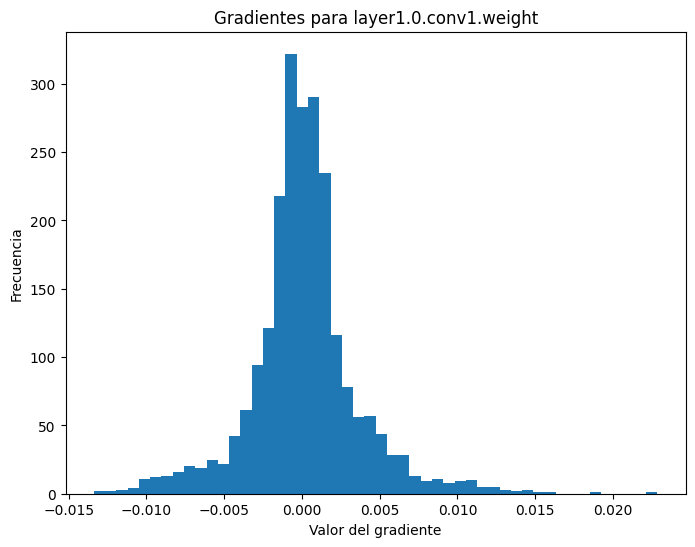

Gradientes para layer1.0.bn1.weight: min=-0.017891893163323402, max=0.009631154127418995, mean=-3.8882484659552574e-05, std=0.006703909020870924


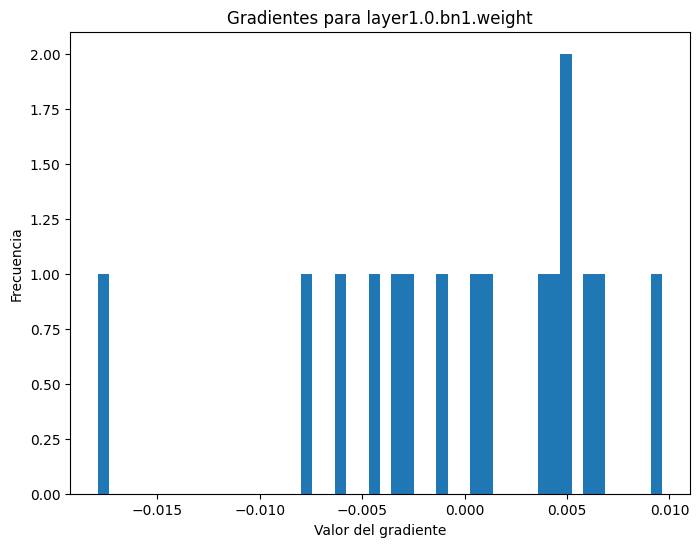

Gradientes para layer1.0.bn1.bias: min=-0.017144523561000824, max=0.014269686304032803, mean=-0.001458256389014423, std=0.009724768809974194


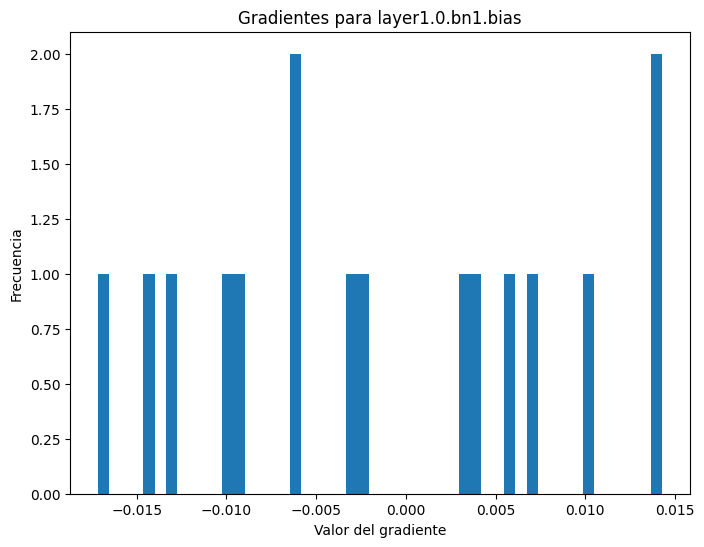

Gradientes para layer2.2.conv1.weight: min=-0.008992516435682774, max=0.009880018420517445, mean=-3.8328897062456235e-05, std=0.0012590655824169517


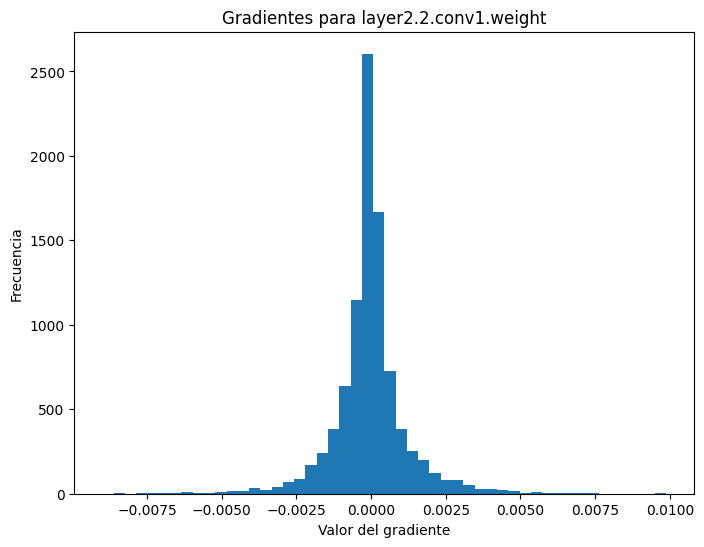

Gradientes para layer2.2.bn1.weight: min=-0.005742498207837343, max=0.005312828812748194, mean=9.421601134818047e-06, std=0.002521281596273184


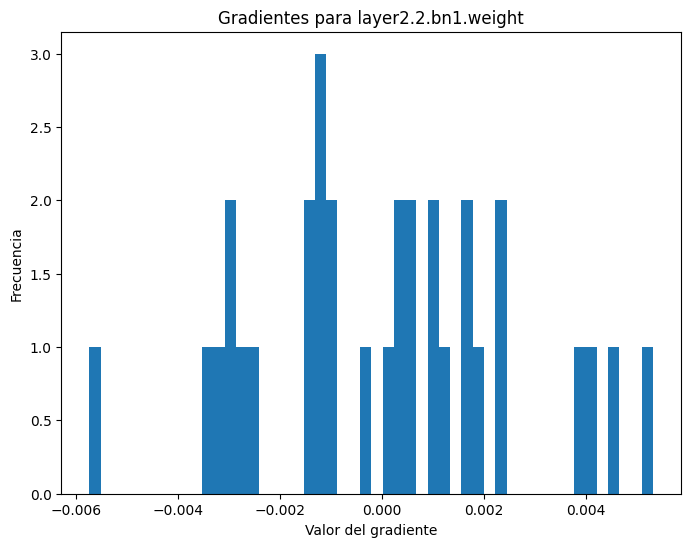

Gradientes para layer2.2.bn1.bias: min=-0.0053538065403699875, max=0.006309183780103922, mean=-0.00042633447446860373, std=0.0030645409133285284


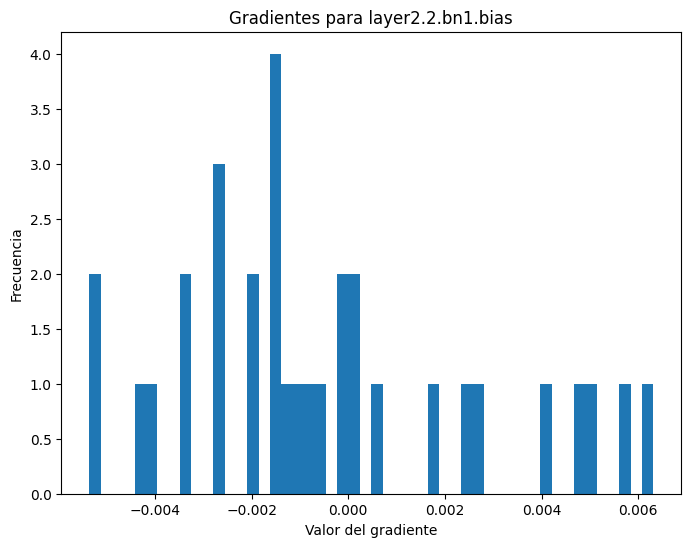

Gradientes para linear.weight: min=-0.09962766617536545, max=0.12603755295276642, mean=-1.8626451769865326e-10, std=0.03180414438247681


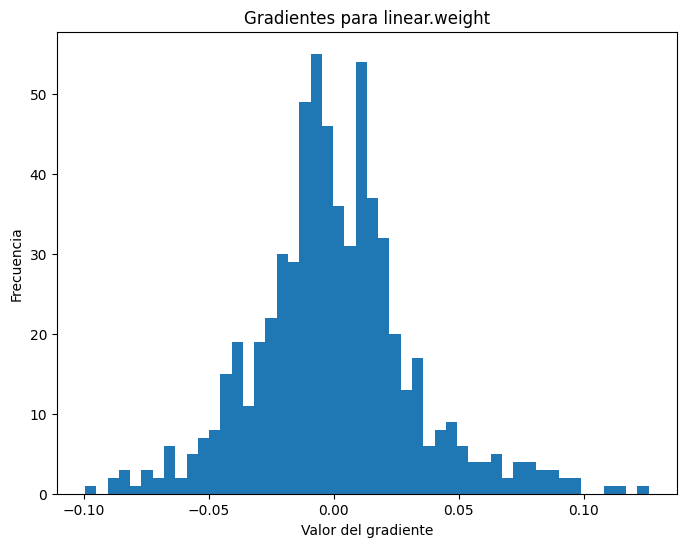

Gradientes para linear.bias: min=-0.04653812199831009, max=0.05731550231575966, mean=-1.862645149230957e-09, std=0.036945175379514694


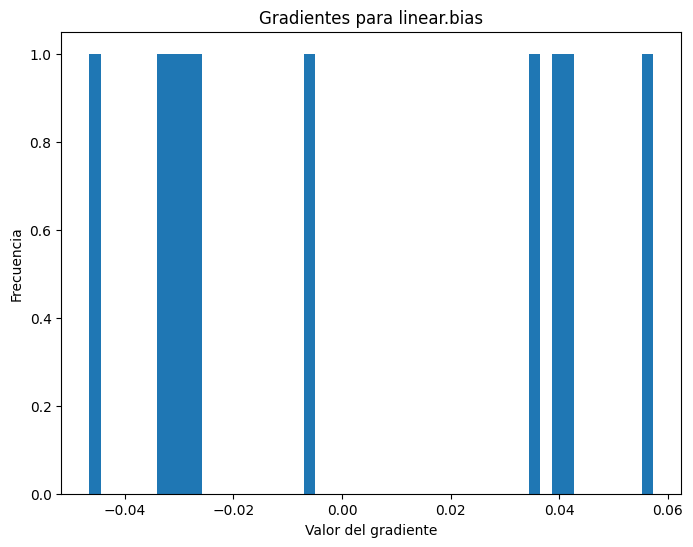

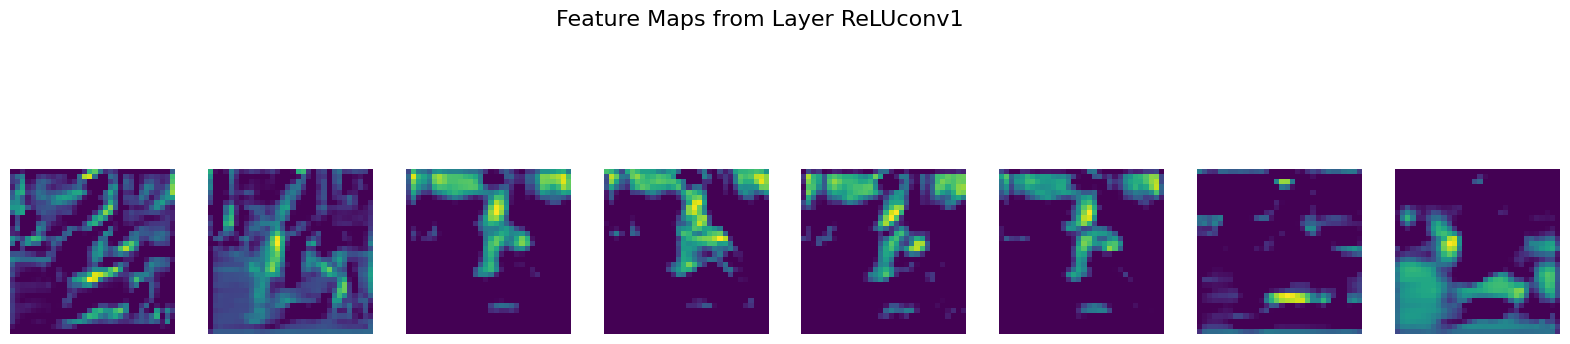

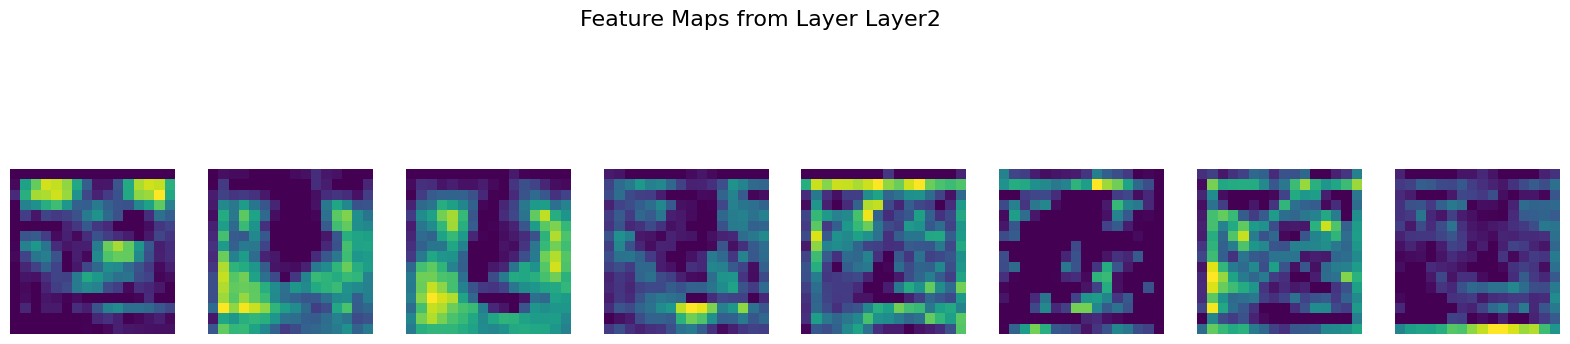

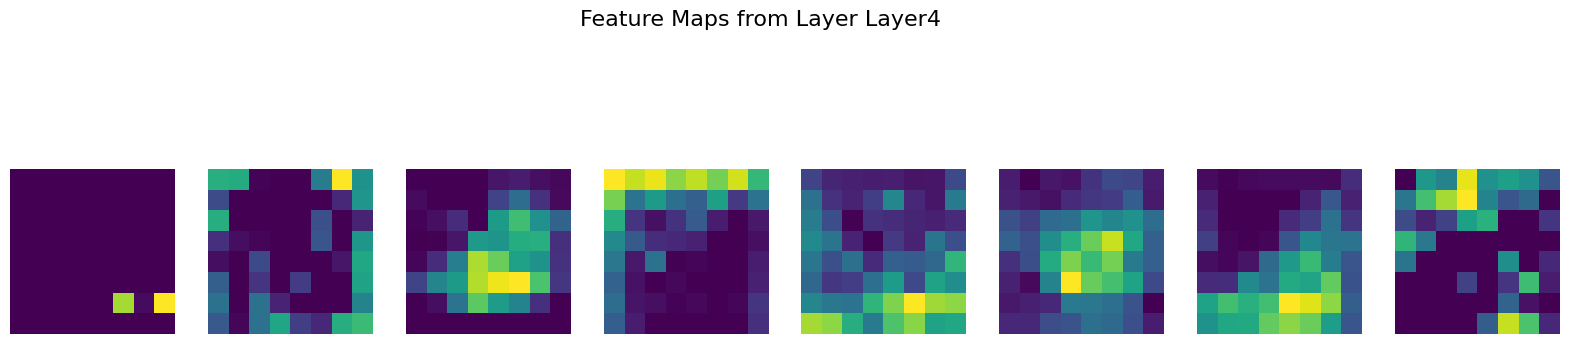

0.04
Epoch 2/70
Iteración 387 - Lote 35/352 - Pérdida de Entrenamiento: 1.6844, Precisión de Entrenamiento: 0.3721
Iteración 422 - Lote 70/352 - Pérdida de Entrenamiento: 1.6730, Precisión de Entrenamiento: 0.3773
Iteración 457 - Lote 105/352 - Pérdida de Entrenamiento: 1.6561, Precisión de Entrenamiento: 0.3836
Iteración 492 - Lote 140/352 - Pérdida de Entrenamiento: 1.6417, Precisión de Entrenamiento: 0.3901
Iteración 527 - Lote 175/352 - Pérdida de Entrenamiento: 1.6307, Precisión de Entrenamiento: 0.3945
Iteración 562 - Lote 210/352 - Pérdida de Entrenamiento: 1.6146, Precisión de Entrenamiento: 0.4000
Iteración 597 - Lote 245/352 - Pérdida de Entrenamiento: 1.5993, Precisión de Entrenamiento: 0.4069
Iteración 632 - Lote 280/352 - Pérdida de Entrenamiento: 1.5868, Precisión de Entrenamiento: 0.4132
Iteración 667 - Lote 315/352 - Pérdida de Entrenamiento: 1.5698, Precisión de Entrenamiento: 0.4198
Iteración 702 - Lote 350/352 - Pérdida de Entrenamiento: 1.5522, Precisión de Entrenam

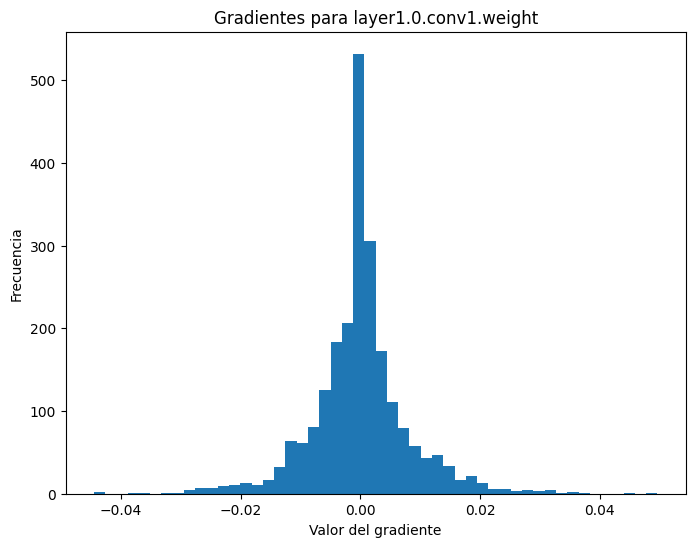

Gradientes para layer1.0.bn1.weight: min=-0.06709763407707214, max=0.078172966837883, mean=-0.0013167131692171097, std=0.03452039137482643


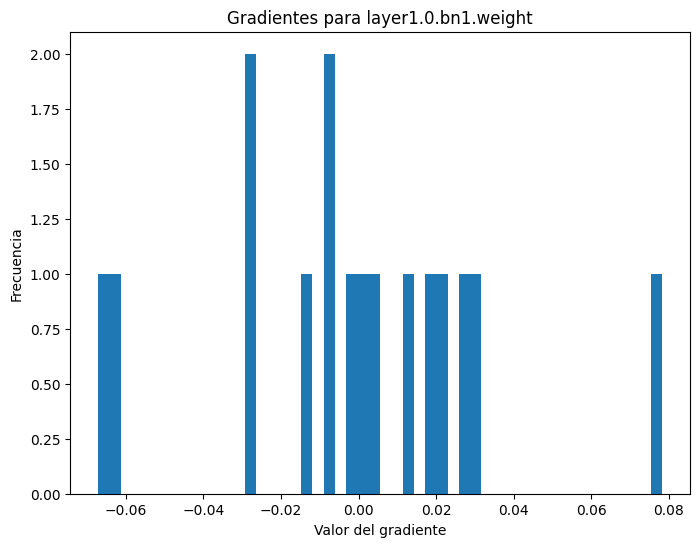

Gradientes para layer1.0.bn1.bias: min=-0.06375875324010849, max=0.032348379492759705, mean=-0.005362704396247864, std=0.024754567071795464


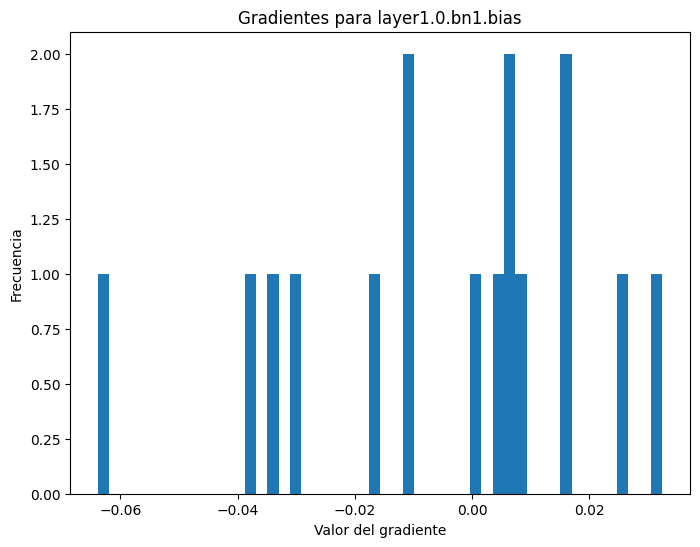

Gradientes para layer2.2.conv1.weight: min=-0.018466703593730927, max=0.025463560596108437, mean=-0.00020626786863431334, std=0.002737463917583227


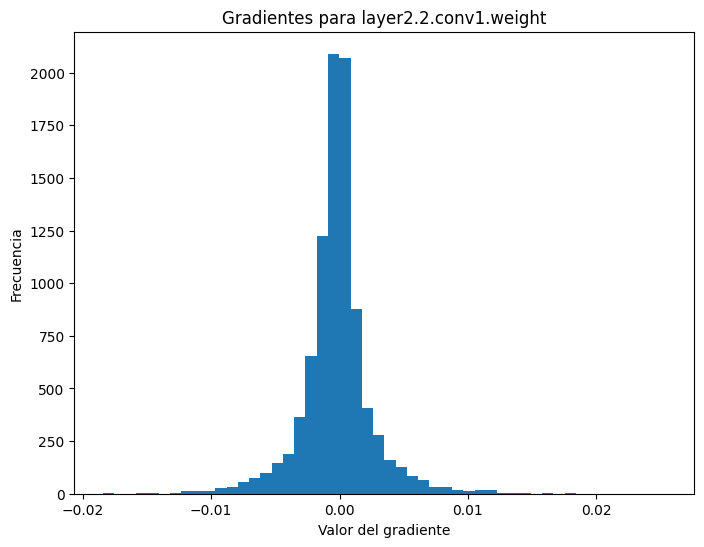

Gradientes para layer2.2.bn1.weight: min=-0.012122140266001225, max=0.007455550134181976, mean=1.1563417501747608e-05, std=0.004110910464078188


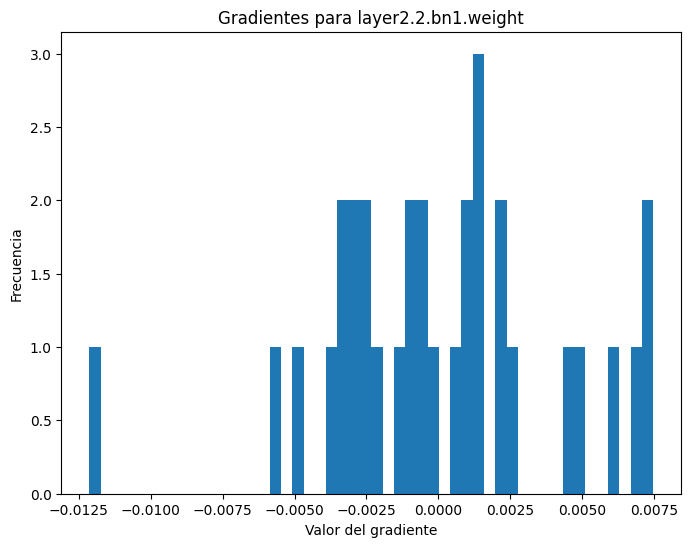

Gradientes para layer2.2.bn1.bias: min=-0.006005407776683569, max=0.010018372908234596, mean=0.0004590260796248913, std=0.0038779687602072954


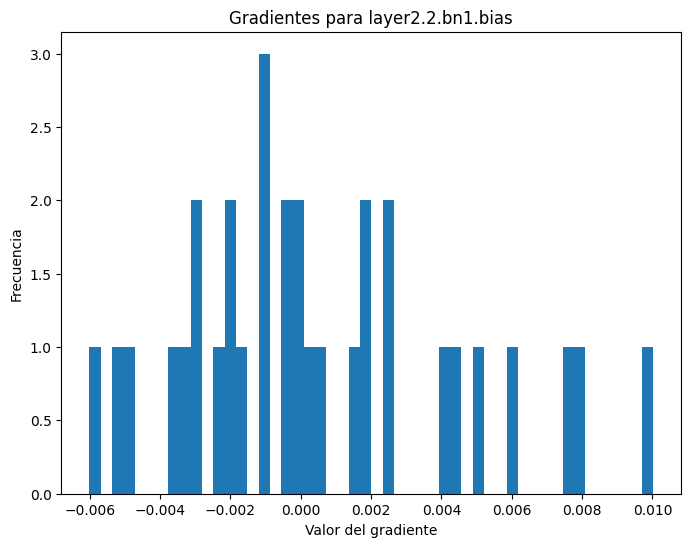

Gradientes para linear.weight: min=-0.0700434148311615, max=0.06404727697372437, mean=3.7252903539730653e-10, std=0.021253781393170357


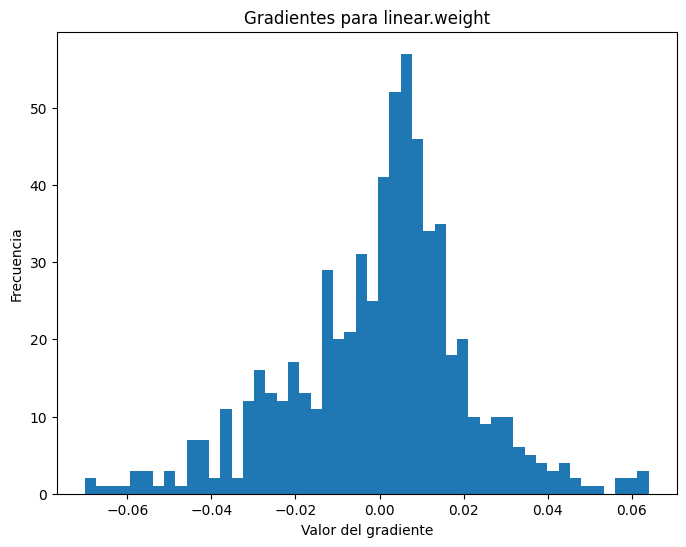

Gradientes para linear.bias: min=-0.044115059077739716, max=0.04057302698493004, mean=3.7252903539730653e-10, std=0.02424119971692562


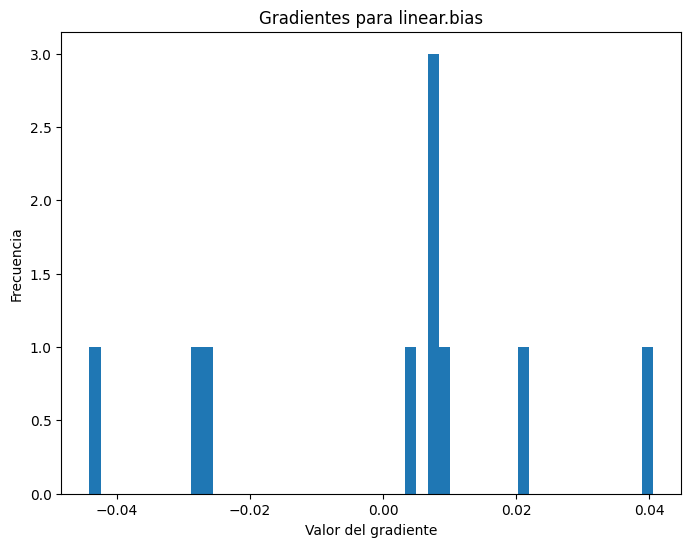

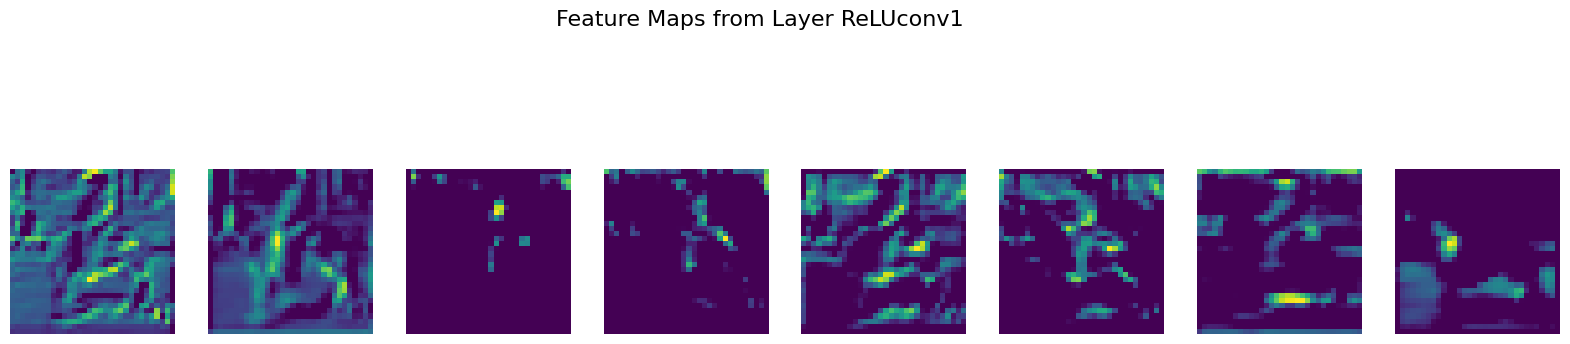

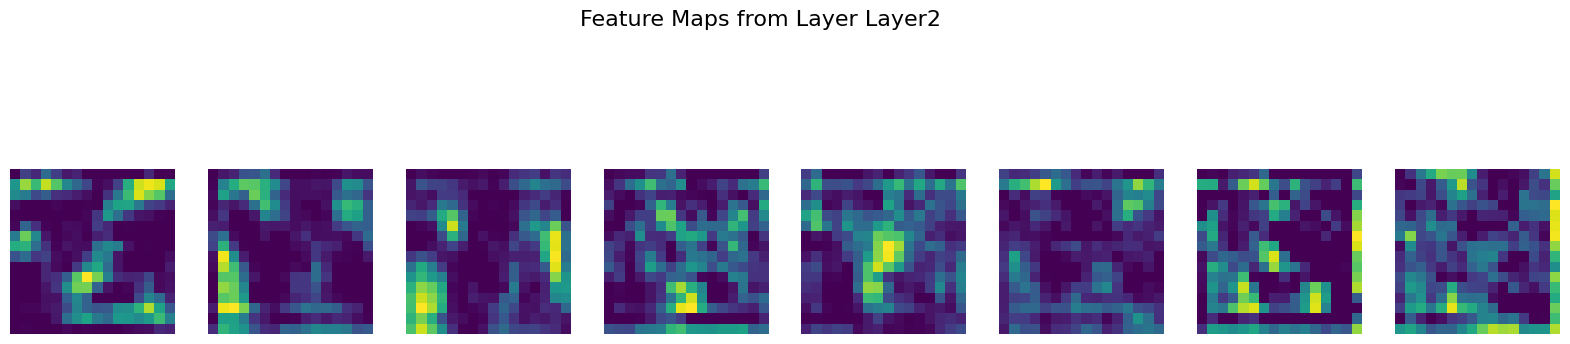

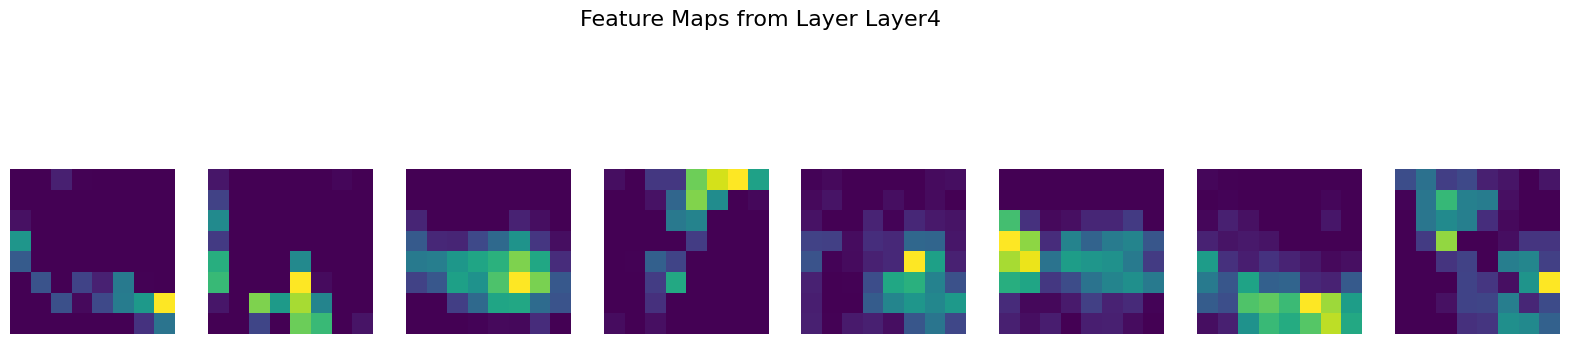

0.04
Epoch 6/70
Iteración 1795 - Lote 35/352 - Pérdida de Entrenamiento: 0.9461, Precisión de Entrenamiento: 0.6703
Iteración 1830 - Lote 70/352 - Pérdida de Entrenamiento: 0.9358, Precisión de Entrenamiento: 0.6737
Iteración 1865 - Lote 105/352 - Pérdida de Entrenamiento: 0.9222, Precisión de Entrenamiento: 0.6784
Iteración 1900 - Lote 140/352 - Pérdida de Entrenamiento: 0.9236, Precisión de Entrenamiento: 0.6783
Iteración 1935 - Lote 175/352 - Pérdida de Entrenamiento: 0.9206, Precisión de Entrenamiento: 0.6770
Iteración 1970 - Lote 210/352 - Pérdida de Entrenamiento: 0.9121, Precisión de Entrenamiento: 0.6801
Iteración 2005 - Lote 245/352 - Pérdida de Entrenamiento: 0.9099, Precisión de Entrenamiento: 0.6808
Iteración 2040 - Lote 280/352 - Pérdida de Entrenamiento: 0.9020, Precisión de Entrenamiento: 0.6830
Iteración 2075 - Lote 315/352 - Pérdida de Entrenamiento: 0.8957, Precisión de Entrenamiento: 0.6857
Iteración 2110 - Lote 350/352 - Pérdida de Entrenamiento: 0.8894, Precisión d

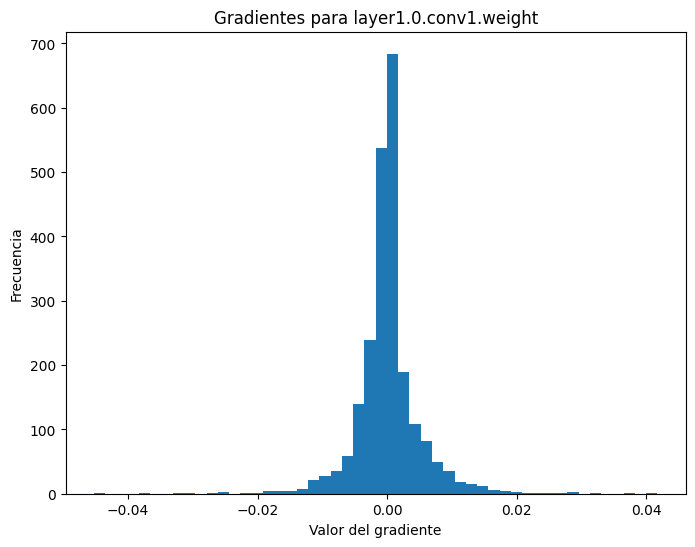

Gradientes para layer1.0.bn1.weight: min=-0.02374212071299553, max=0.04753904789686203, mean=0.0032354528084397316, std=0.01680944301187992


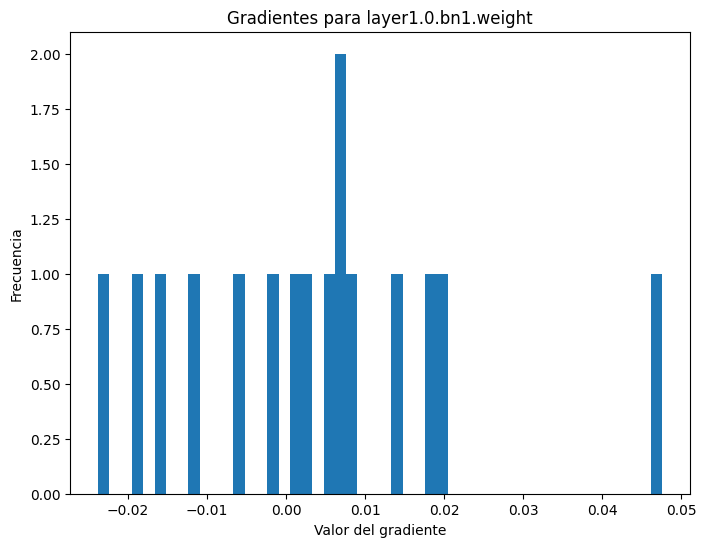

Gradientes para layer1.0.bn1.bias: min=-0.023931168019771576, max=0.03284917771816254, mean=-0.001458926941268146, std=0.013976333662867546


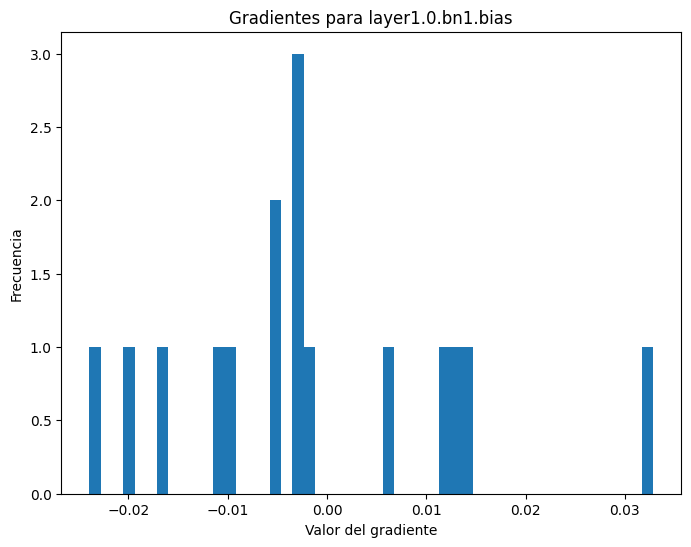

Gradientes para layer2.2.conv1.weight: min=-0.017086457461118698, max=0.019005008041858673, mean=2.7866897653439082e-05, std=0.0022104971576482058


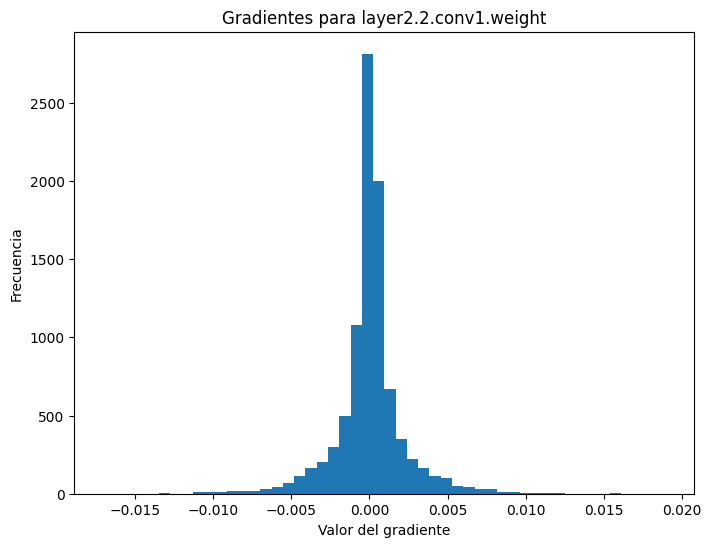

Gradientes para layer2.2.bn1.weight: min=-0.010472833178937435, max=0.00952974520623684, mean=-4.589877789840102e-05, std=0.004617058672010899


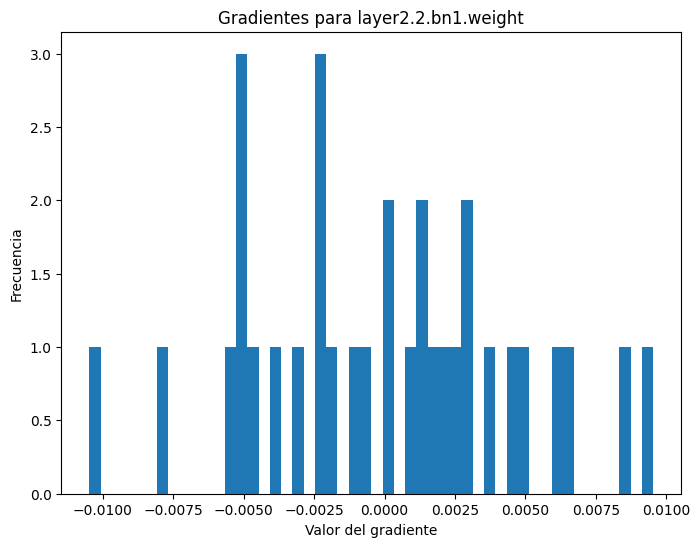

Gradientes para layer2.2.bn1.bias: min=-0.009305737912654877, max=0.005959099158644676, mean=-0.0006112292176112533, std=0.004026053473353386


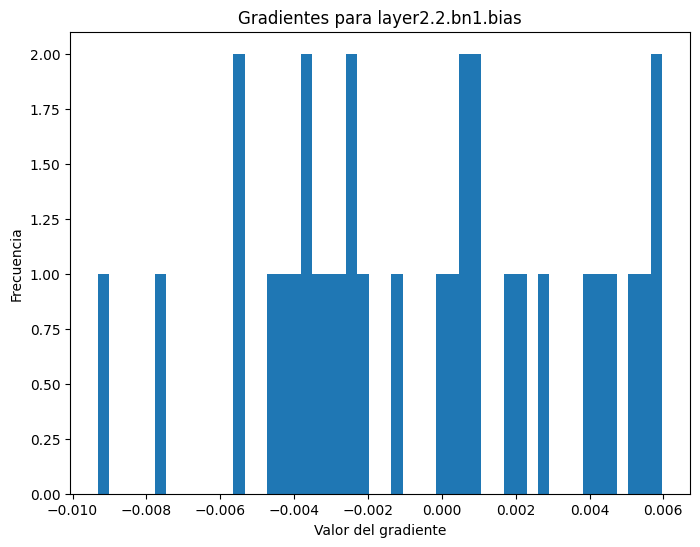

Gradientes para linear.weight: min=-0.06774727255105972, max=0.10474921017885208, mean=7.450580707946131e-10, std=0.017114154994487762


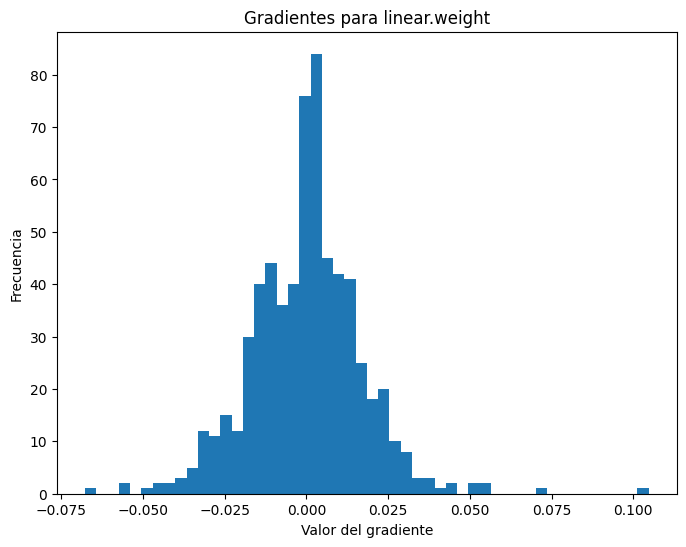

Gradientes para linear.bias: min=-0.03236376866698265, max=0.03579843416810036, mean=1.1175871339474952e-09, std=0.023482533171772957


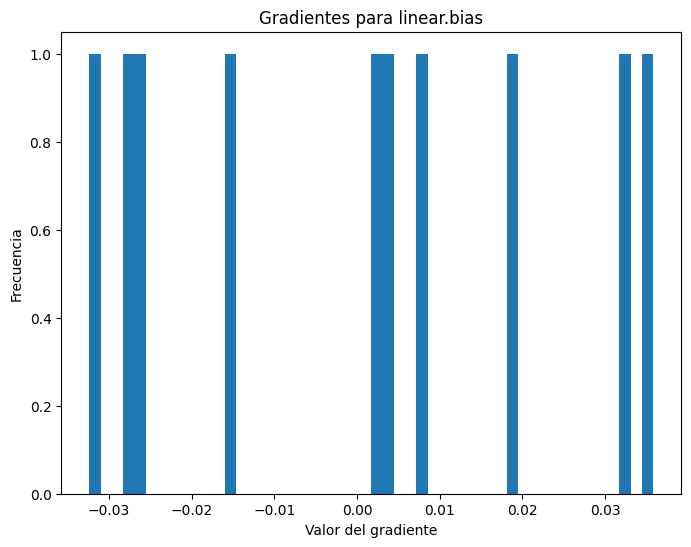

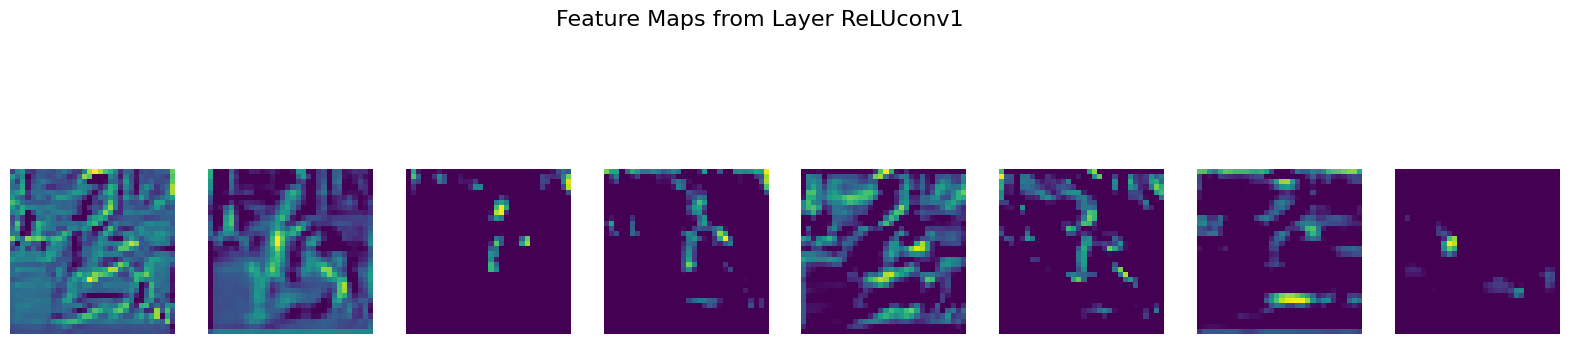

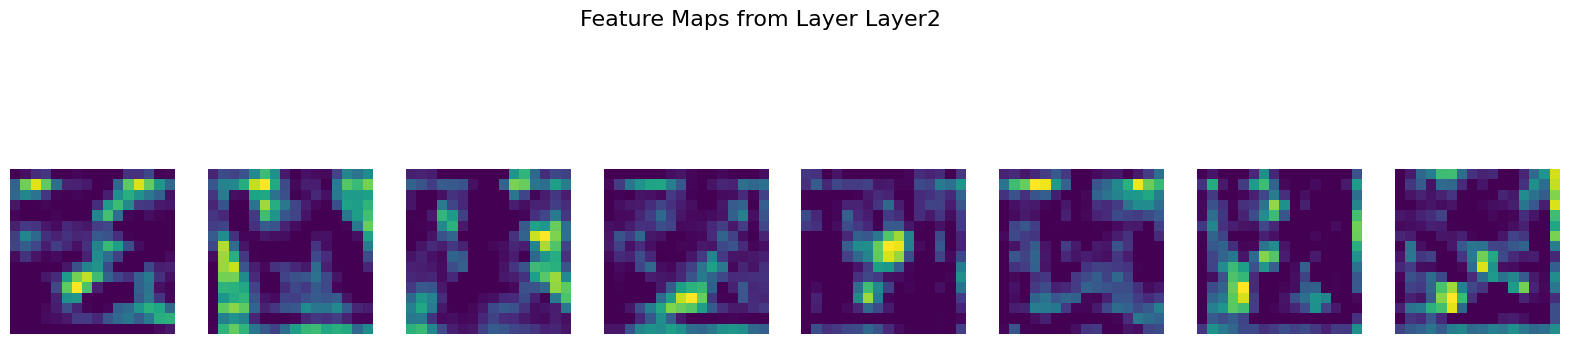

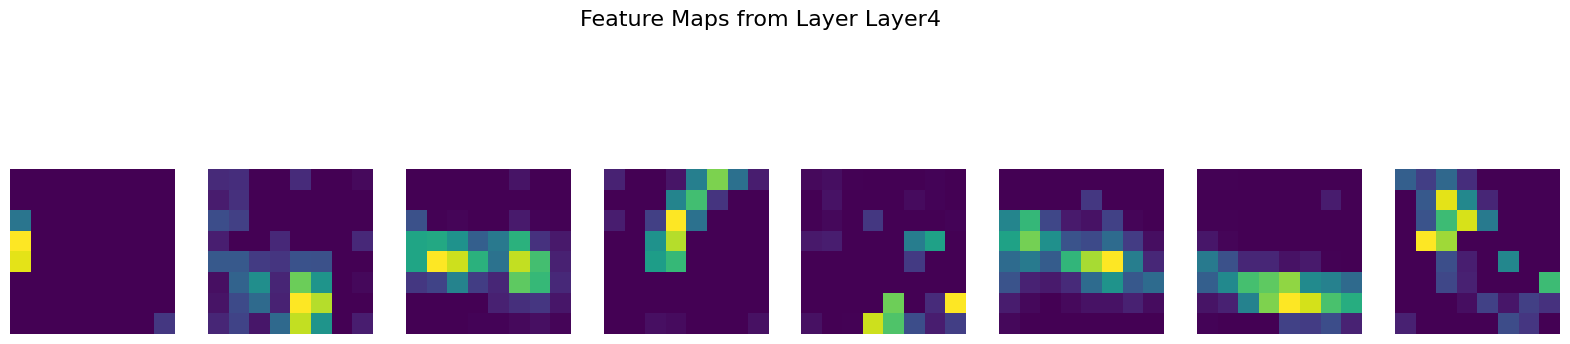

0.04
Epoch 11/70
Iteración 3555 - Lote 35/352 - Pérdida de Entrenamiento: 0.6156, Precisión de Entrenamiento: 0.7866
Iteración 3590 - Lote 70/352 - Pérdida de Entrenamiento: 0.6241, Precisión de Entrenamiento: 0.7866
Iteración 3625 - Lote 105/352 - Pérdida de Entrenamiento: 0.6136, Precisión de Entrenamiento: 0.7893
Iteración 3660 - Lote 140/352 - Pérdida de Entrenamiento: 0.6148, Precisión de Entrenamiento: 0.7891
Iteración 3695 - Lote 175/352 - Pérdida de Entrenamiento: 0.6151, Precisión de Entrenamiento: 0.7884
Iteración 3730 - Lote 210/352 - Pérdida de Entrenamiento: 0.6179, Precisión de Entrenamiento: 0.7868
Iteración 3765 - Lote 245/352 - Pérdida de Entrenamiento: 0.6151, Precisión de Entrenamiento: 0.7876
Iteración 3800 - Lote 280/352 - Pérdida de Entrenamiento: 0.6101, Precisión de Entrenamiento: 0.7882
Iteración 3835 - Lote 315/352 - Pérdida de Entrenamiento: 0.6071, Precisión de Entrenamiento: 0.7895
Iteración 3870 - Lote 350/352 - Pérdida de Entrenamiento: 0.6084, Precisión 

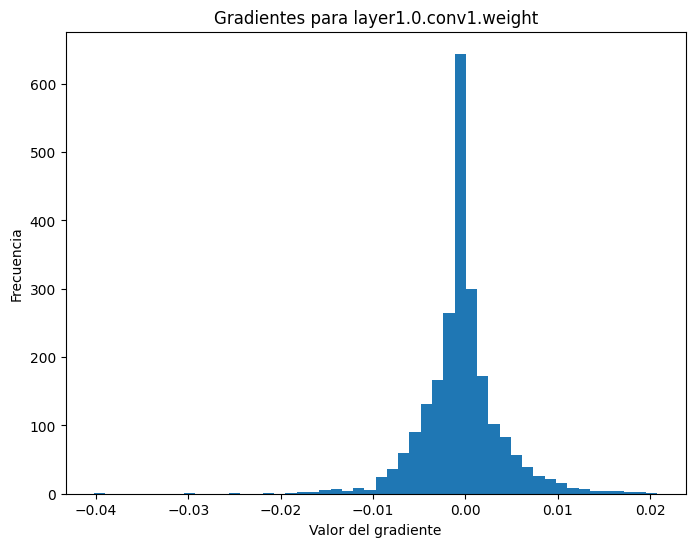

Gradientes para layer1.0.bn1.weight: min=-0.0222775861620903, max=0.011834575794637203, mean=-0.001302110031247139, std=0.010335447266697884


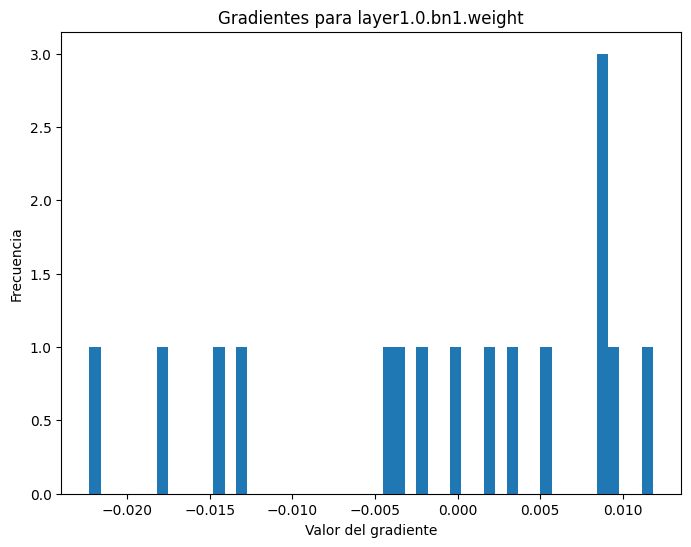

Gradientes para layer1.0.bn1.bias: min=-0.021238895133137703, max=0.0364648811519146, mean=0.0002832375466823578, std=0.012988368049263954


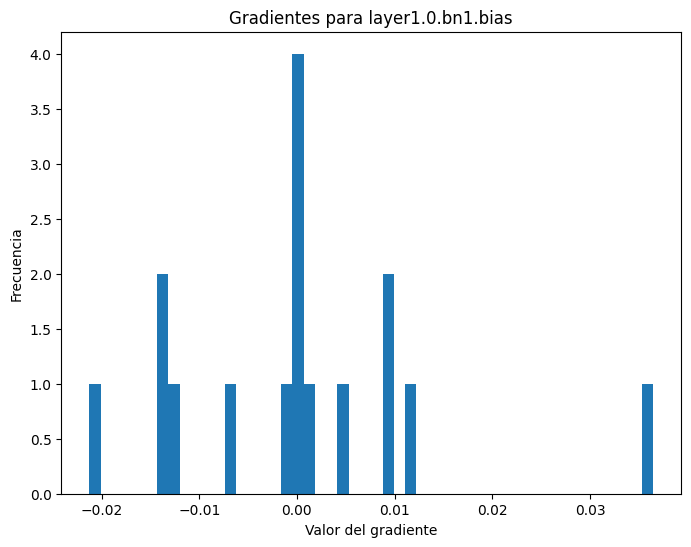

Gradientes para layer2.2.conv1.weight: min=-0.017148563638329506, max=0.019069671630859375, mean=0.00011260221799602732, std=0.0028204862028360367


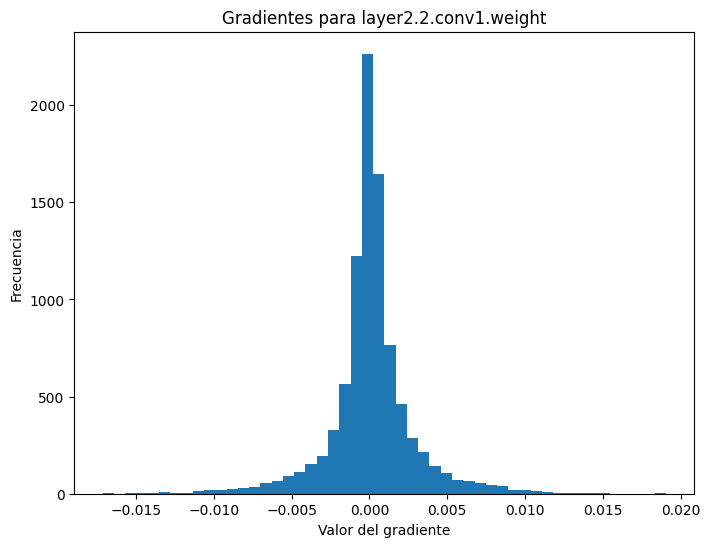

Gradientes para layer2.2.bn1.weight: min=-0.011444424279034138, max=0.011296357959508896, mean=5.440728273242712e-05, std=0.005915544927120209


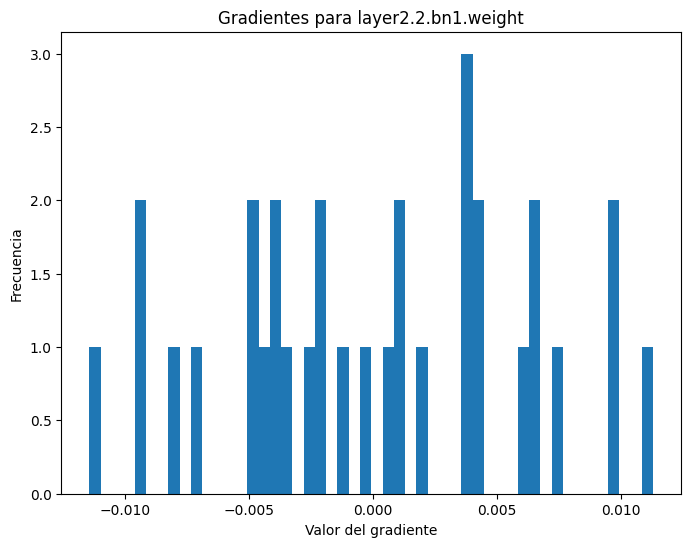

Gradientes para layer2.2.bn1.bias: min=-0.01440415158867836, max=0.009175341576337814, mean=-0.0005241570179350674, std=0.0052856155671179295


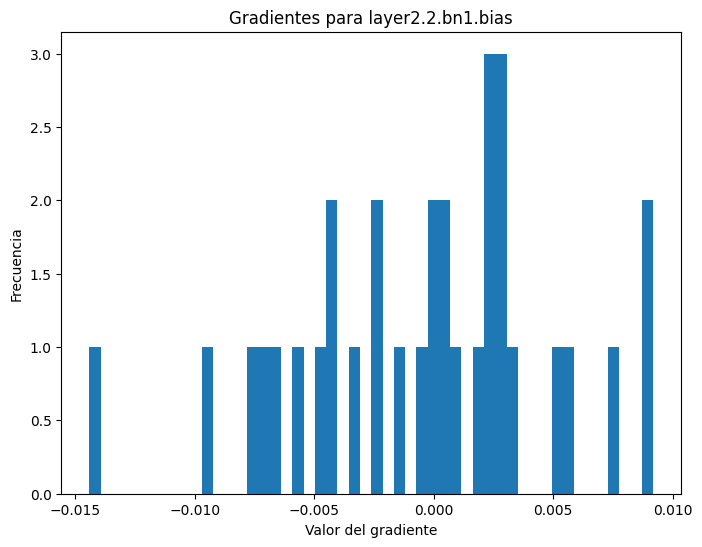

Gradientes para linear.weight: min=-0.06926815211772919, max=0.056697696447372437, mean=1.8626451769865326e-10, std=0.013800403103232384


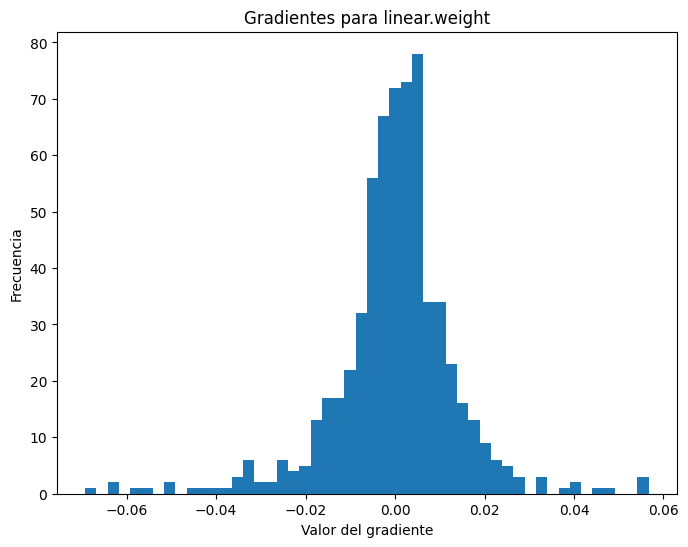

Gradientes para linear.bias: min=-0.053224705159664154, max=0.030304599553346634, mean=-9.313225884932663e-11, std=0.021014714613556862


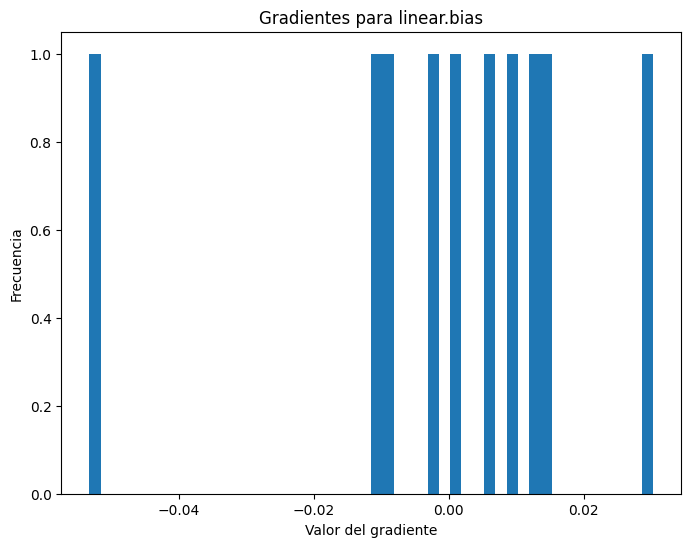

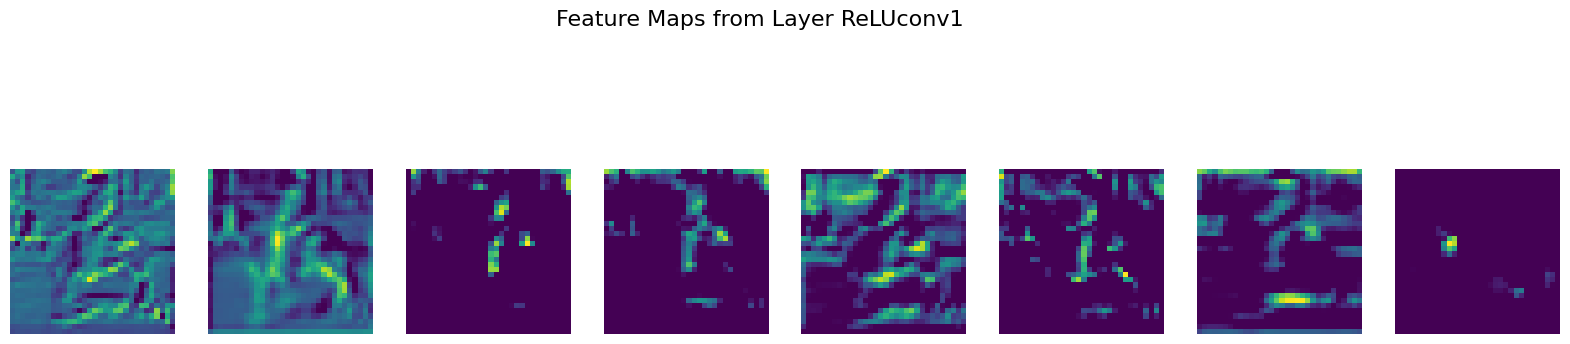

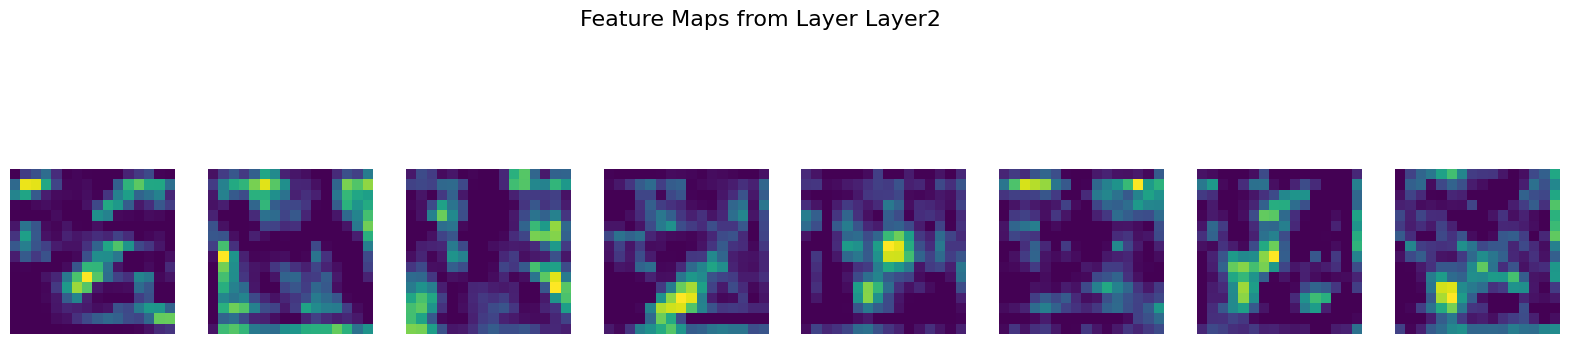

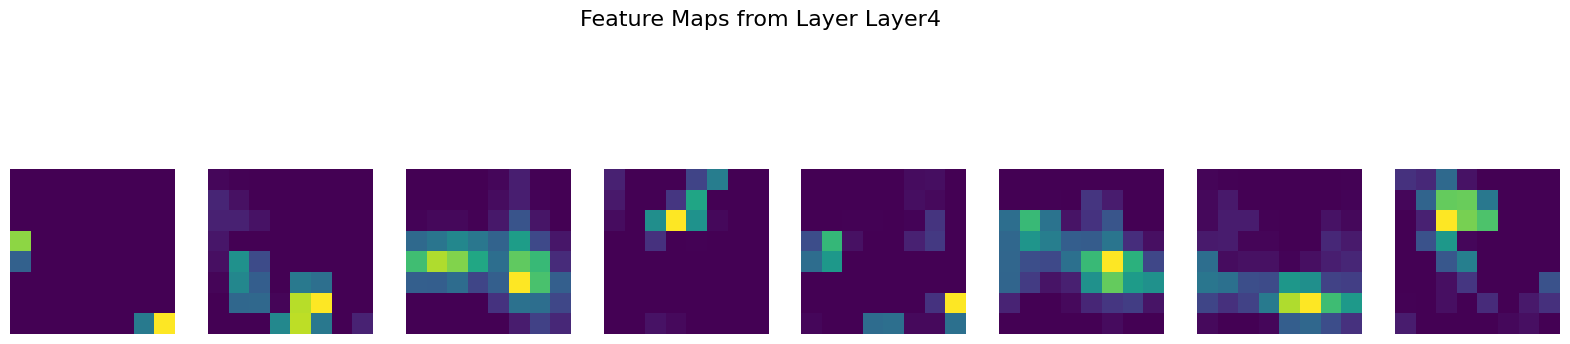

0.04
Epoch 16/70
Iteración 5315 - Lote 35/352 - Pérdida de Entrenamiento: 0.4839, Precisión de Entrenamiento: 0.8348
Iteración 5350 - Lote 70/352 - Pérdida de Entrenamiento: 0.4888, Precisión de Entrenamiento: 0.8302
Iteración 5385 - Lote 105/352 - Pérdida de Entrenamiento: 0.4934, Precisión de Entrenamiento: 0.8298
Iteración 5420 - Lote 140/352 - Pérdida de Entrenamiento: 0.4919, Precisión de Entrenamiento: 0.8297
Iteración 5455 - Lote 175/352 - Pérdida de Entrenamiento: 0.4900, Precisión de Entrenamiento: 0.8312
Iteración 5490 - Lote 210/352 - Pérdida de Entrenamiento: 0.4901, Precisión de Entrenamiento: 0.8311
Iteración 5525 - Lote 245/352 - Pérdida de Entrenamiento: 0.4930, Precisión de Entrenamiento: 0.8311
Iteración 5560 - Lote 280/352 - Pérdida de Entrenamiento: 0.4937, Precisión de Entrenamiento: 0.8311
Iteración 5595 - Lote 315/352 - Pérdida de Entrenamiento: 0.4929, Precisión de Entrenamiento: 0.8315
Iteración 5630 - Lote 350/352 - Pérdida de Entrenamiento: 0.4930, Precisión 

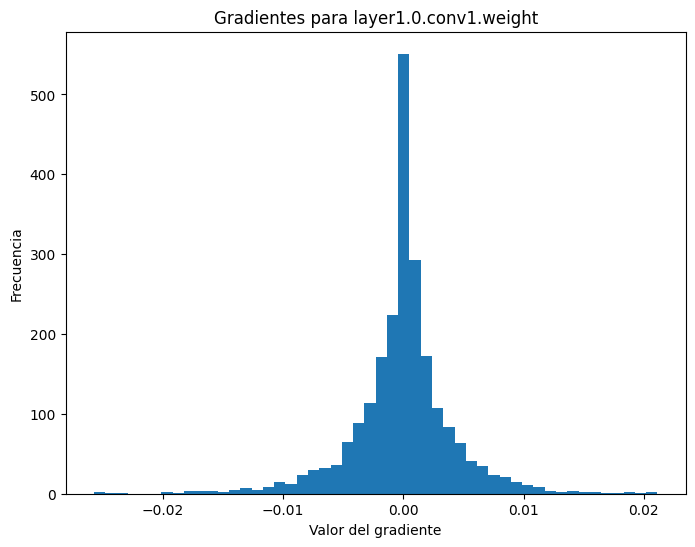

Gradientes para layer1.0.bn1.weight: min=-0.03043602965772152, max=0.027329908683896065, mean=-0.0008892157347872853, std=0.014201746322214603


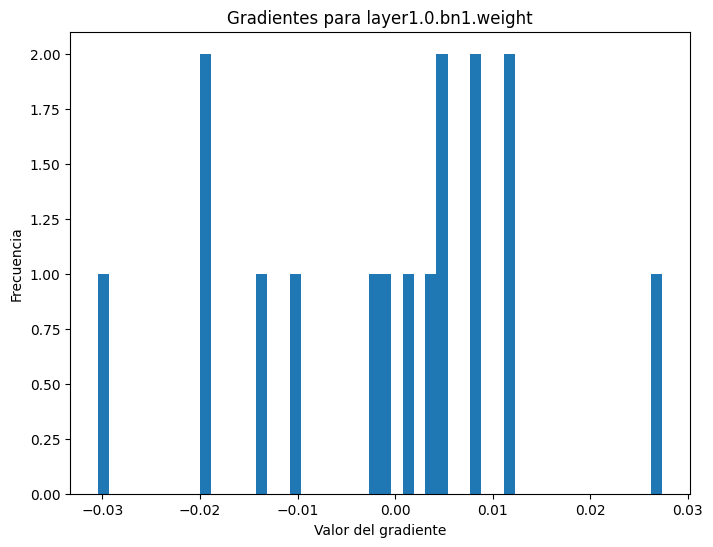

Gradientes para layer1.0.bn1.bias: min=-0.01754368282854557, max=0.03577650338411331, mean=0.00024501048028469086, std=0.013841133564710617


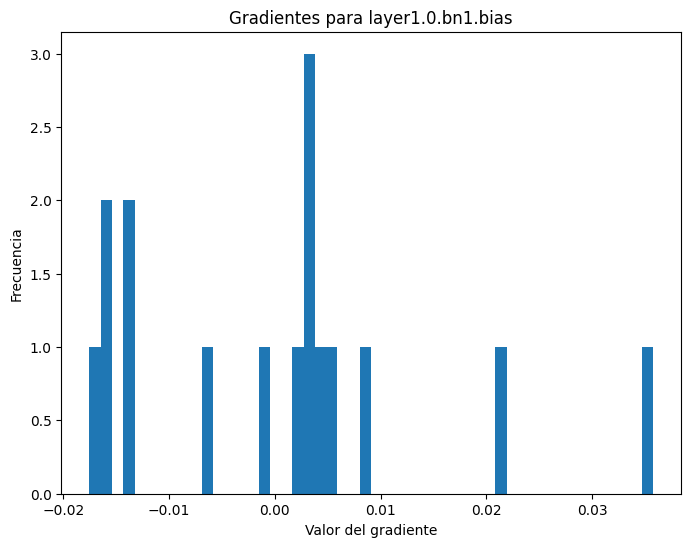

Gradientes para layer2.2.conv1.weight: min=-0.015649592503905296, max=0.011008149944245815, mean=-4.874008664046414e-05, std=0.0018072426319122314


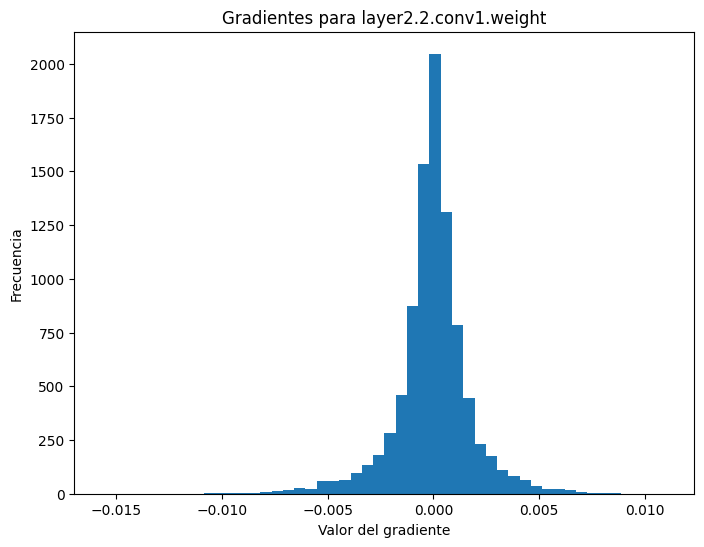

Gradientes para layer2.2.bn1.weight: min=-0.009525502100586891, max=0.009775363840162754, mean=0.0001755724661052227, std=0.0050003486685454845


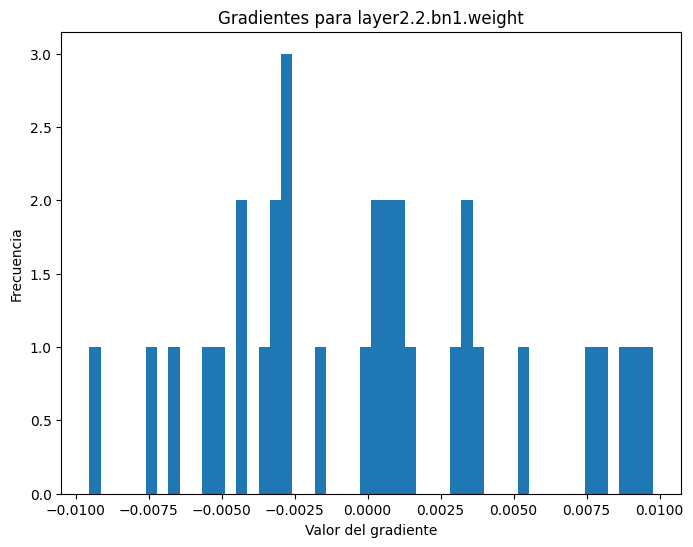

Gradientes para layer2.2.bn1.bias: min=-0.005872029811143875, max=0.007286081090569496, mean=6.591055716853589e-05, std=0.0039625996723771095


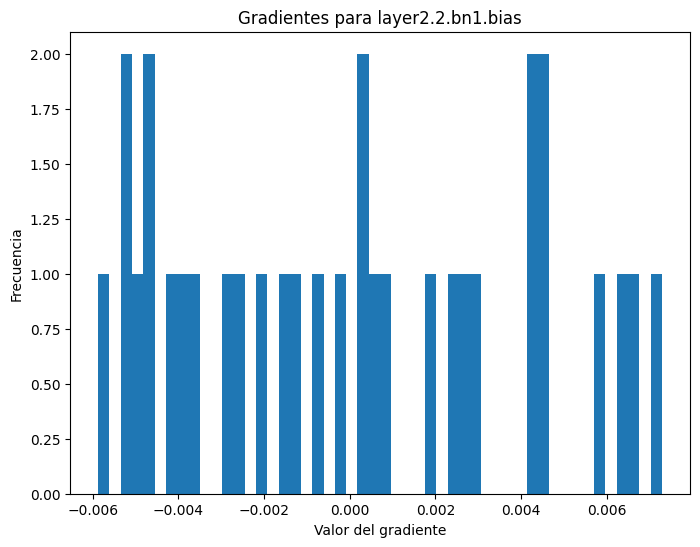

Gradientes para linear.weight: min=-0.04886151850223541, max=0.04709409177303314, mean=7.450580707946131e-10, std=0.015329409390687943


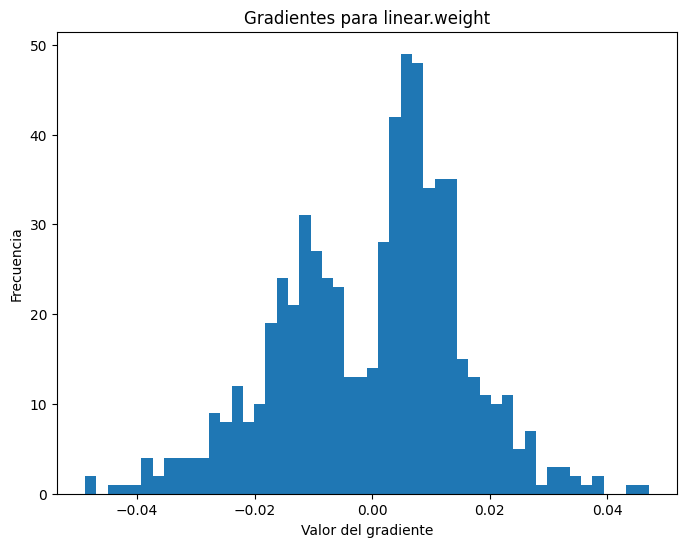

Gradientes para linear.bias: min=-0.035820238292217255, max=0.03665827959775925, mean=1.4901161415892261e-09, std=0.022270435467362404


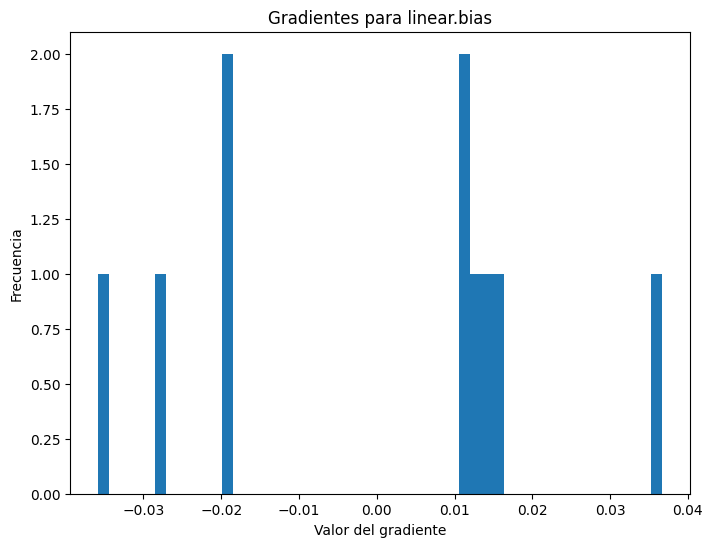

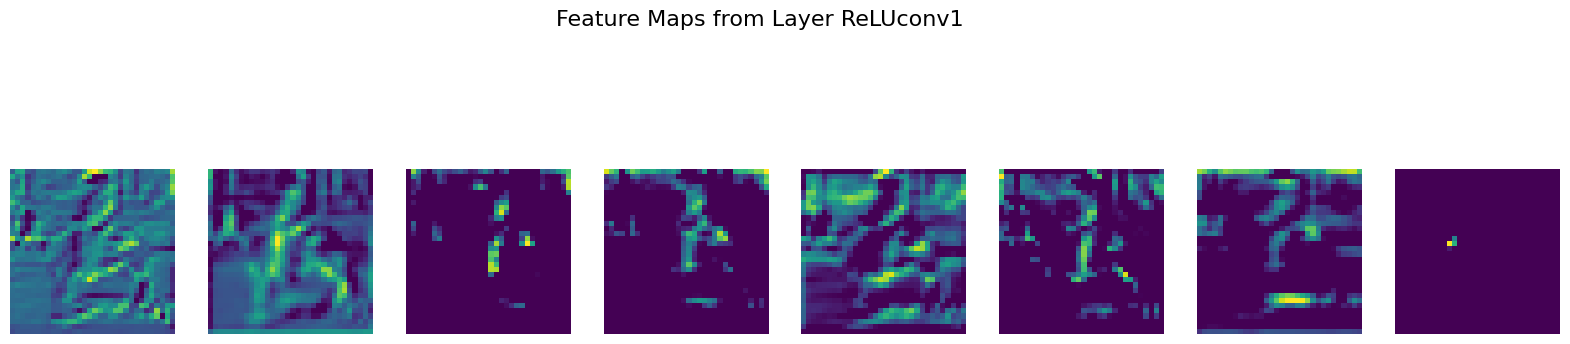

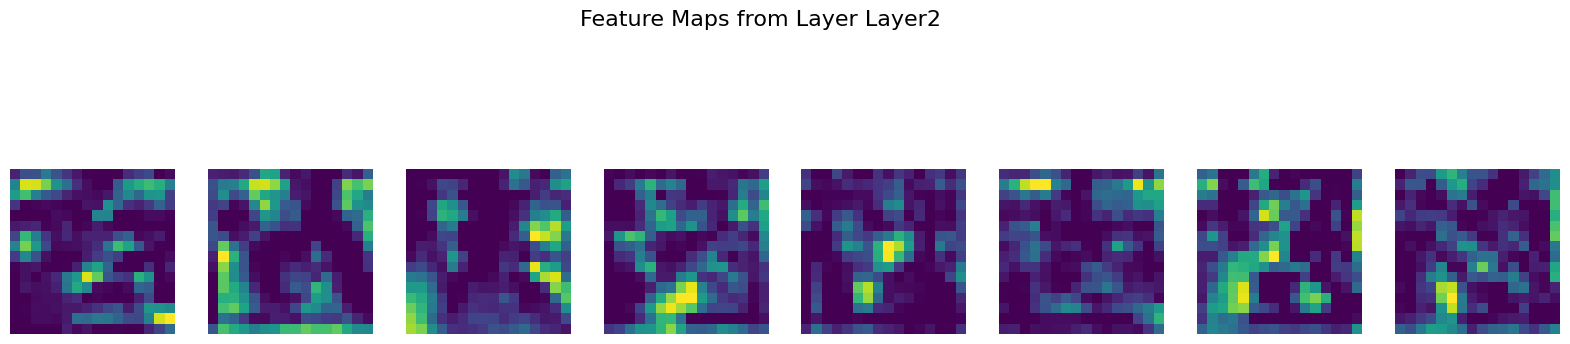

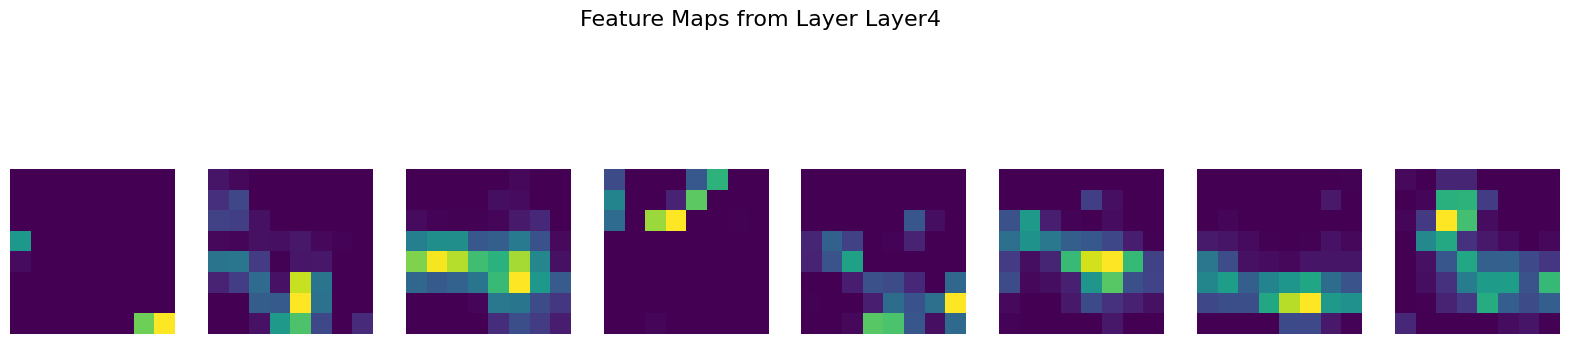

0.04
Epoch 21/70
Iteración 7075 - Lote 35/352 - Pérdida de Entrenamiento: 0.4012, Precisión de Entrenamiento: 0.8654
Iteración 7110 - Lote 70/352 - Pérdida de Entrenamiento: 0.4098, Precisión de Entrenamiento: 0.8599
Iteración 7145 - Lote 105/352 - Pérdida de Entrenamiento: 0.4040, Precisión de Entrenamiento: 0.8597
Iteración 7180 - Lote 140/352 - Pérdida de Entrenamiento: 0.4087, Precisión de Entrenamiento: 0.8579
Iteración 7215 - Lote 175/352 - Pérdida de Entrenamiento: 0.4038, Precisión de Entrenamiento: 0.8595
Iteración 7250 - Lote 210/352 - Pérdida de Entrenamiento: 0.4059, Precisión de Entrenamiento: 0.8596
Iteración 7285 - Lote 245/352 - Pérdida de Entrenamiento: 0.4060, Precisión de Entrenamiento: 0.8587
Iteración 7320 - Lote 280/352 - Pérdida de Entrenamiento: 0.4109, Precisión de Entrenamiento: 0.8573
Iteración 7355 - Lote 315/352 - Pérdida de Entrenamiento: 0.4115, Precisión de Entrenamiento: 0.8568
Iteración 7390 - Lote 350/352 - Pérdida de Entrenamiento: 0.4124, Precisión 

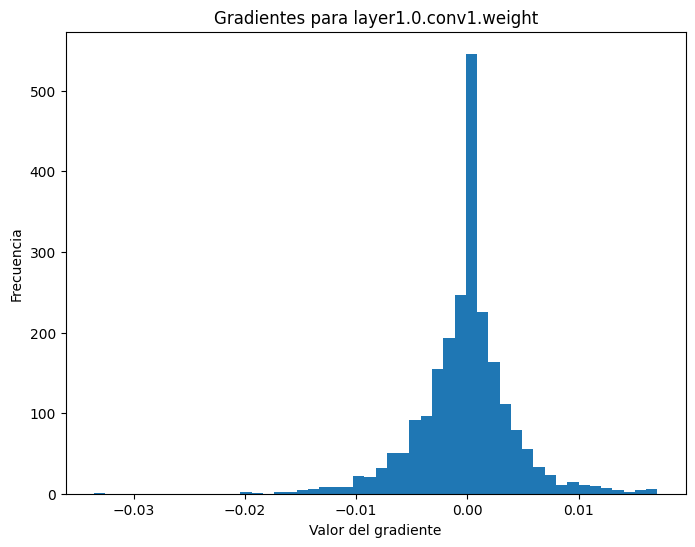

Gradientes para layer1.0.bn1.weight: min=-0.023116666823625565, max=0.021884456276893616, mean=-0.0011050526518374681, std=0.011129594407975674


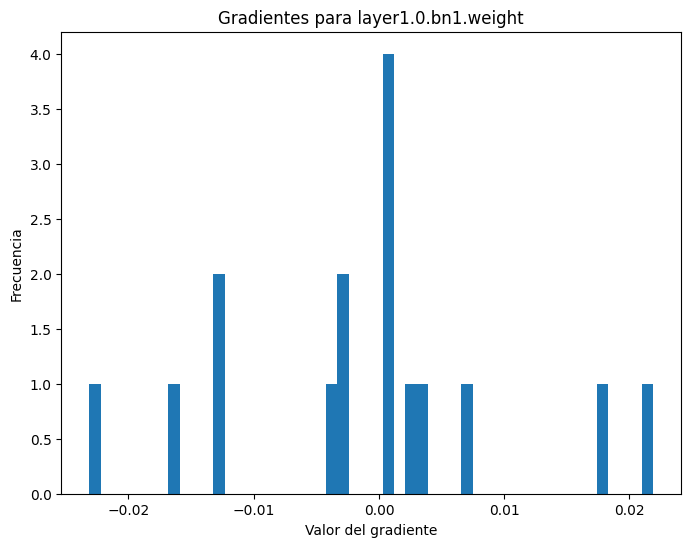

Gradientes para layer1.0.bn1.bias: min=-0.0203215591609478, max=0.012894229963421822, mean=-0.0006055429112166166, std=0.008842874318361282


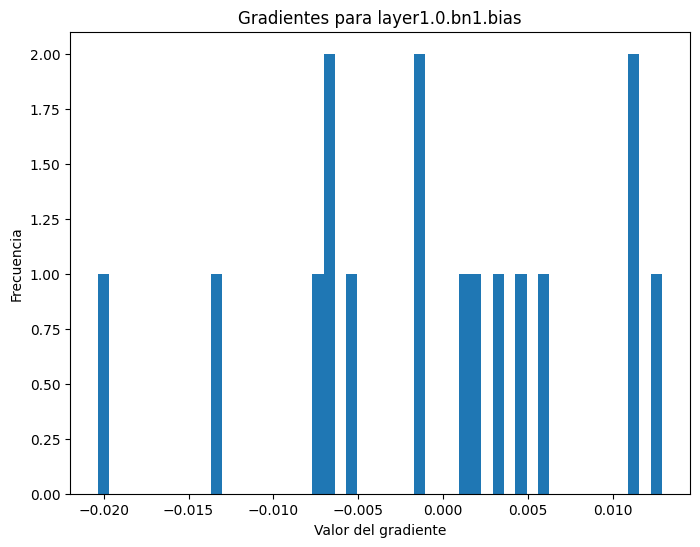

Gradientes para layer2.2.conv1.weight: min=-0.01605619117617607, max=0.015092229470610619, mean=6.856974505353719e-05, std=0.002543806564062834


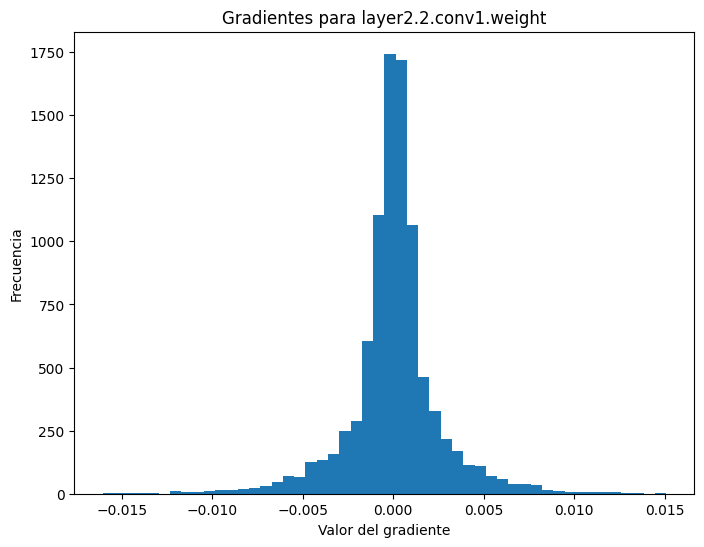

Gradientes para layer2.2.bn1.weight: min=-0.013393471017479897, max=0.010484310798346996, mean=-0.00026196526596322656, std=0.006912301294505596


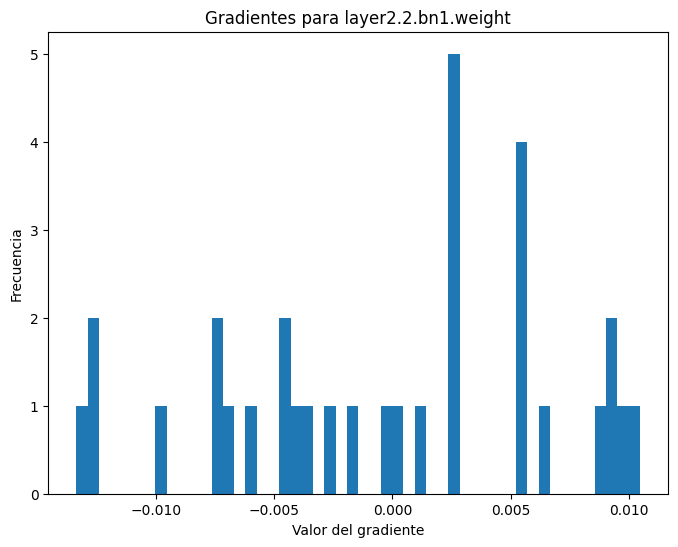

Gradientes para layer2.2.bn1.bias: min=-0.015242103487253189, max=0.014540315605700016, mean=-0.000405213882913813, std=0.006789702922105789


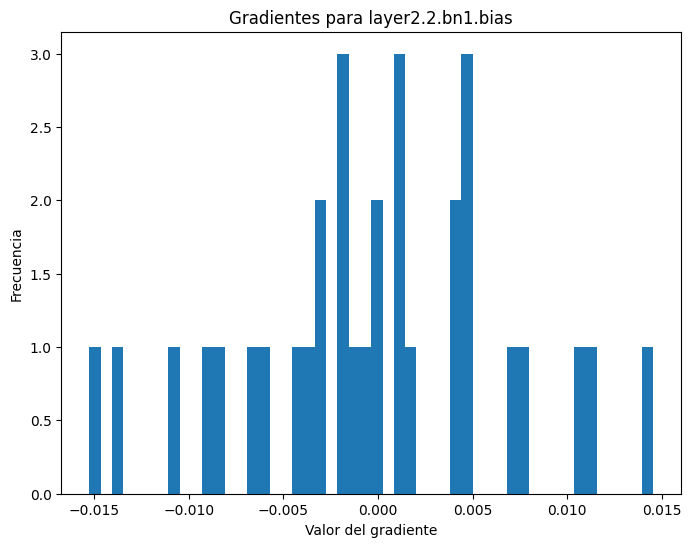

Gradientes para linear.weight: min=-0.04792683199048042, max=0.056521639227867126, mean=5.122274271407434e-10, std=0.012219754047691822


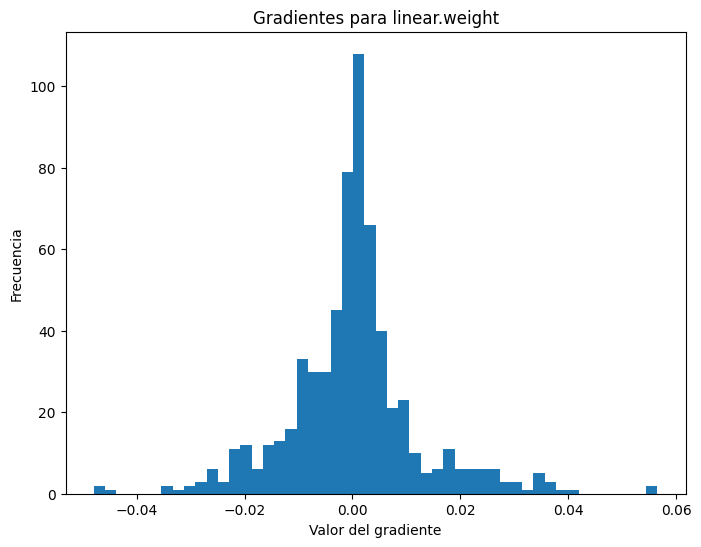

Gradientes para linear.bias: min=-0.03553779050707817, max=0.04441424459218979, mean=3.376044444003412e-10, std=0.019662056118249893


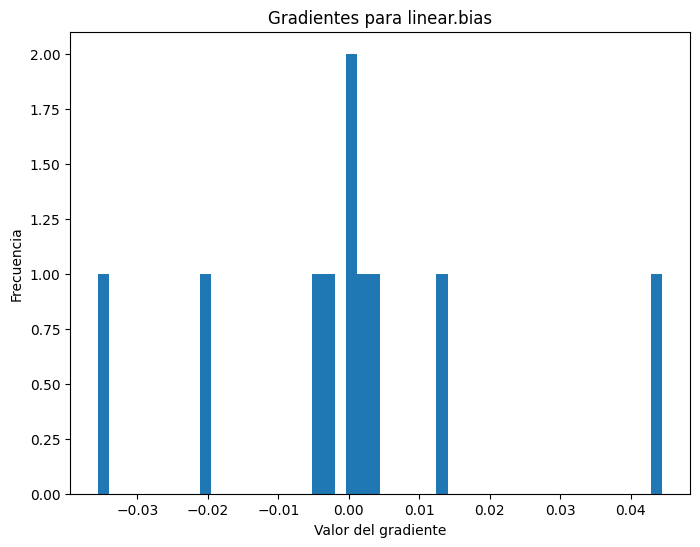

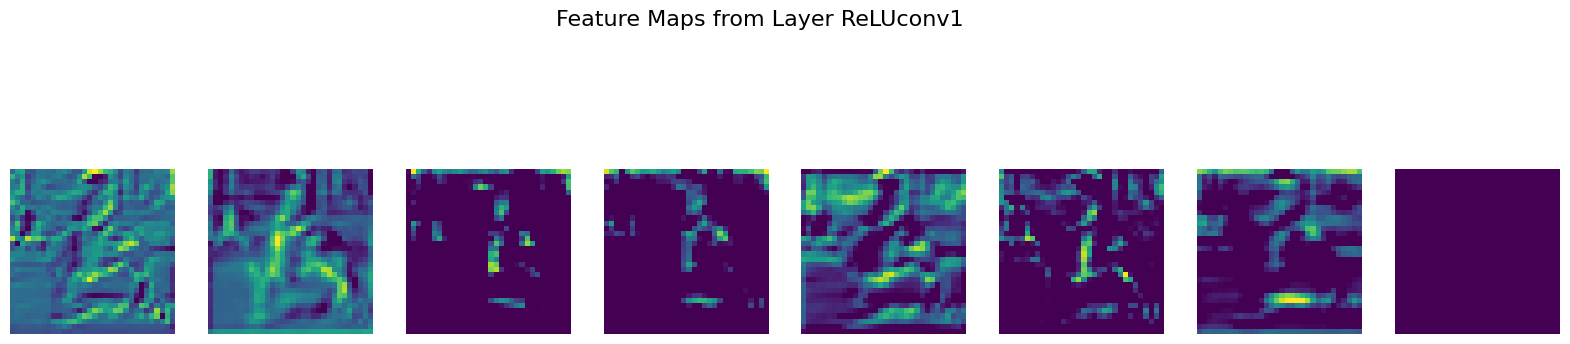

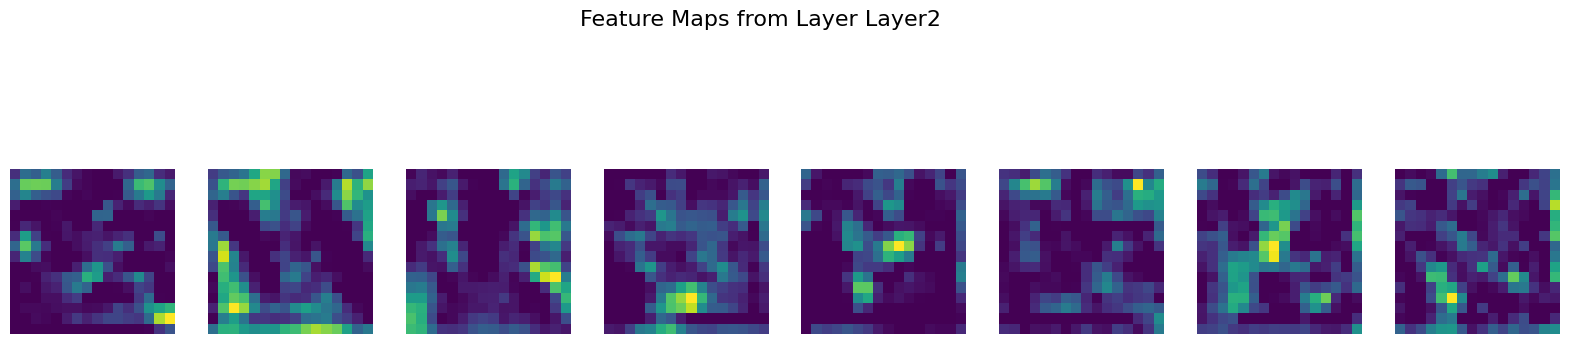

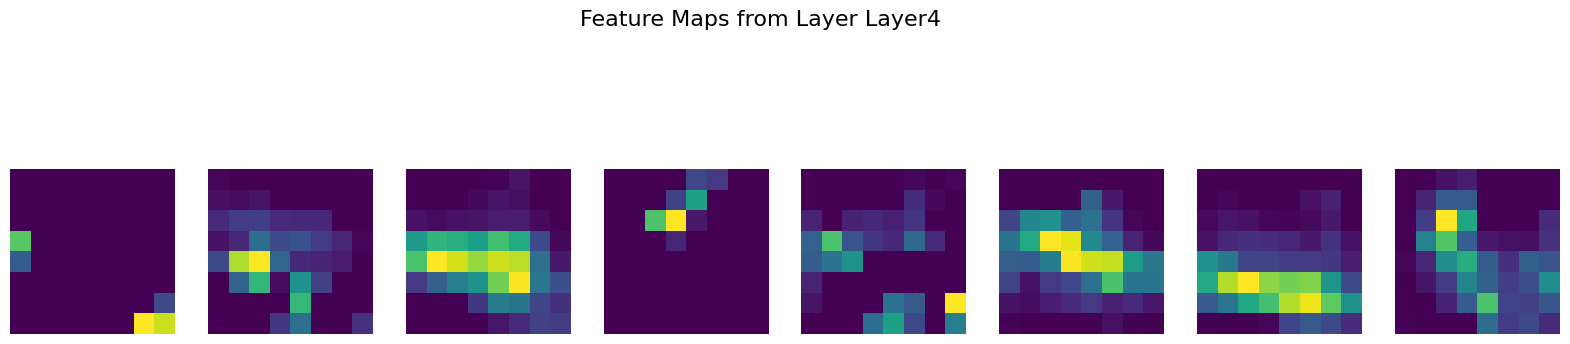

0.04
Epoch 26/70
Iteración 8835 - Lote 35/352 - Pérdida de Entrenamiento: 0.3461, Precisión de Entrenamiento: 0.8768
Iteración 8870 - Lote 70/352 - Pérdida de Entrenamiento: 0.3493, Precisión de Entrenamiento: 0.8763
Iteración 8905 - Lote 105/352 - Pérdida de Entrenamiento: 0.3447, Precisión de Entrenamiento: 0.8781
Iteración 8940 - Lote 140/352 - Pérdida de Entrenamiento: 0.3480, Precisión de Entrenamiento: 0.8768
Iteración 8975 - Lote 175/352 - Pérdida de Entrenamiento: 0.3550, Precisión de Entrenamiento: 0.8750
Iteración 9010 - Lote 210/352 - Pérdida de Entrenamiento: 0.3560, Precisión de Entrenamiento: 0.8758
Iteración 9045 - Lote 245/352 - Pérdida de Entrenamiento: 0.3551, Precisión de Entrenamiento: 0.8772
Iteración 9080 - Lote 280/352 - Pérdida de Entrenamiento: 0.3537, Precisión de Entrenamiento: 0.8780
Iteración 9115 - Lote 315/352 - Pérdida de Entrenamiento: 0.3577, Precisión de Entrenamiento: 0.8769
Iteración 9150 - Lote 350/352 - Pérdida de Entrenamiento: 0.3588, Precisión 

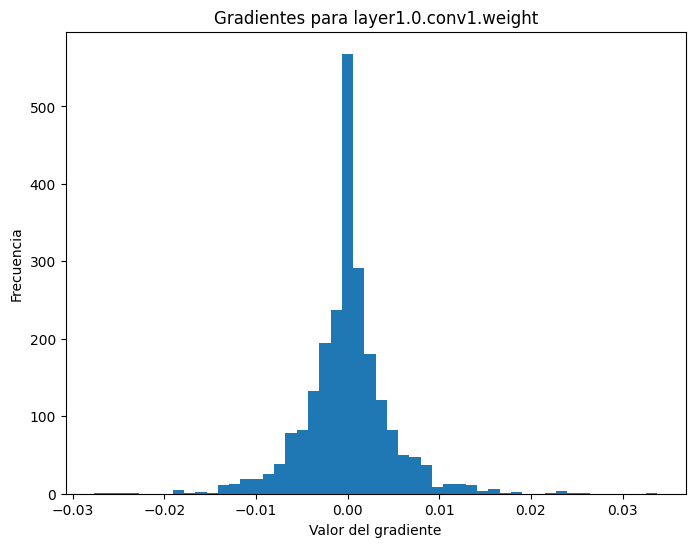

Gradientes para layer1.0.bn1.weight: min=-0.043859340250492096, max=0.025625085458159447, mean=0.0005654303822666407, std=0.016993220895528793


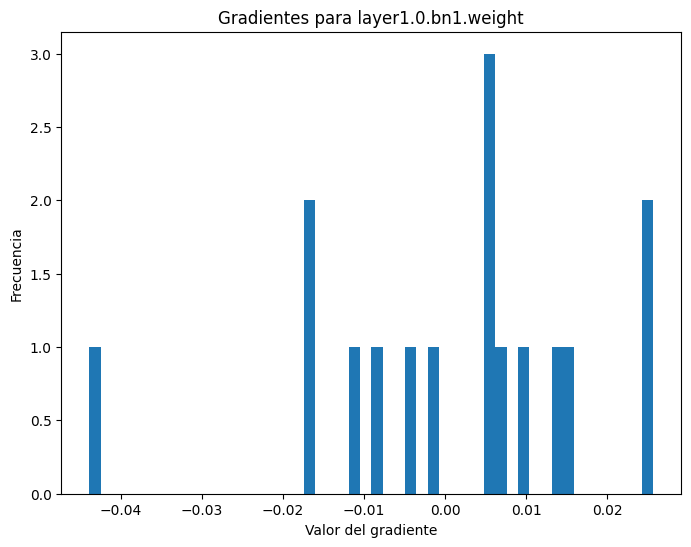

Gradientes para layer1.0.bn1.bias: min=-0.03576507419347763, max=0.027812346816062927, mean=0.0021311799064278603, std=0.015147959813475609


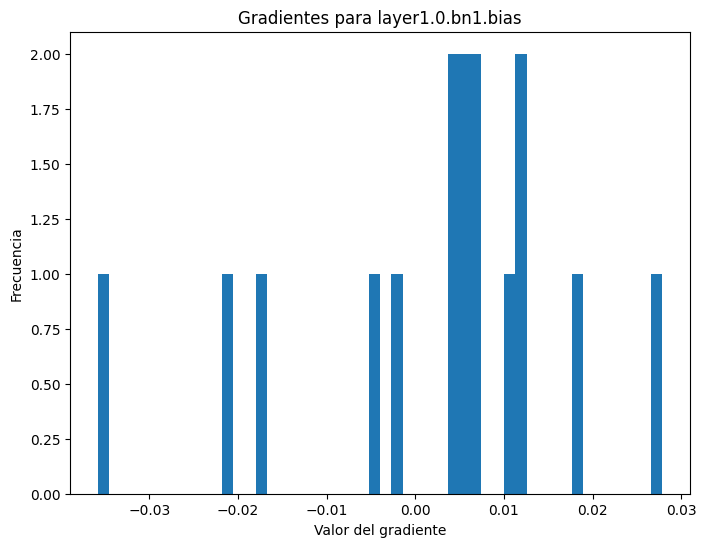

Gradientes para layer2.2.conv1.weight: min=-0.017164450138807297, max=0.013882214203476906, mean=-9.035544644575566e-05, std=0.0023211275693029165


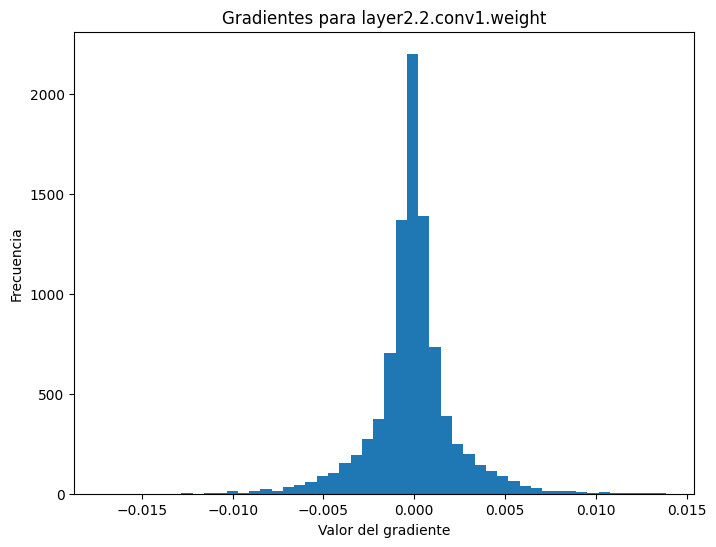

Gradientes para layer2.2.bn1.weight: min=-0.009648910723626614, max=0.014274954795837402, mean=0.00016467086970806122, std=0.006400680169463158


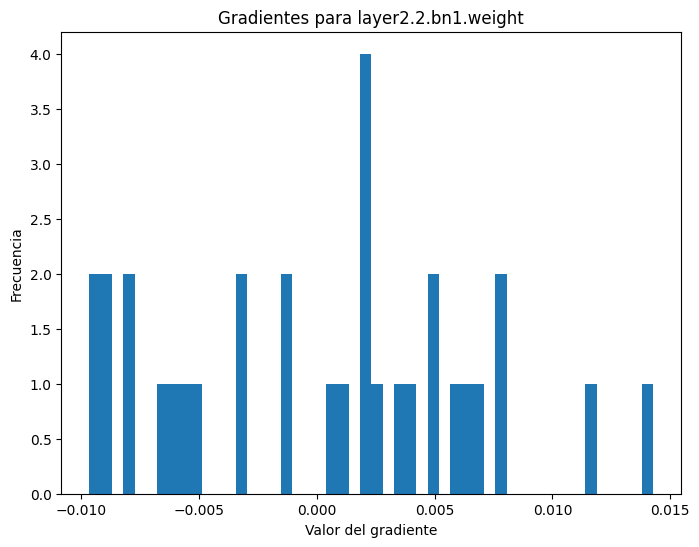

Gradientes para layer2.2.bn1.bias: min=-0.010588916949927807, max=0.007589647080749273, mean=-5.9863668866455555e-05, std=0.005608196835964918


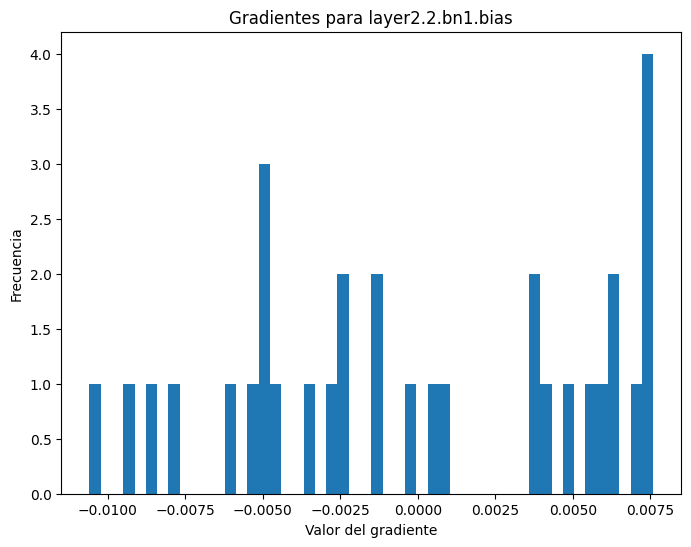

Gradientes para linear.weight: min=-0.03567155823111534, max=0.030842075124382973, mean=8.381902949494702e-10, std=0.008362611755728722


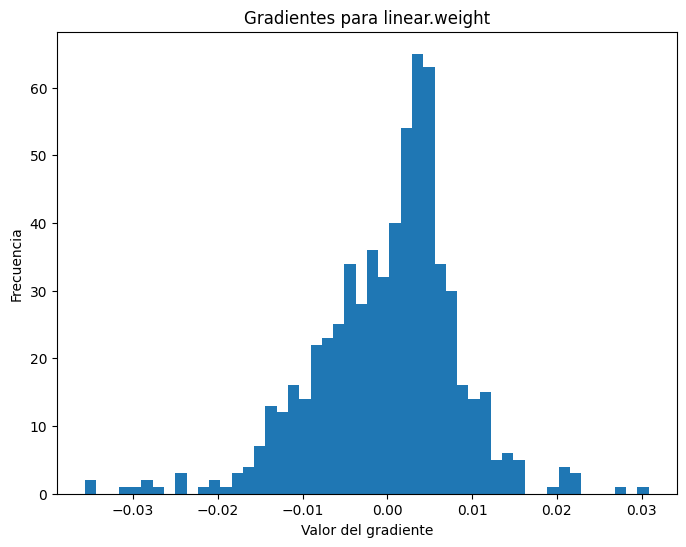

Gradientes para linear.bias: min=-0.021258212625980377, max=0.013624116778373718, mean=8.381902949494702e-10, std=0.011545782908797264


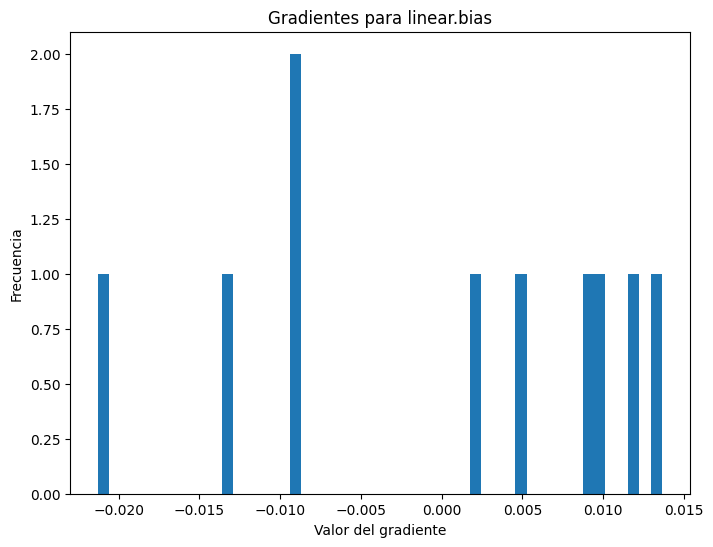

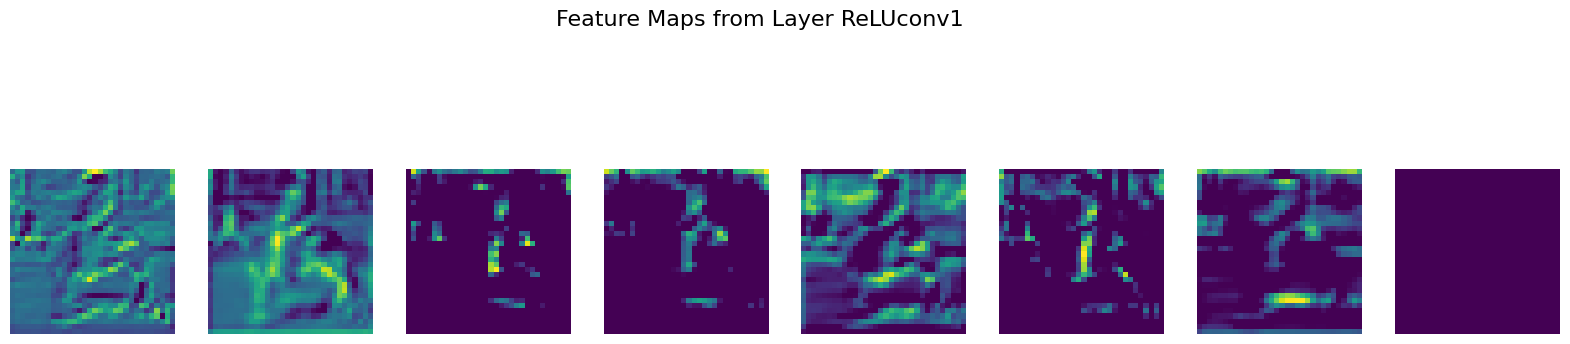

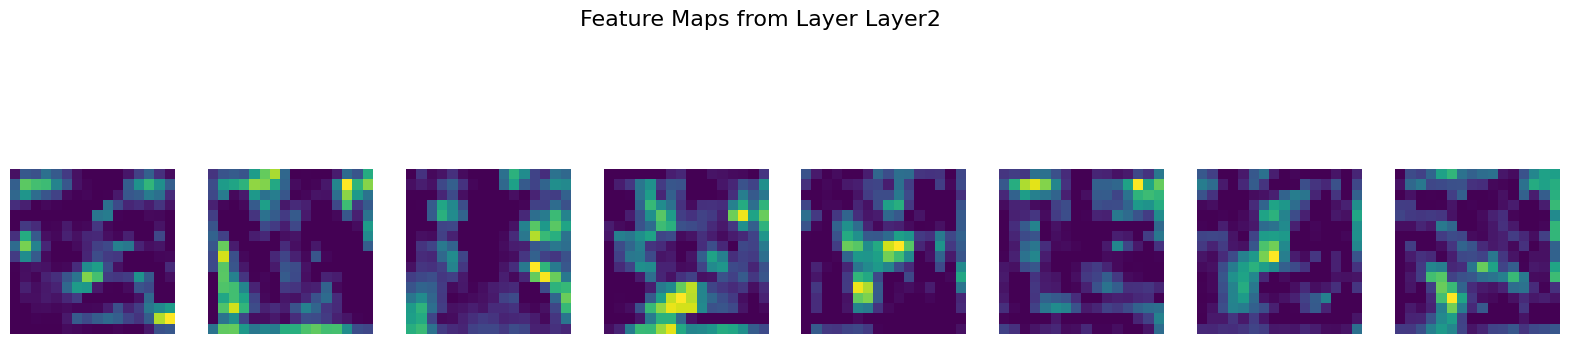

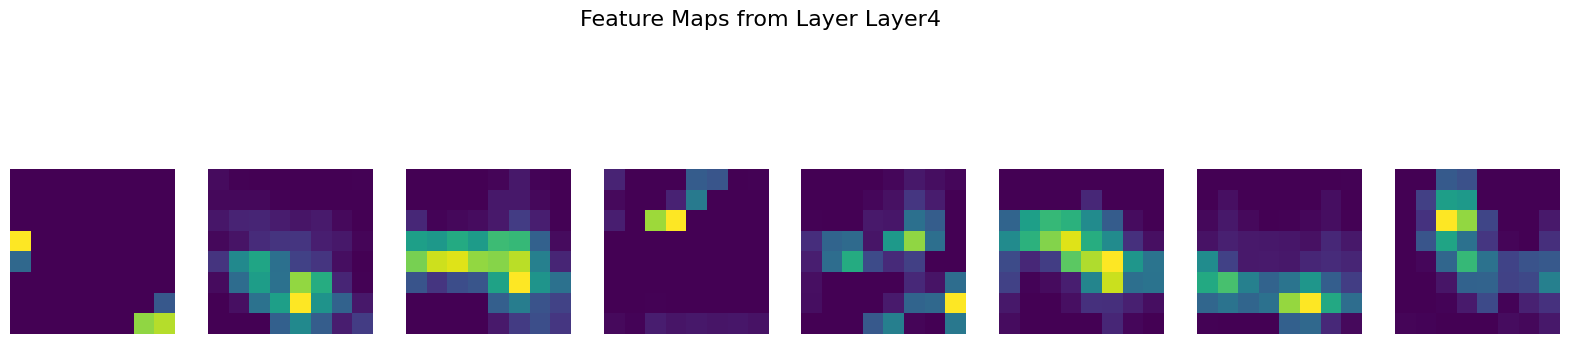

0.004
Epoch 31/70
Iteración 10595 - Lote 35/352 - Pérdida de Entrenamiento: 0.2511, Precisión de Entrenamiento: 0.9138
Iteración 10630 - Lote 70/352 - Pérdida de Entrenamiento: 0.2436, Precisión de Entrenamiento: 0.9155
Iteración 10665 - Lote 105/352 - Pérdida de Entrenamiento: 0.2412, Precisión de Entrenamiento: 0.9165
Iteración 10700 - Lote 140/352 - Pérdida de Entrenamiento: 0.2414, Precisión de Entrenamiento: 0.9171
Iteración 10735 - Lote 175/352 - Pérdida de Entrenamiento: 0.2443, Precisión de Entrenamiento: 0.9159
Iteración 10770 - Lote 210/352 - Pérdida de Entrenamiento: 0.2454, Precisión de Entrenamiento: 0.9155
Iteración 10805 - Lote 245/352 - Pérdida de Entrenamiento: 0.2442, Precisión de Entrenamiento: 0.9160
Iteración 10840 - Lote 280/352 - Pérdida de Entrenamiento: 0.2437, Precisión de Entrenamiento: 0.9160
Iteración 10875 - Lote 315/352 - Pérdida de Entrenamiento: 0.2461, Precisión de Entrenamiento: 0.9154
Iteración 10910 - Lote 350/352 - Pérdida de Entrenamiento: 0.2446,

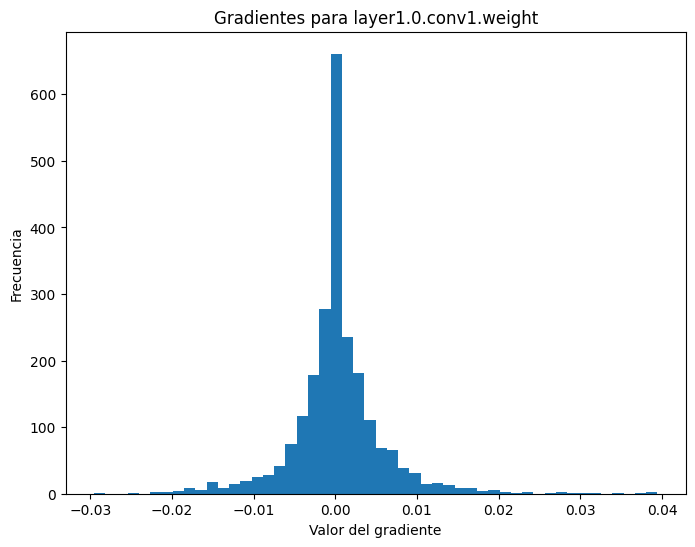

Gradientes para layer1.0.bn1.weight: min=-0.030455054715275764, max=0.02033066190779209, mean=-2.884422428905964e-06, std=0.01581318862736225


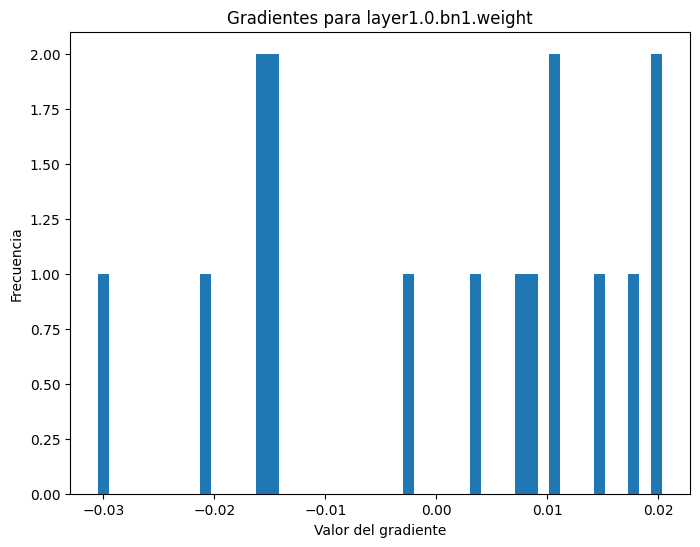

Gradientes para layer1.0.bn1.bias: min=-0.021703550592064857, max=0.01671488583087921, mean=-0.0003595540765672922, std=0.012551640160381794


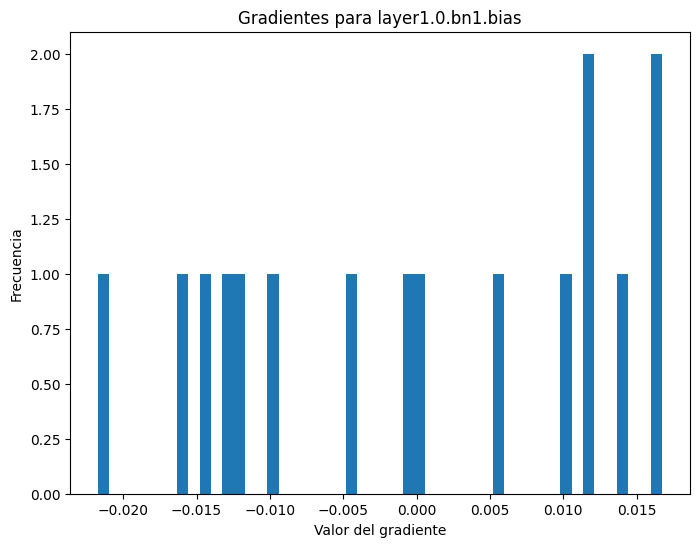

Gradientes para layer2.2.conv1.weight: min=-0.018653666600584984, max=0.019541192799806595, mean=0.0001862778444774449, std=0.002824594732373953


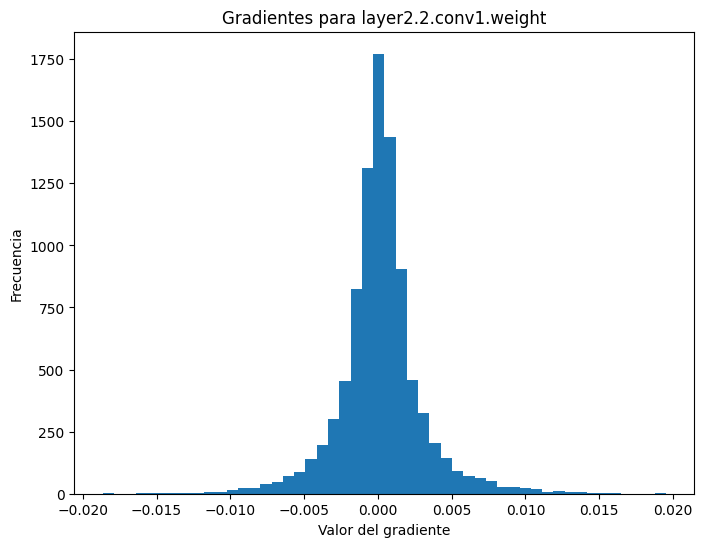

Gradientes para layer2.2.bn1.weight: min=-0.0313781201839447, max=0.020272081717848778, mean=-0.00010204751743003726, std=0.009183116257190704


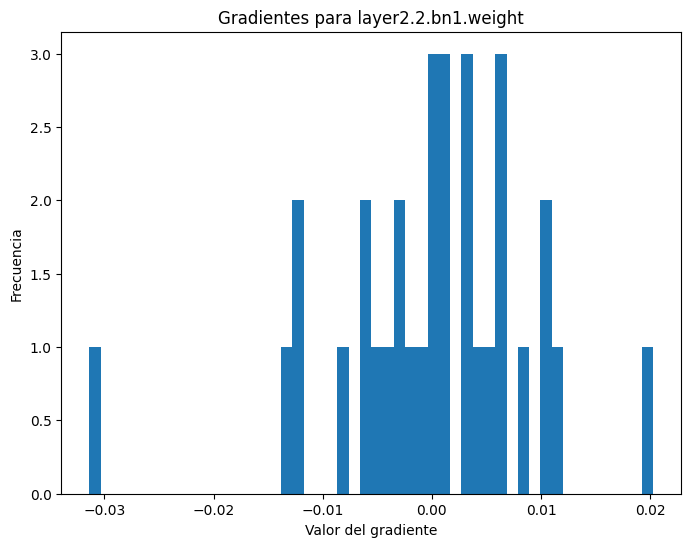

Gradientes para layer2.2.bn1.bias: min=-0.02305946871638298, max=0.011459337547421455, mean=-0.00041124652489088476, std=0.007667795289307833


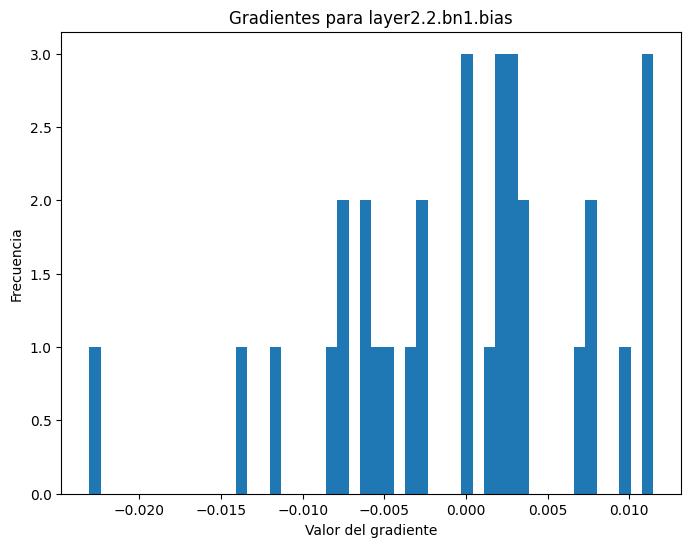

Gradientes para linear.weight: min=-0.04737231507897377, max=0.04324224591255188, mean=9.313225746154785e-10, std=0.010601592250168324


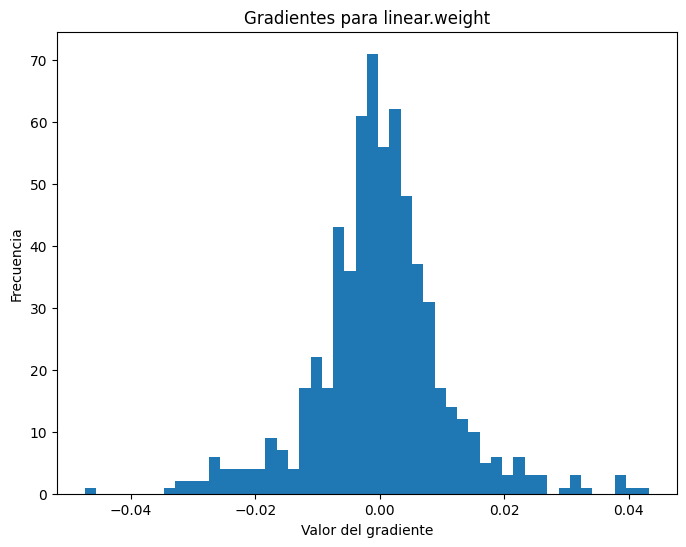

Gradientes para linear.bias: min=-0.027024324983358383, max=0.02499540150165558, mean=8.381902949494702e-10, std=0.015660006552934647


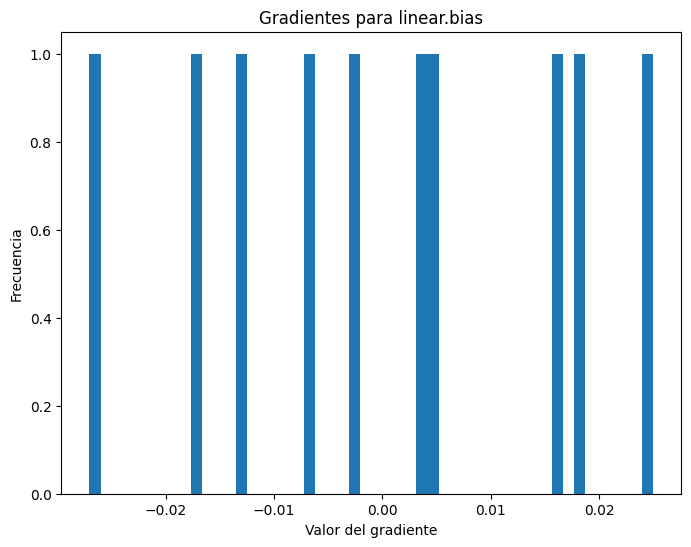

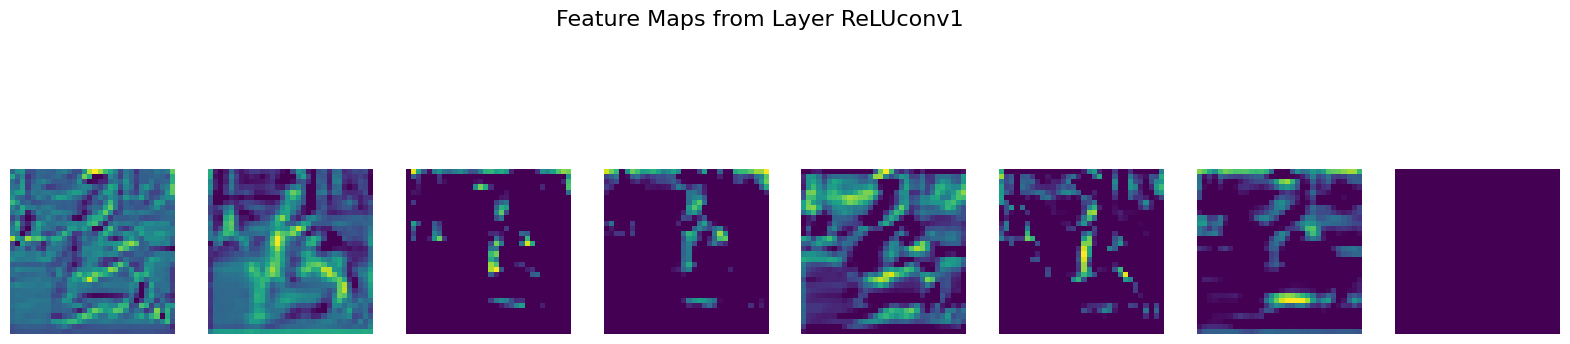

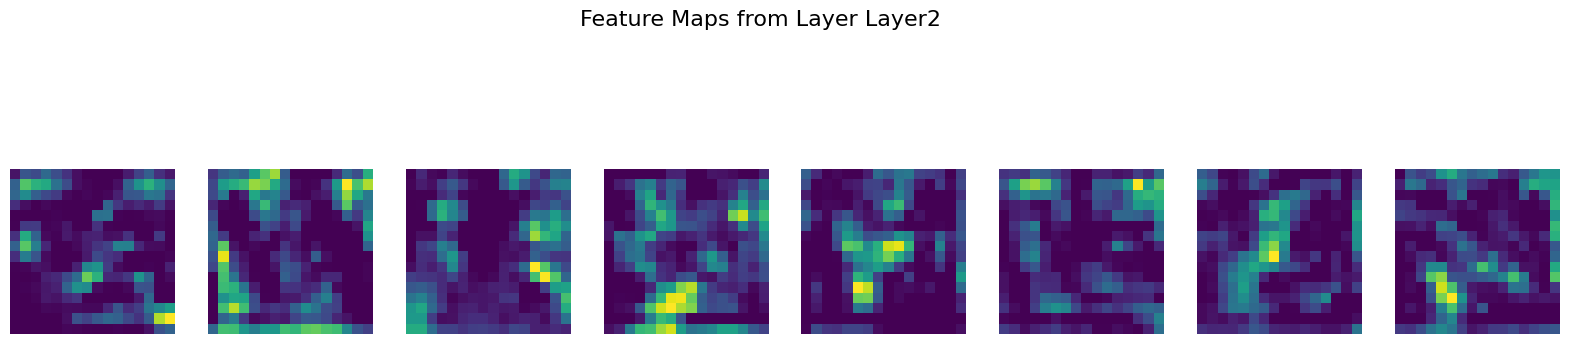

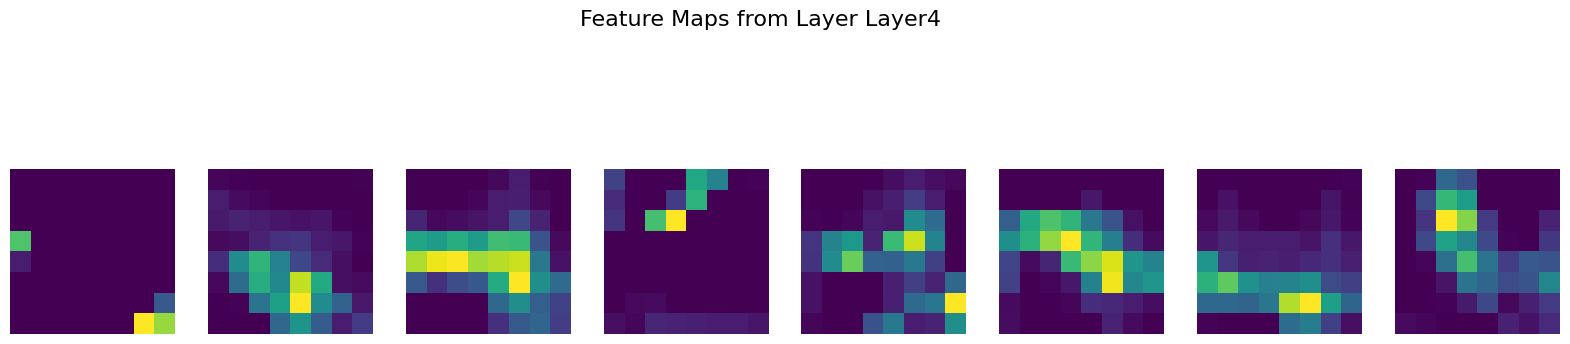

0.004
Epoch 36/70
Iteración 12355 - Lote 35/352 - Pérdida de Entrenamiento: 0.2522, Precisión de Entrenamiento: 0.9134
Iteración 12390 - Lote 70/352 - Pérdida de Entrenamiento: 0.2471, Precisión de Entrenamiento: 0.9132
Iteración 12425 - Lote 105/352 - Pérdida de Entrenamiento: 0.2387, Precisión de Entrenamiento: 0.9171
Iteración 12460 - Lote 140/352 - Pérdida de Entrenamiento: 0.2374, Precisión de Entrenamiento: 0.9173
Iteración 12495 - Lote 175/352 - Pérdida de Entrenamiento: 0.2348, Precisión de Entrenamiento: 0.9179
Iteración 12530 - Lote 210/352 - Pérdida de Entrenamiento: 0.2377, Precisión de Entrenamiento: 0.9173
Iteración 12565 - Lote 245/352 - Pérdida de Entrenamiento: 0.2372, Precisión de Entrenamiento: 0.9172
Iteración 12600 - Lote 280/352 - Pérdida de Entrenamiento: 0.2360, Precisión de Entrenamiento: 0.9176
Iteración 12635 - Lote 315/352 - Pérdida de Entrenamiento: 0.2348, Precisión de Entrenamiento: 0.9183
Iteración 12670 - Lote 350/352 - Pérdida de Entrenamiento: 0.2332,

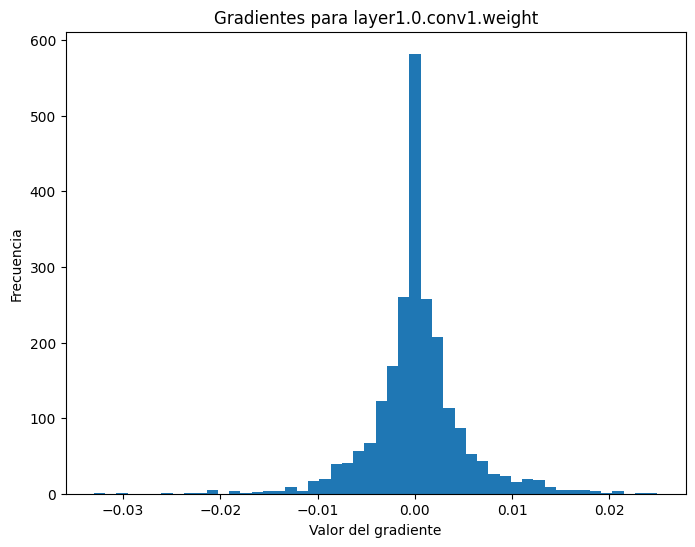

Gradientes para layer1.0.bn1.weight: min=-0.04770834371447563, max=0.02723495289683342, mean=-0.0029999183025211096, std=0.015852108597755432


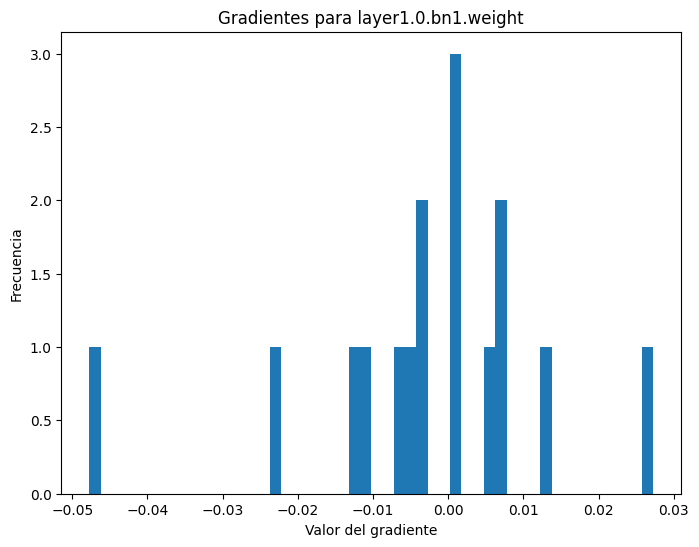

Gradientes para layer1.0.bn1.bias: min=-0.030107714235782623, max=0.03333694487810135, mean=0.0003707311116158962, std=0.014899974688887596


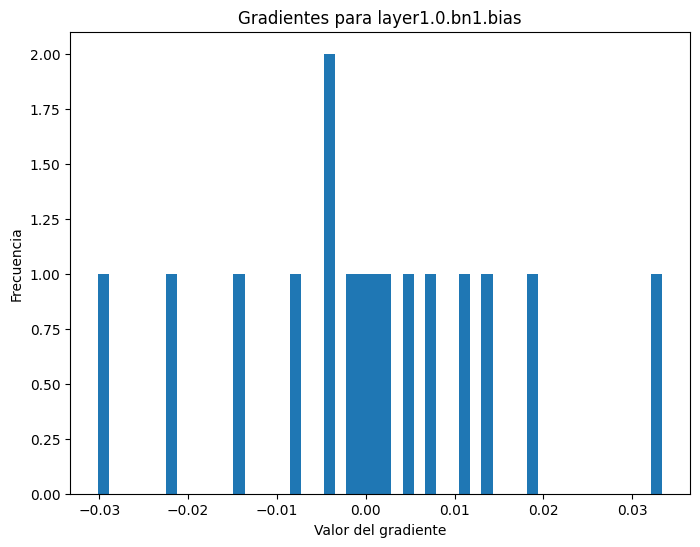

Gradientes para layer2.2.conv1.weight: min=-0.014051675796508789, max=0.016331899911165237, mean=-4.2072247197211254e-06, std=0.0021516361739486456


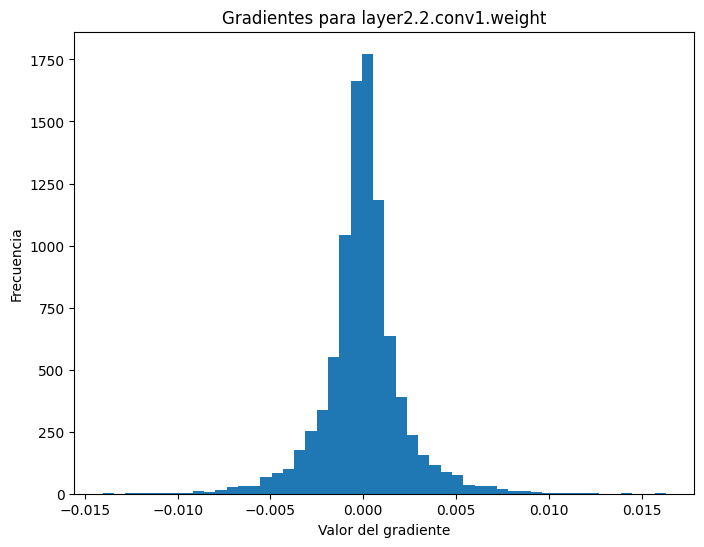

Gradientes para layer2.2.bn1.weight: min=-0.013161879032850266, max=0.016820501536130905, mean=0.00015409791376441717, std=0.0065538035705685616


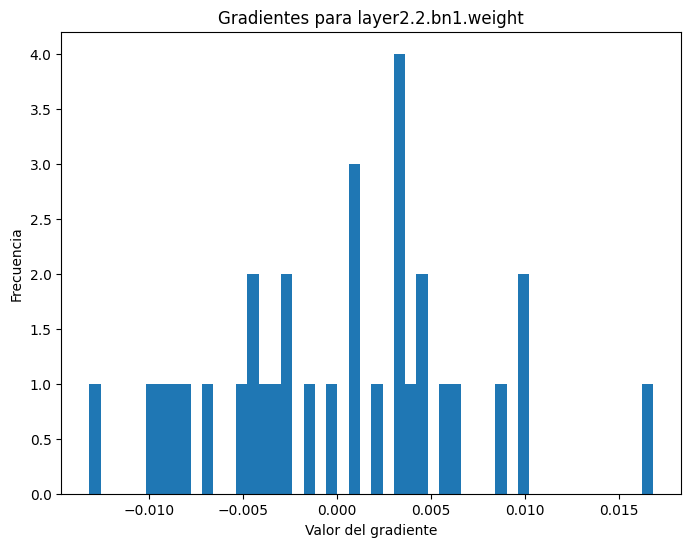

Gradientes para layer2.2.bn1.bias: min=-0.009908611886203289, max=0.010519524104893208, mean=2.0785897504538298e-05, std=0.0049389139749109745


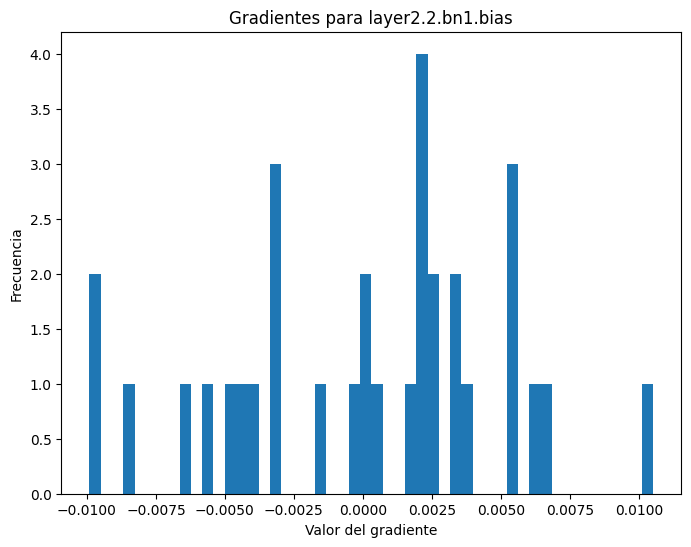

Gradientes para linear.weight: min=-0.05954600125551224, max=0.0455215685069561, mean=-2.793967834868738e-10, std=0.011989783495664597


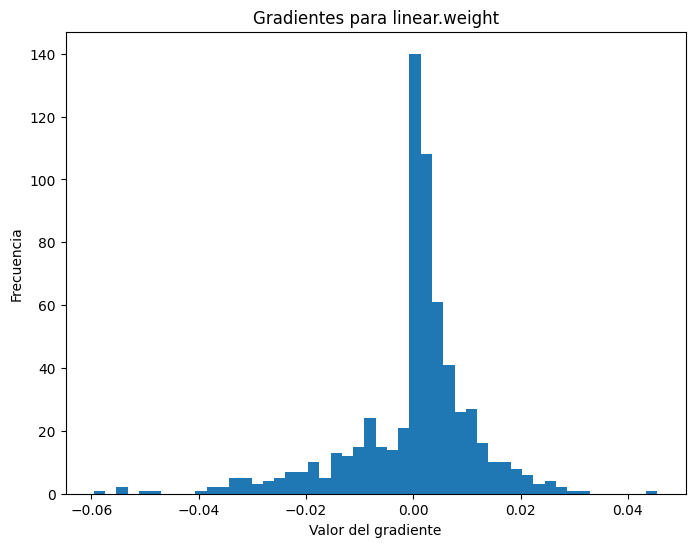

Gradientes para linear.bias: min=-0.04102770611643791, max=0.02574513480067253, mean=-2.793967834868738e-10, std=0.01800738088786602


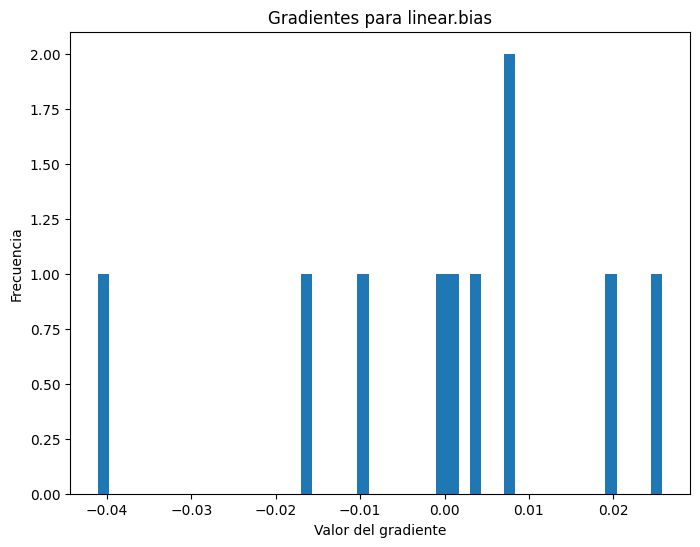

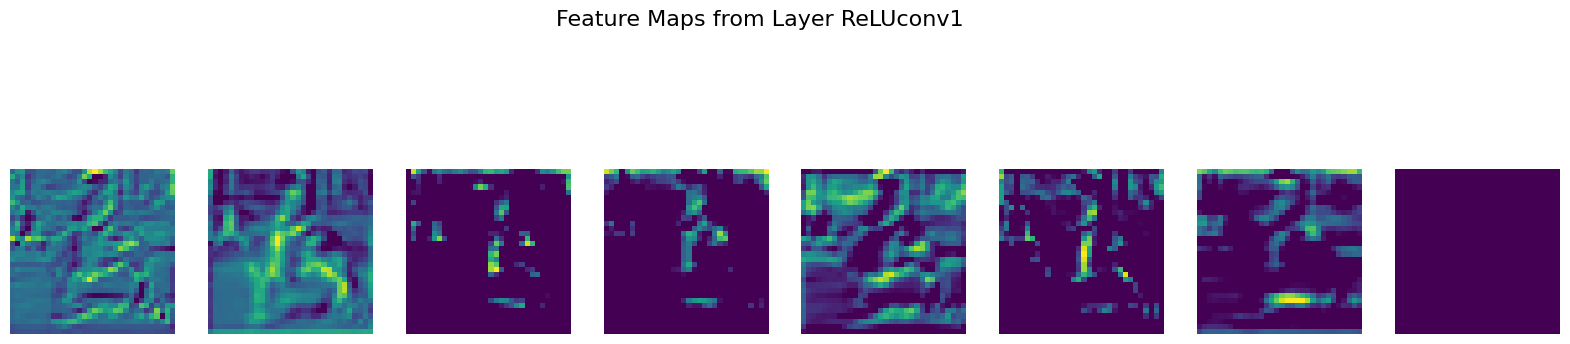

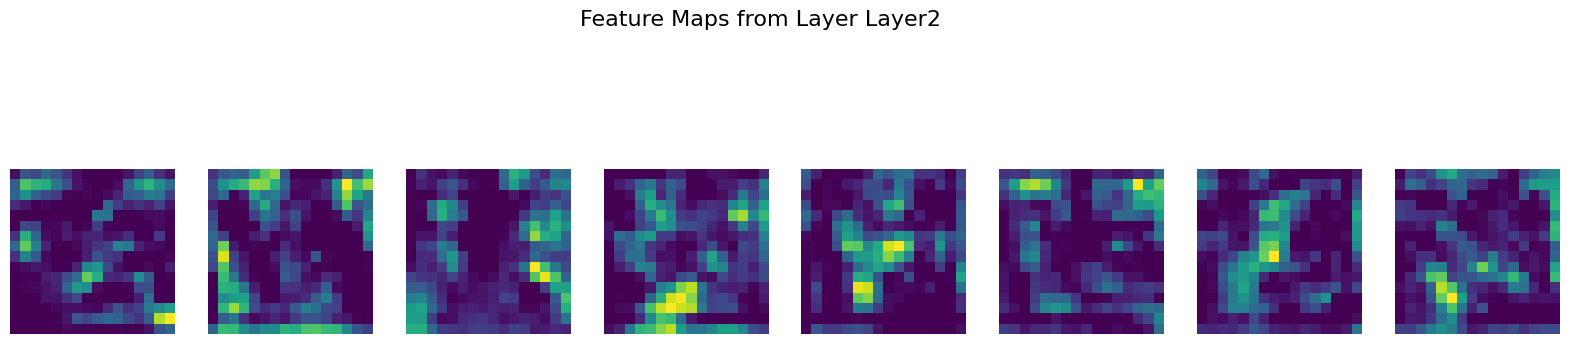

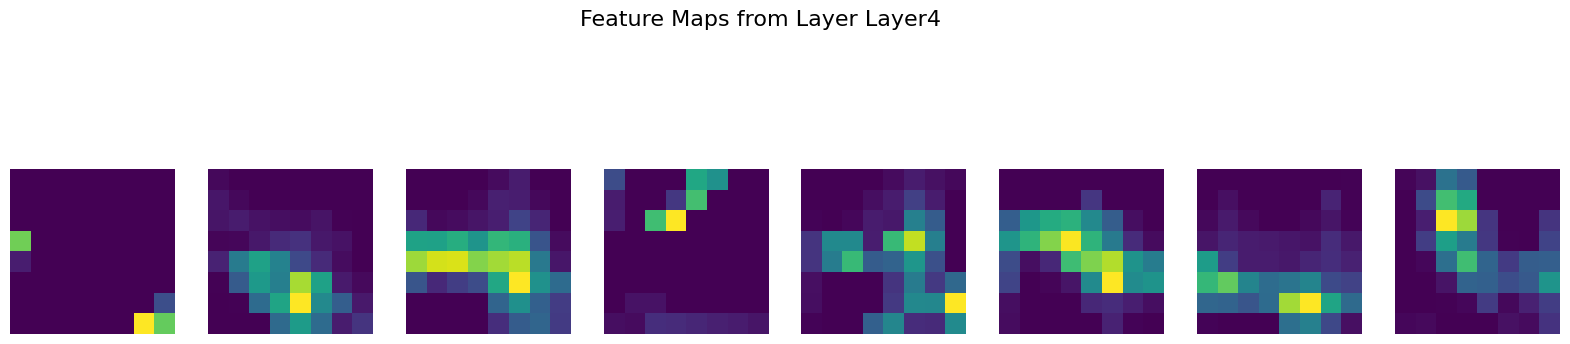

0.0004
Epoch 41/70
Iteración 14115 - Lote 35/352 - Pérdida de Entrenamiento: 0.2055, Precisión de Entrenamiento: 0.9328
Iteración 14150 - Lote 70/352 - Pérdida de Entrenamiento: 0.2083, Precisión de Entrenamiento: 0.9285
Iteración 14185 - Lote 105/352 - Pérdida de Entrenamiento: 0.2159, Precisión de Entrenamiento: 0.9257
Iteración 14220 - Lote 140/352 - Pérdida de Entrenamiento: 0.2186, Precisión de Entrenamiento: 0.9235
Iteración 14255 - Lote 175/352 - Pérdida de Entrenamiento: 0.2156, Precisión de Entrenamiento: 0.9255
Iteración 14290 - Lote 210/352 - Pérdida de Entrenamiento: 0.2140, Precisión de Entrenamiento: 0.9255
Iteración 14325 - Lote 245/352 - Pérdida de Entrenamiento: 0.2145, Precisión de Entrenamiento: 0.9254
Iteración 14360 - Lote 280/352 - Pérdida de Entrenamiento: 0.2167, Precisión de Entrenamiento: 0.9244
Iteración 14395 - Lote 315/352 - Pérdida de Entrenamiento: 0.2175, Precisión de Entrenamiento: 0.9239
Iteración 14430 - Lote 350/352 - Pérdida de Entrenamiento: 0.2191

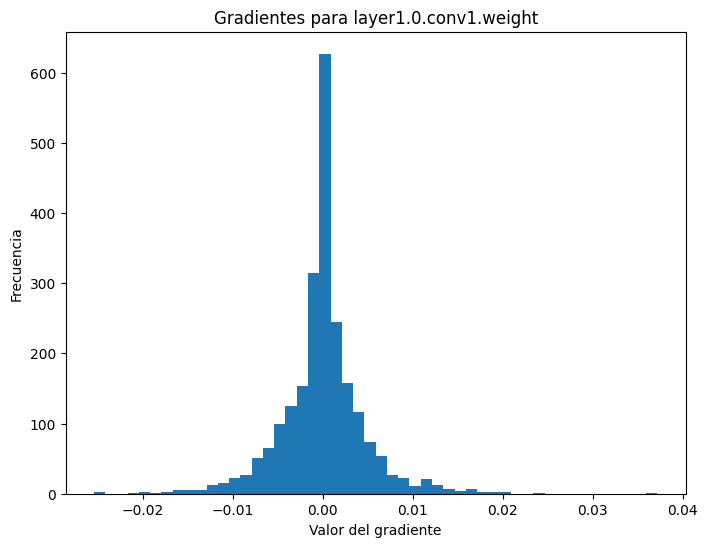

Gradientes para layer1.0.bn1.weight: min=-0.03347553312778473, max=0.027397876605391502, mean=-0.0009249760769307613, std=0.017101479694247246


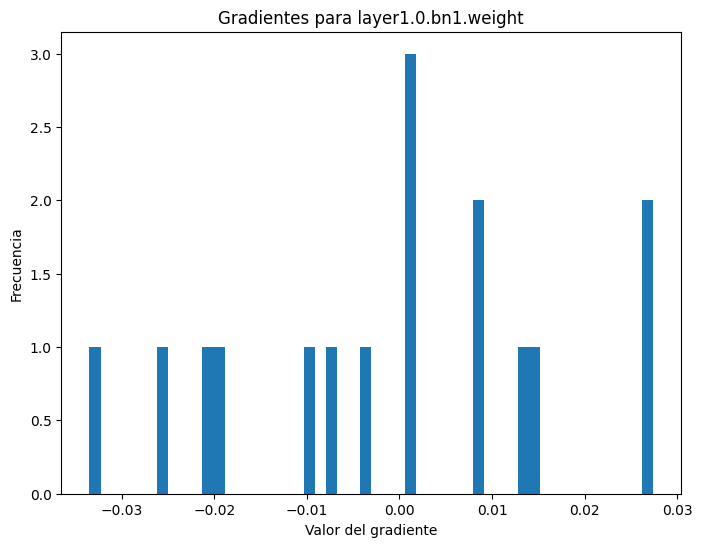

Gradientes para layer1.0.bn1.bias: min=-0.019017837941646576, max=0.01489301398396492, mean=-0.0006258412613533437, std=0.009058896452188492


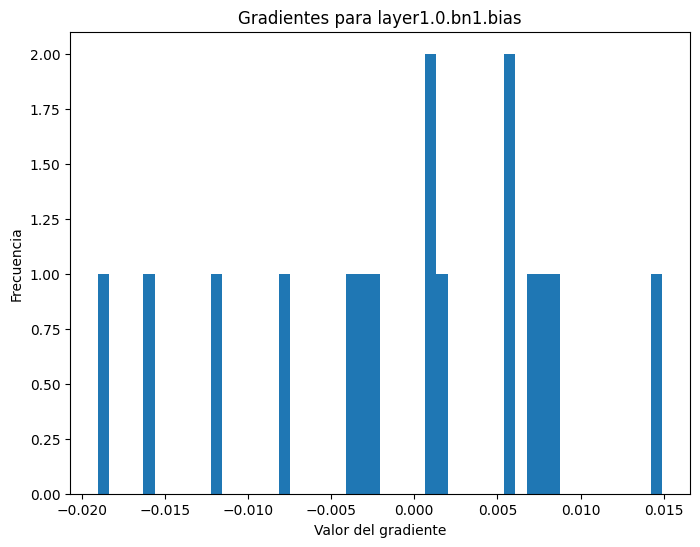

Gradientes para layer2.2.conv1.weight: min=-0.01165048312395811, max=0.012023300863802433, mean=4.1856386815197766e-05, std=0.0017800077330321074


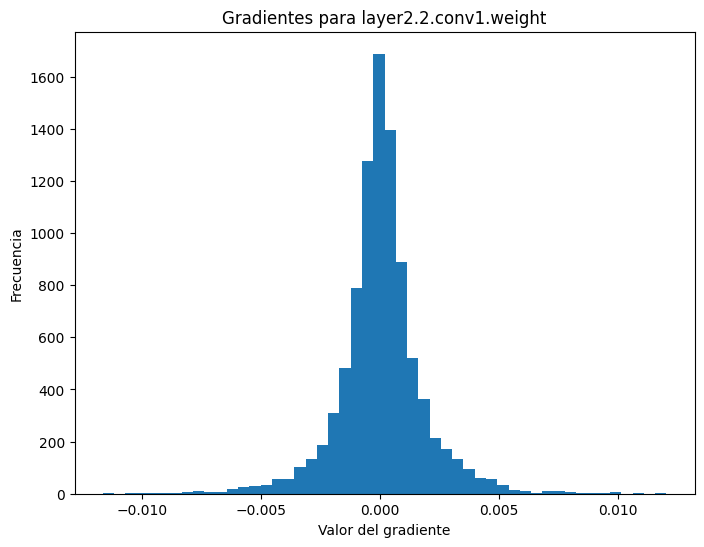

Gradientes para layer2.2.bn1.weight: min=-0.013557905331254005, max=0.008731341920793056, mean=5.44433860341087e-05, std=0.005015909671783447


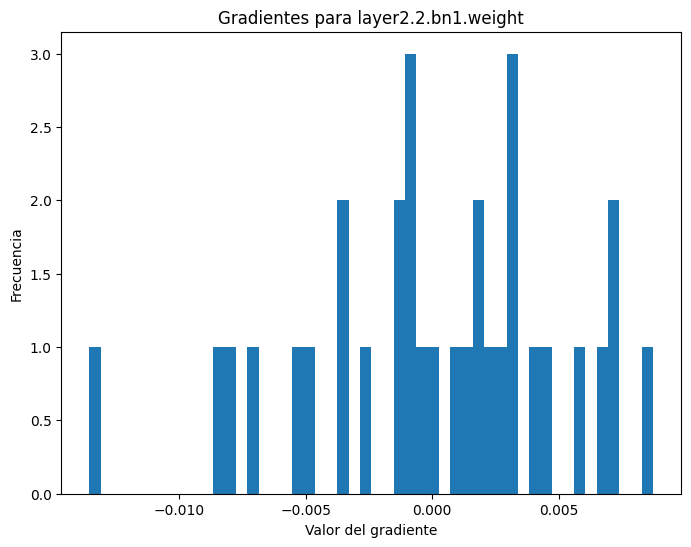

Gradientes para layer2.2.bn1.bias: min=-0.011386865749955177, max=0.007806006819009781, mean=0.0005432195612229407, std=0.004865281283855438


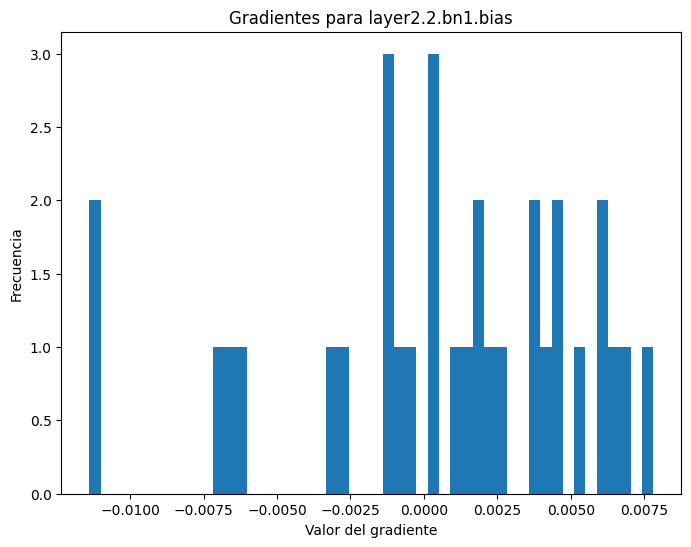

Gradientes para linear.weight: min=-0.03677760064601898, max=0.04077611491084099, mean=1.7695128695649487e-09, std=0.009166201576590538


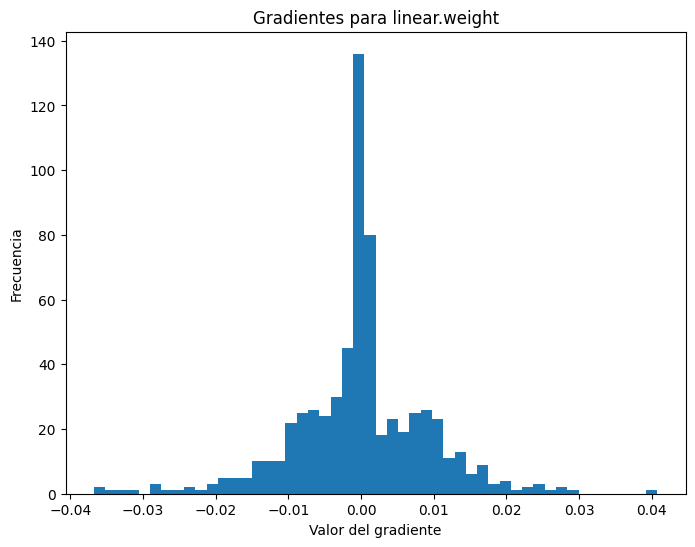

Gradientes para linear.bias: min=-0.022720567882061005, max=0.019701555371284485, mean=1.5832484212552345e-09, std=0.01243734173476696


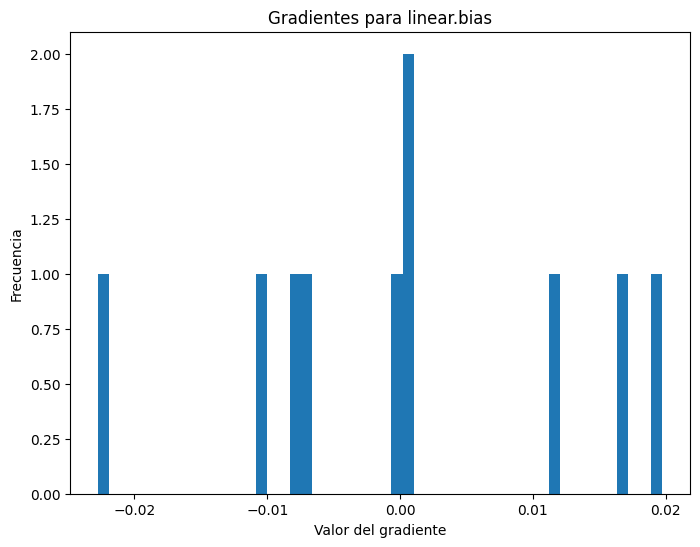

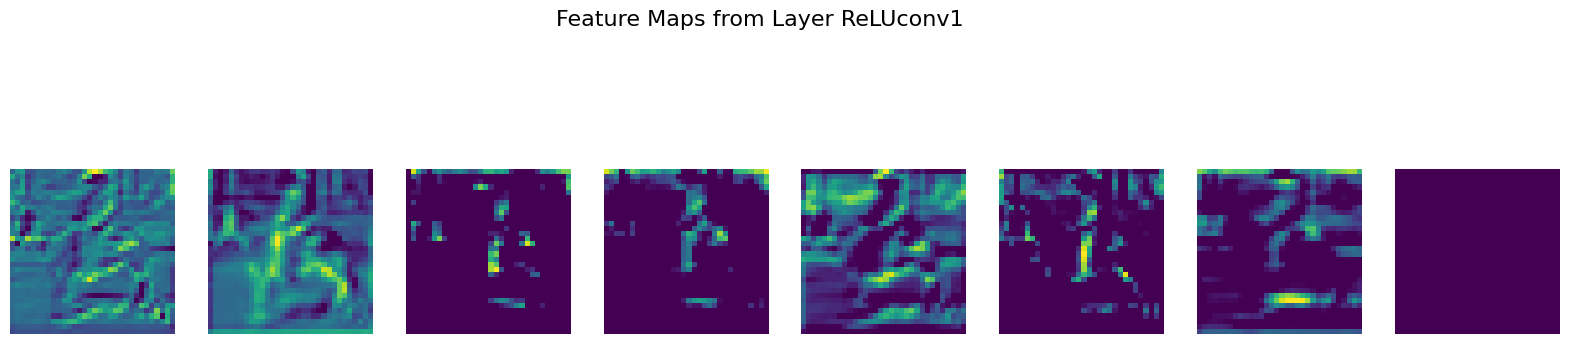

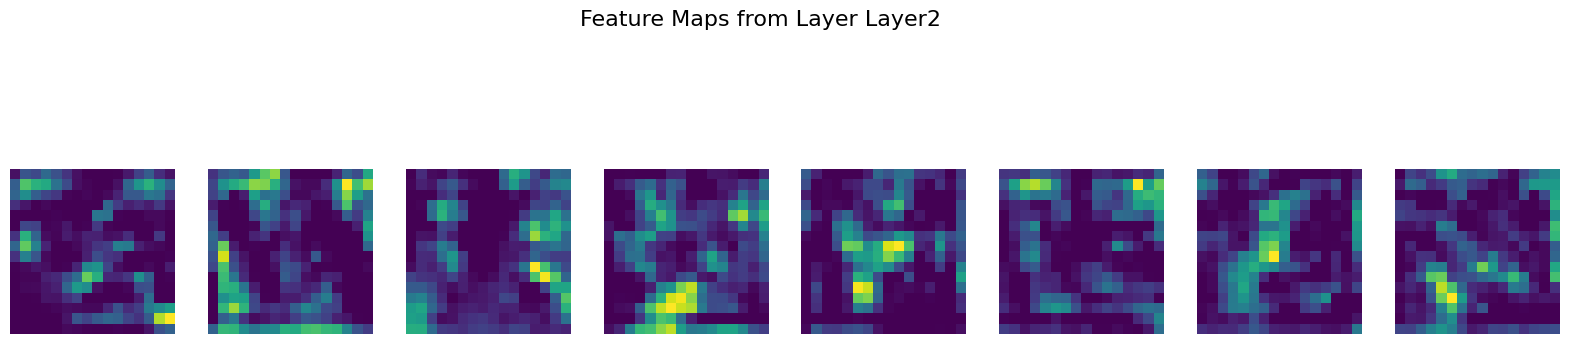

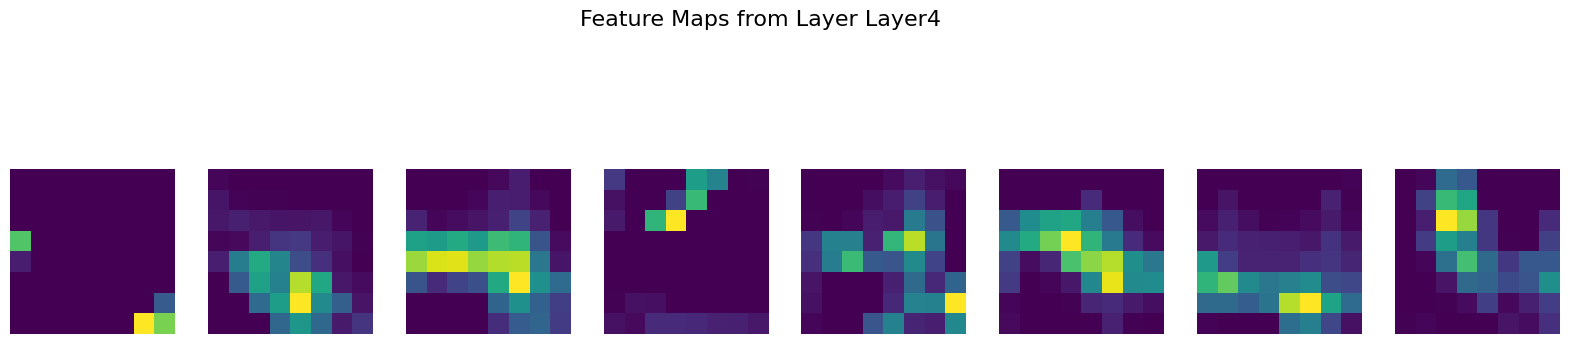

4e-05
Epoch 46/70
Iteración 15875 - Lote 35/352 - Pérdida de Entrenamiento: 0.2310, Precisión de Entrenamiento: 0.9192
Iteración 15910 - Lote 70/352 - Pérdida de Entrenamiento: 0.2266, Precisión de Entrenamiento: 0.9249
Iteración 15945 - Lote 105/352 - Pérdida de Entrenamiento: 0.2175, Precisión de Entrenamiento: 0.9273
Iteración 15980 - Lote 140/352 - Pérdida de Entrenamiento: 0.2158, Precisión de Entrenamiento: 0.9280
Iteración 16015 - Lote 175/352 - Pérdida de Entrenamiento: 0.2139, Precisión de Entrenamiento: 0.9283
Iteración 16050 - Lote 210/352 - Pérdida de Entrenamiento: 0.2136, Precisión de Entrenamiento: 0.9278
Iteración 16085 - Lote 245/352 - Pérdida de Entrenamiento: 0.2143, Precisión de Entrenamiento: 0.9270
Iteración 16120 - Lote 280/352 - Pérdida de Entrenamiento: 0.2131, Precisión de Entrenamiento: 0.9270
Iteración 16155 - Lote 315/352 - Pérdida de Entrenamiento: 0.2126, Precisión de Entrenamiento: 0.9269
Iteración 16190 - Lote 350/352 - Pérdida de Entrenamiento: 0.2127,

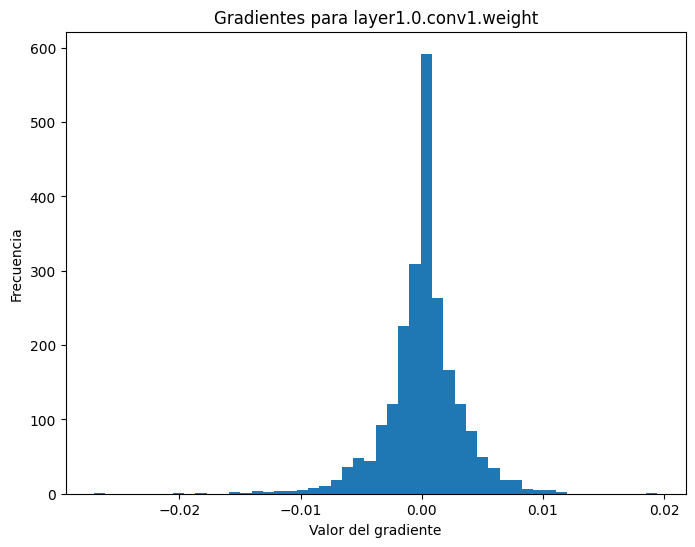

Gradientes para layer1.0.bn1.weight: min=-0.017988301813602448, max=0.014660542830824852, mean=0.0006241631926968694, std=0.01086979266256094


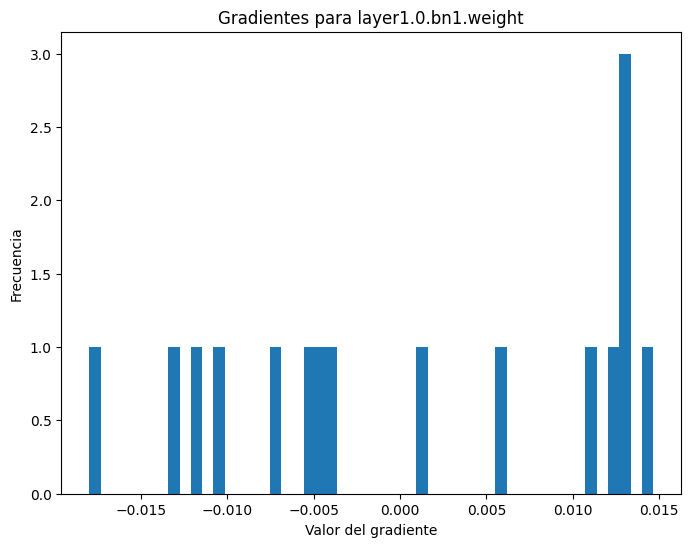

Gradientes para layer1.0.bn1.bias: min=-0.026898067444562912, max=0.014989055693149567, mean=-0.0035005093086510897, std=0.012819777242839336


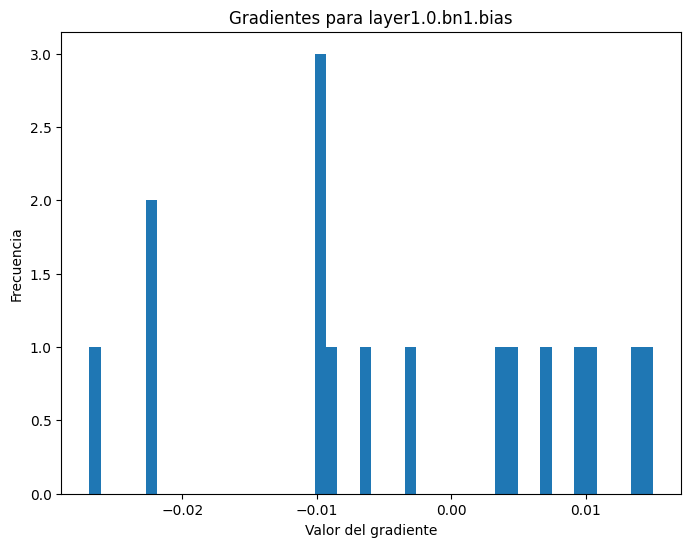

Gradientes para layer2.2.conv1.weight: min=-0.012014631181955338, max=0.010538721457123756, mean=4.4749169319402426e-05, std=0.0018321789102628827


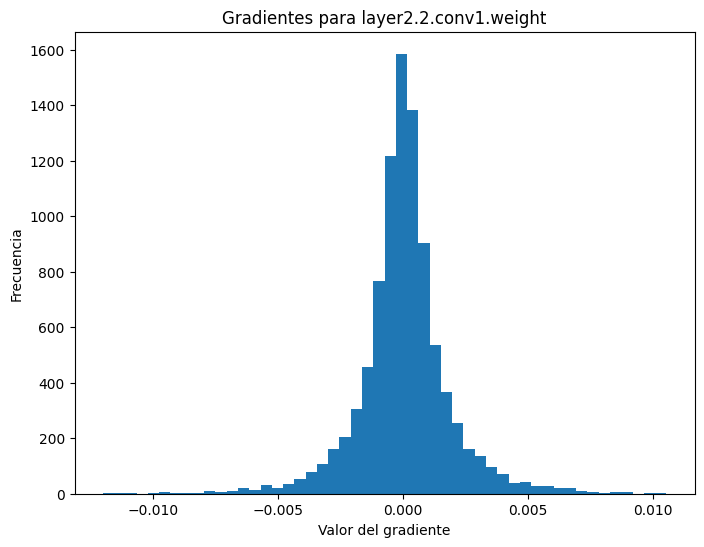

Gradientes para layer2.2.bn1.weight: min=-0.007417517248541117, max=0.011462229304015636, mean=2.2727908799424767e-06, std=0.005236451514065266


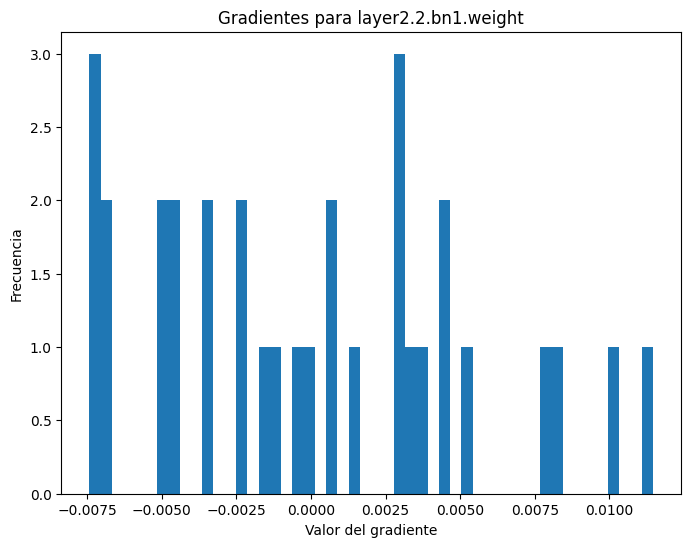

Gradientes para layer2.2.bn1.bias: min=-0.006624714005738497, max=0.007717944215983152, mean=-0.0002926374727394432, std=0.003929404076188803


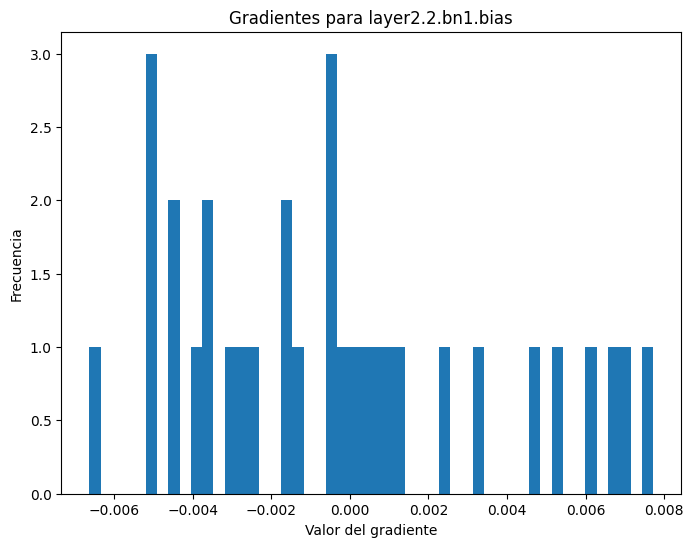

Gradientes para linear.weight: min=-0.051873646676540375, max=0.03446970880031586, mean=4.190951474747351e-10, std=0.009978467598557472


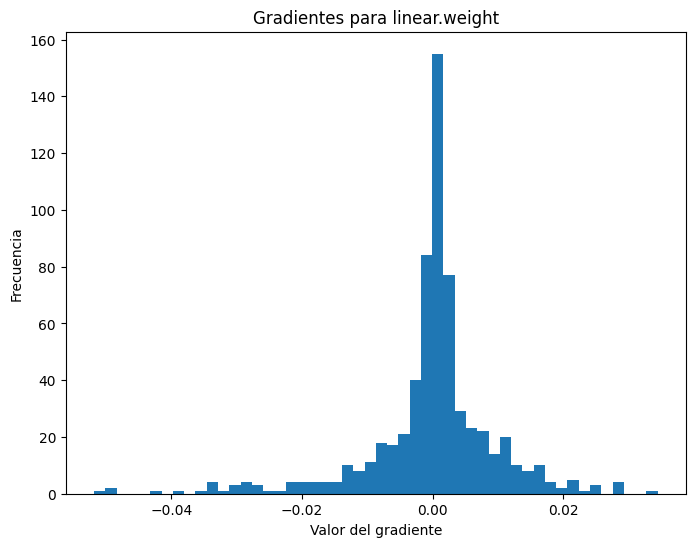

Gradientes para linear.bias: min=-0.032098133116960526, max=0.02166738174855709, mean=1.1175871339474952e-09, std=0.01425961498171091


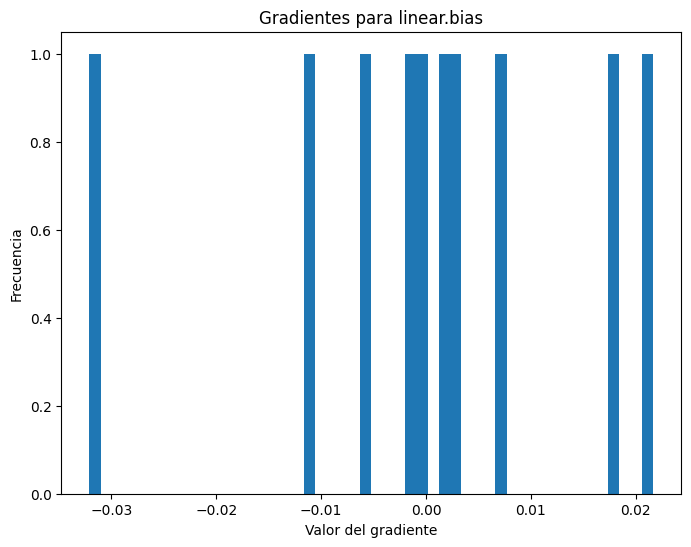

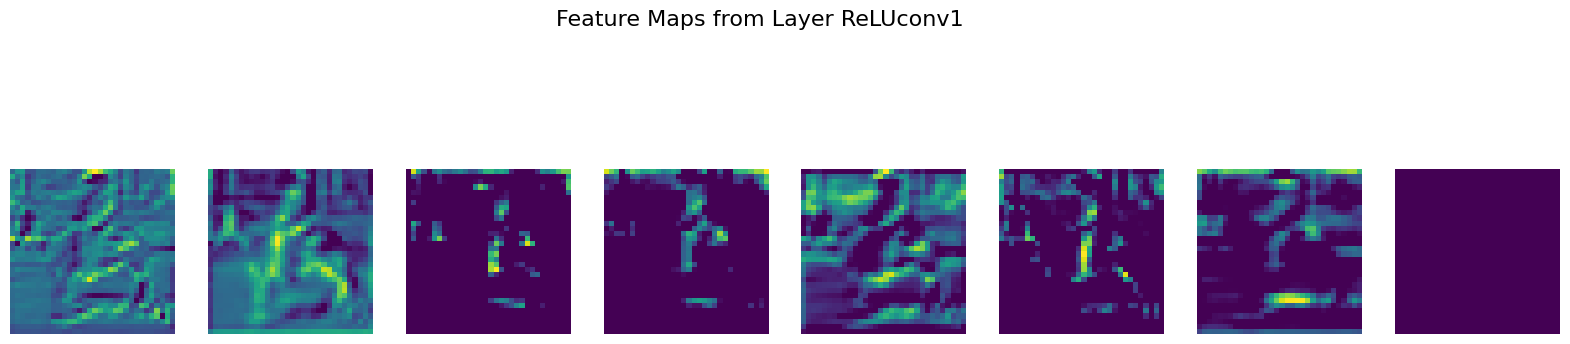

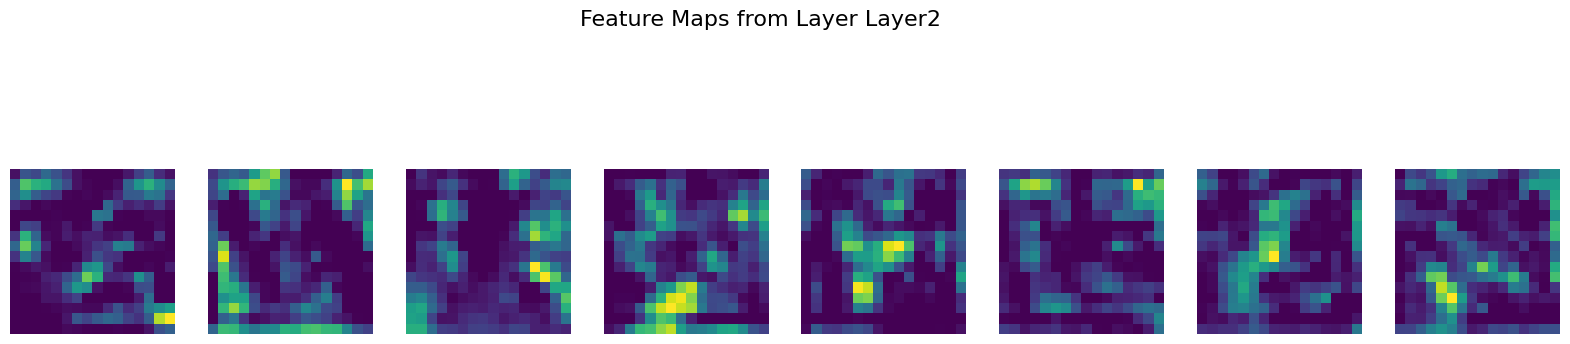

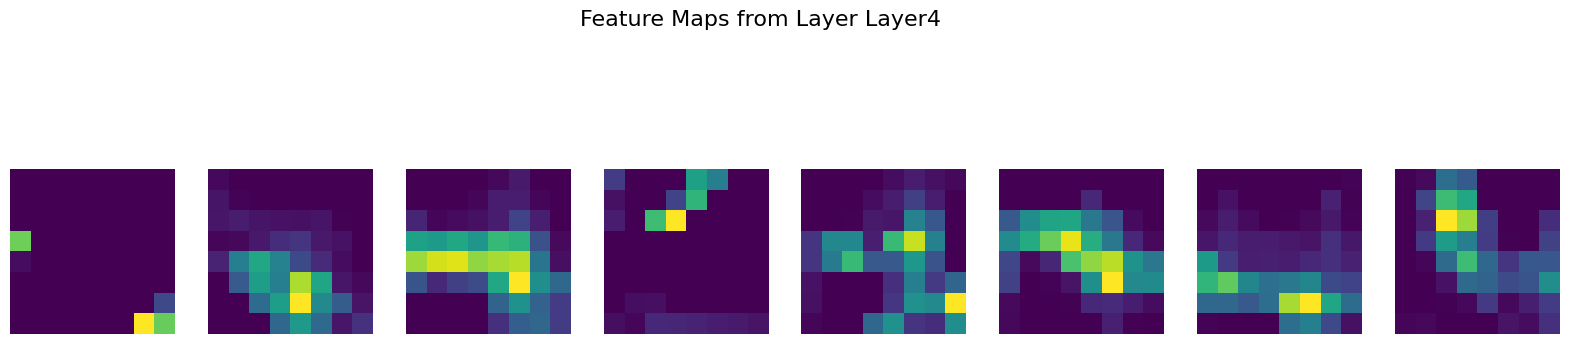

4e-05
Epoch 51/70
Iteración 17635 - Lote 35/352 - Pérdida de Entrenamiento: 0.2129, Precisión de Entrenamiento: 0.9223
Iteración 17670 - Lote 70/352 - Pérdida de Entrenamiento: 0.2194, Precisión de Entrenamiento: 0.9205
Iteración 17705 - Lote 105/352 - Pérdida de Entrenamiento: 0.2171, Precisión de Entrenamiento: 0.9227
Iteración 17740 - Lote 140/352 - Pérdida de Entrenamiento: 0.2161, Precisión de Entrenamiento: 0.9230
Iteración 17775 - Lote 175/352 - Pérdida de Entrenamiento: 0.2141, Precisión de Entrenamiento: 0.9245
Iteración 17810 - Lote 210/352 - Pérdida de Entrenamiento: 0.2132, Precisión de Entrenamiento: 0.9254
Iteración 17845 - Lote 245/352 - Pérdida de Entrenamiento: 0.2139, Precisión de Entrenamiento: 0.9261
Iteración 17880 - Lote 280/352 - Pérdida de Entrenamiento: 0.2160, Precisión de Entrenamiento: 0.9253
Iteración 17915 - Lote 315/352 - Pérdida de Entrenamiento: 0.2156, Precisión de Entrenamiento: 0.9254
Iteración 17950 - Lote 350/352 - Pérdida de Entrenamiento: 0.2154,

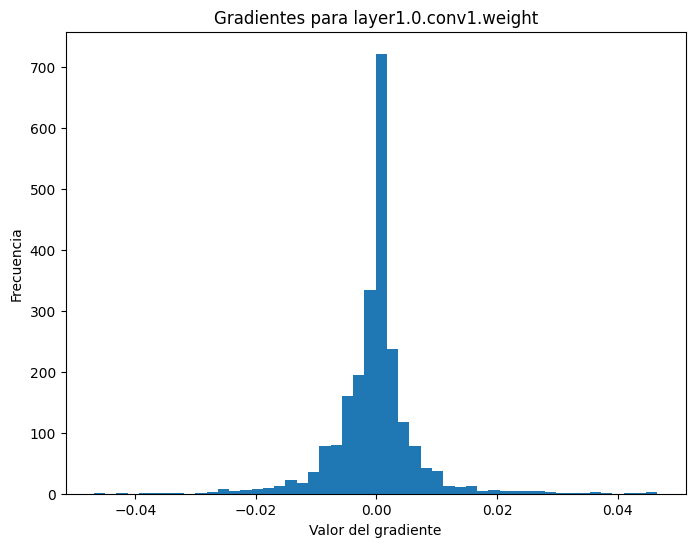

Gradientes para layer1.0.bn1.weight: min=-0.114932119846344, max=0.06703271716833115, mean=-0.0033912863582372665, std=0.03966226801276207


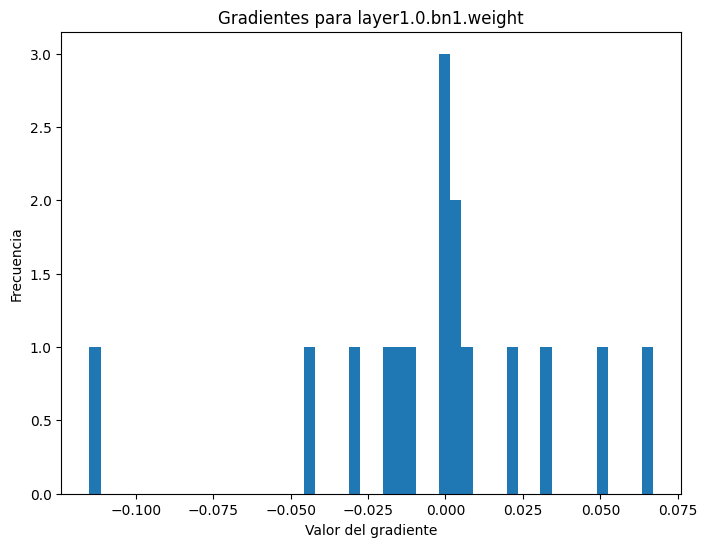

Gradientes para layer1.0.bn1.bias: min=-0.09524846822023392, max=0.03163972124457359, mean=-0.0022637813817709684, std=0.030636800453066826


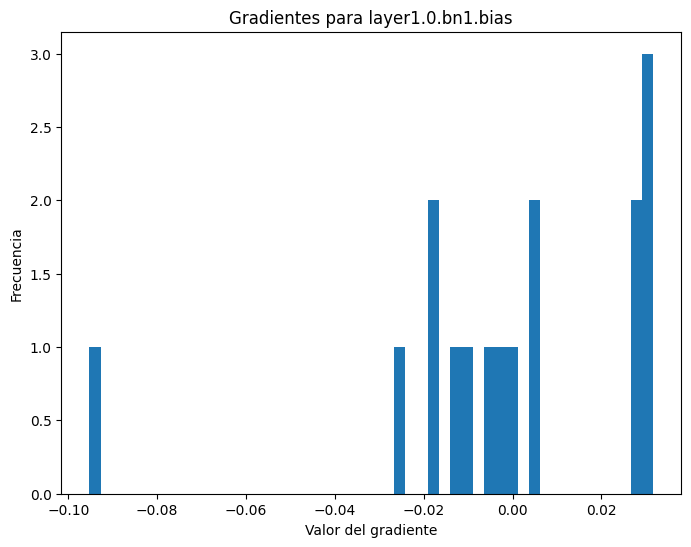

Gradientes para layer2.2.conv1.weight: min=-0.019422145560383797, max=0.018367640674114227, mean=1.2105834912290447e-06, std=0.0022770226933062077


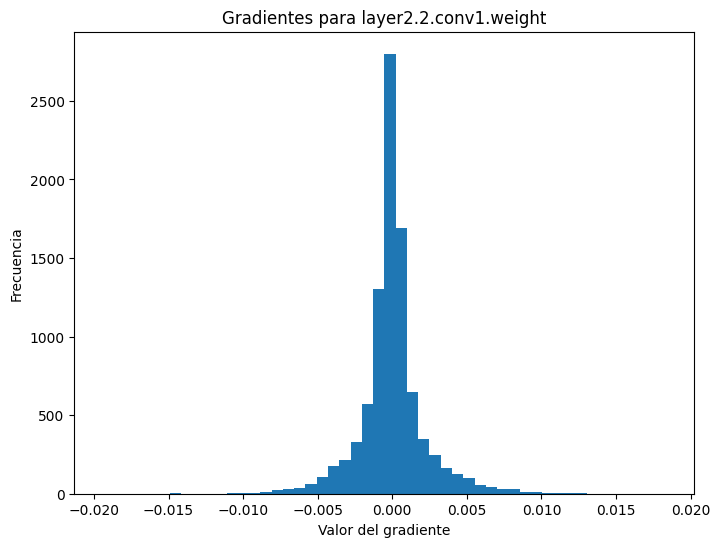

Gradientes para layer2.2.bn1.weight: min=-0.01115903165191412, max=0.013412720523774624, mean=0.00022330990759655833, std=0.006474550347775221


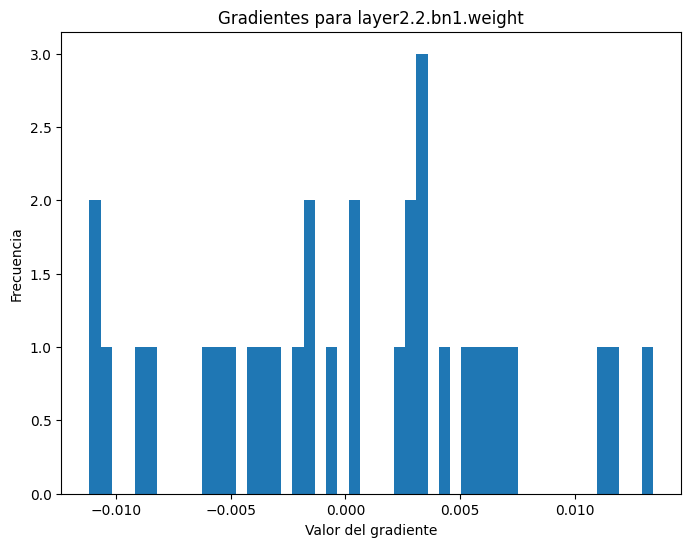

Gradientes para layer2.2.bn1.bias: min=-0.01289412472397089, max=0.019864171743392944, mean=0.0003971713886130601, std=0.007541464641690254


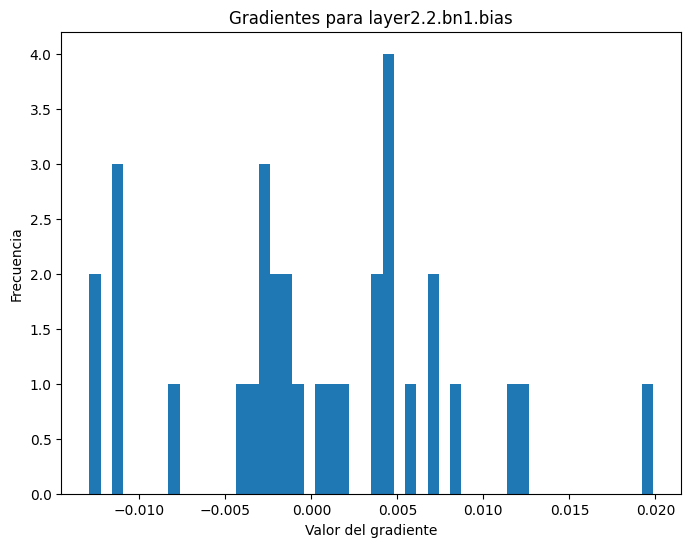

Gradientes para linear.weight: min=-0.07699627429246902, max=0.057759400457143784, mean=0.0, std=0.013577589765191078


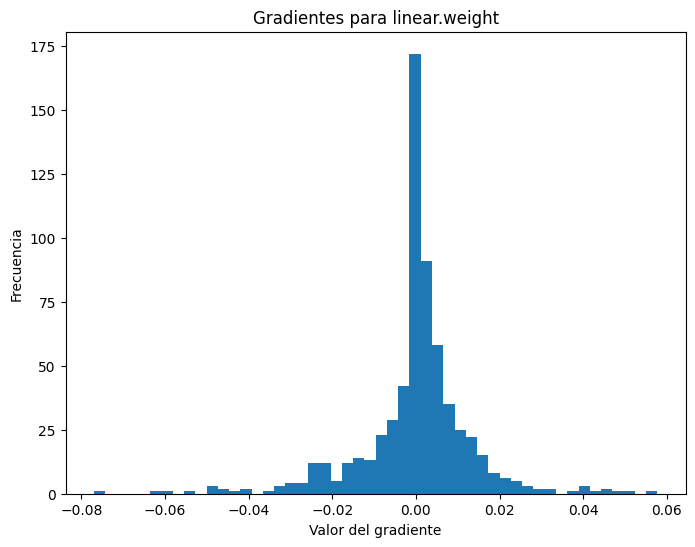

Gradientes para linear.bias: min=-0.03803303837776184, max=0.03167305141687393, mean=5.587935669737476e-10, std=0.01849963888525963


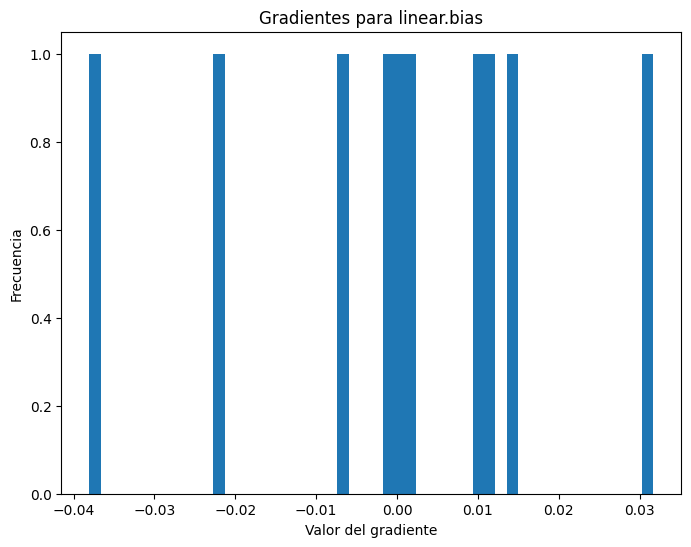

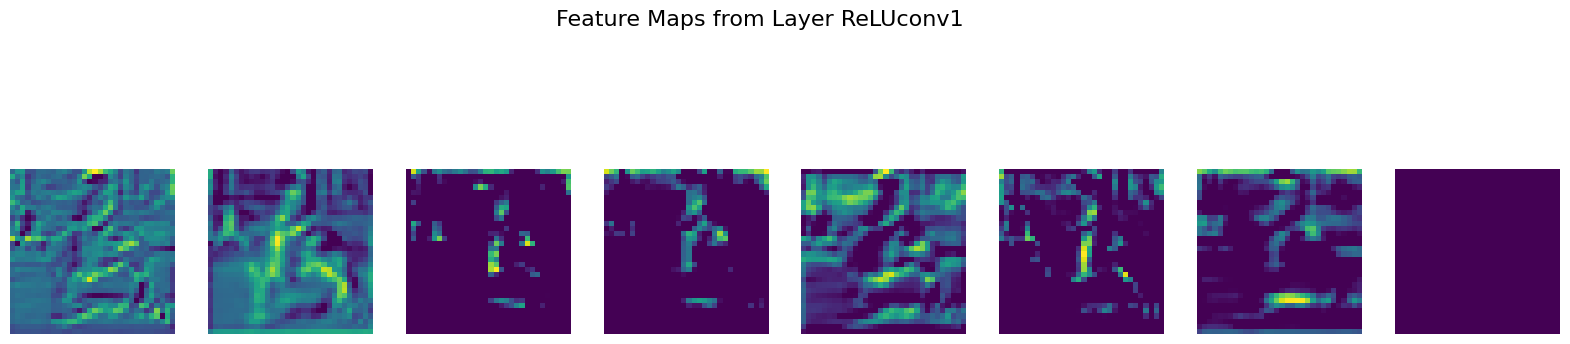

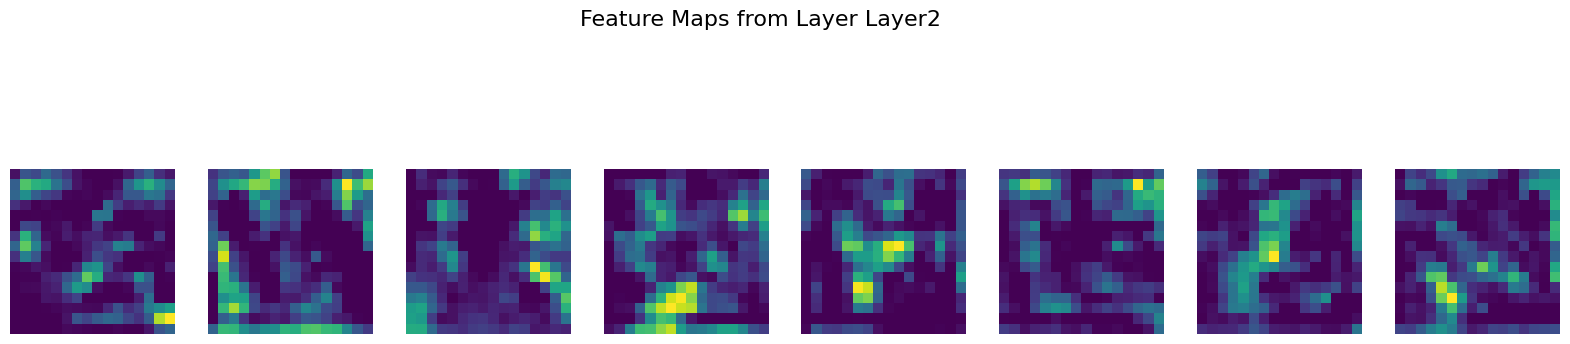

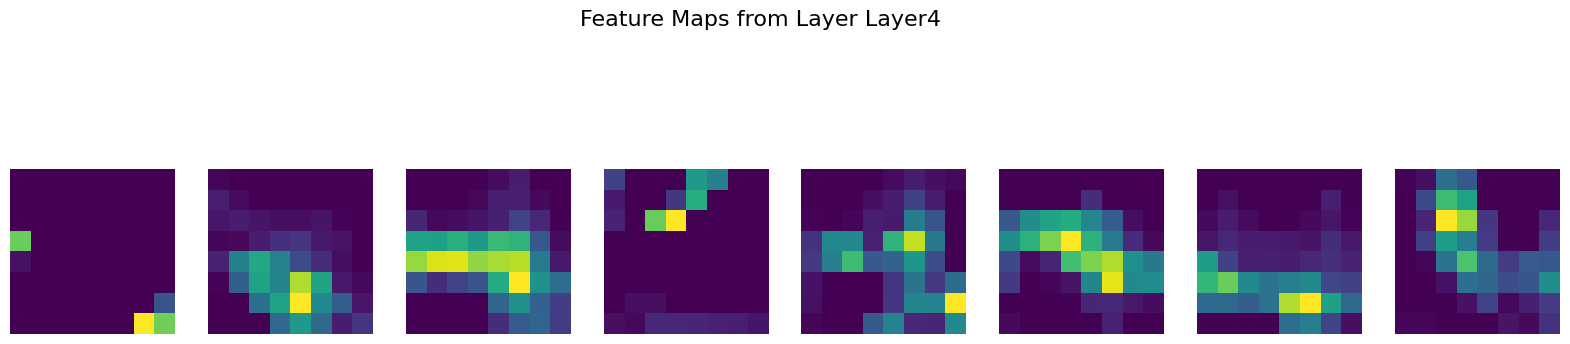

4.000000000000001e-06
Epoch 56/70
Iteración 19395 - Lote 35/352 - Pérdida de Entrenamiento: 0.2062, Precisión de Entrenamiento: 0.9243
Iteración 19430 - Lote 70/352 - Pérdida de Entrenamiento: 0.2074, Precisión de Entrenamiento: 0.9272
Iteración 19465 - Lote 105/352 - Pérdida de Entrenamiento: 0.2078, Precisión de Entrenamiento: 0.9275
Iteración 19500 - Lote 140/352 - Pérdida de Entrenamiento: 0.2077, Precisión de Entrenamiento: 0.9290
Iteración 19535 - Lote 175/352 - Pérdida de Entrenamiento: 0.2082, Precisión de Entrenamiento: 0.9289
Iteración 19570 - Lote 210/352 - Pérdida de Entrenamiento: 0.2088, Precisión de Entrenamiento: 0.9292
Iteración 19605 - Lote 245/352 - Pérdida de Entrenamiento: 0.2112, Precisión de Entrenamiento: 0.9280
Iteración 19640 - Lote 280/352 - Pérdida de Entrenamiento: 0.2102, Precisión de Entrenamiento: 0.9279
Iteración 19675 - Lote 315/352 - Pérdida de Entrenamiento: 0.2102, Precisión de Entrenamiento: 0.9280
Iteración 19710 - Lote 350/352 - Pérdida de Entren

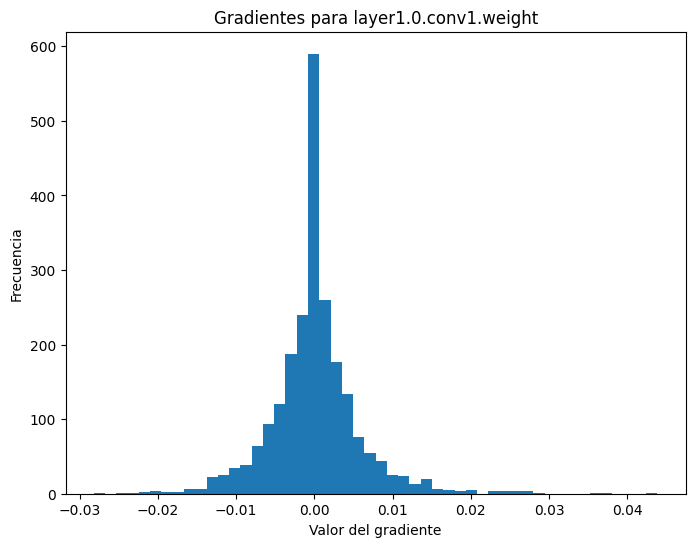

Gradientes para layer1.0.bn1.weight: min=-0.04611417278647423, max=0.042846713215112686, mean=0.0005232500843703747, std=0.023924358189105988


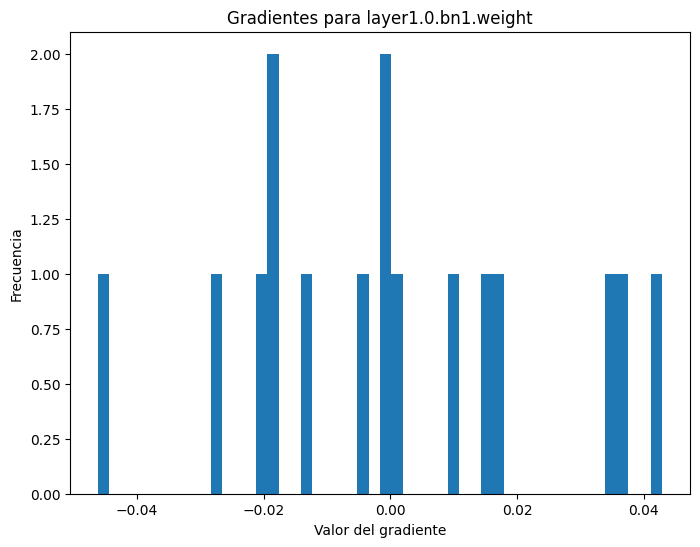

Gradientes para layer1.0.bn1.bias: min=-0.0503075048327446, max=0.029970770701766014, mean=-0.004112808033823967, std=0.019239405170083046


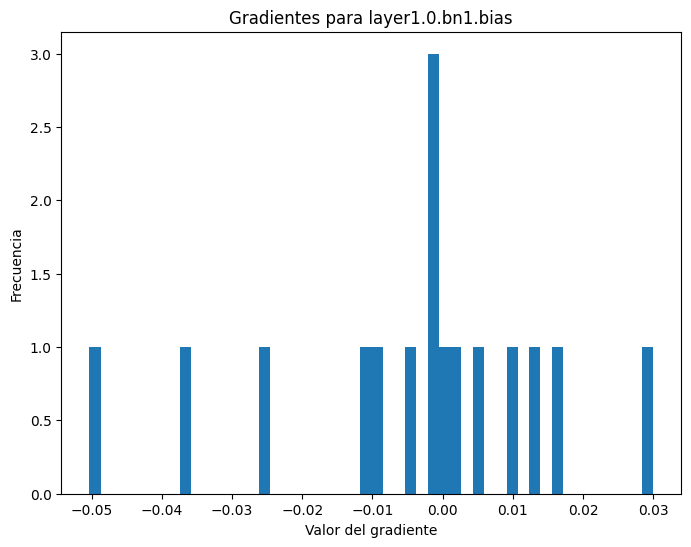

Gradientes para layer2.2.conv1.weight: min=-0.021370233967900276, max=0.015283175744116306, mean=-3.570413537090644e-05, std=0.0027850037440657616


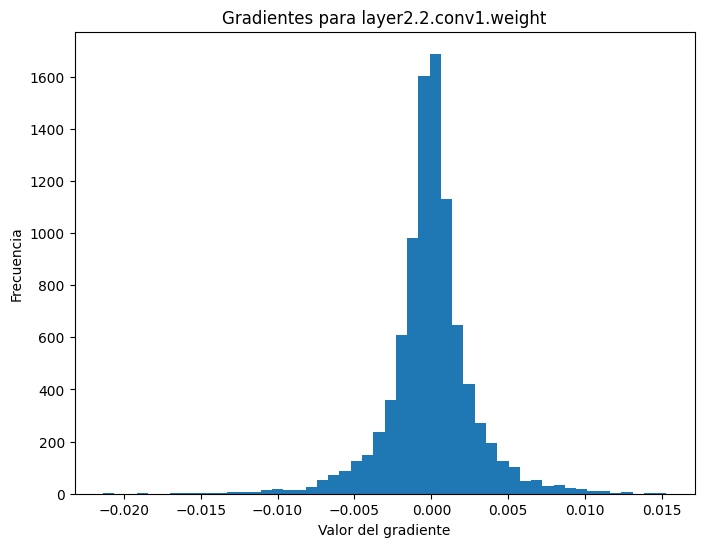

Gradientes para layer2.2.bn1.weight: min=-0.020848102867603302, max=0.018445948138833046, mean=-0.000246542738750577, std=0.008556820452213287


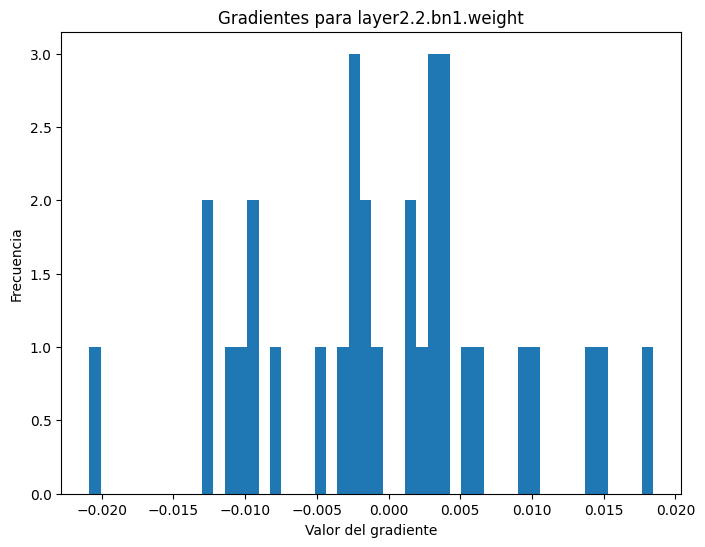

Gradientes para layer2.2.bn1.bias: min=-0.013515915721654892, max=0.0242964755743742, mean=0.0002449867897666991, std=0.007942830212414265


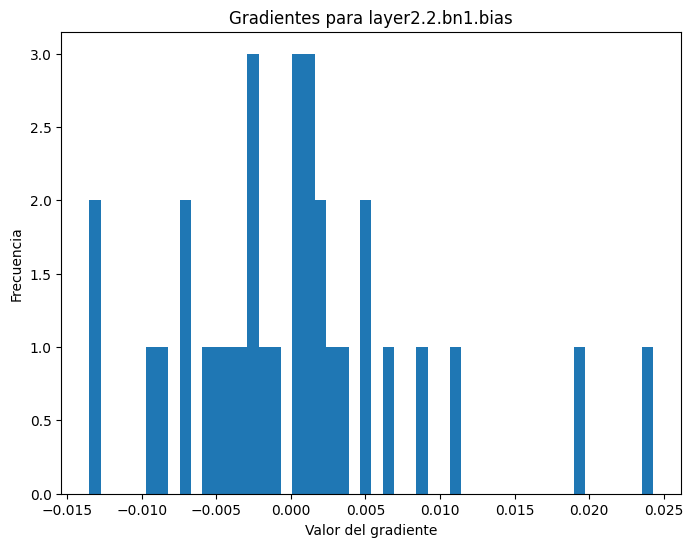

Gradientes para linear.weight: min=-0.10580214858055115, max=0.09591671824455261, mean=3.7252903539730653e-10, std=0.015558992512524128


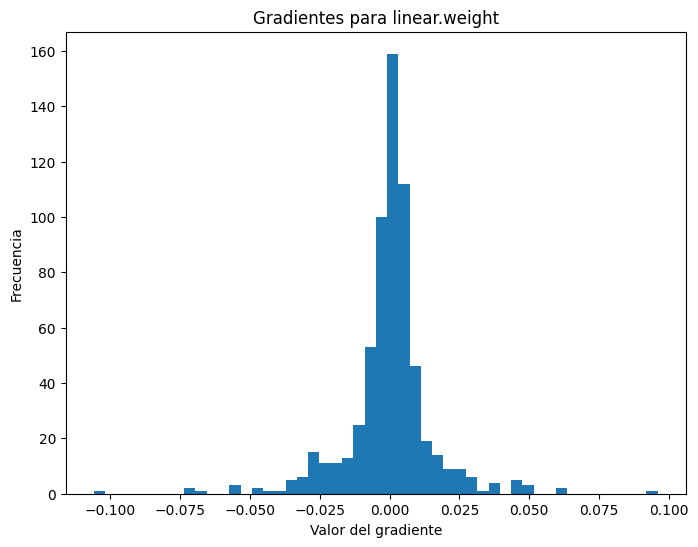

Gradientes para linear.bias: min=-0.046862129122018814, max=0.04313267767429352, mean=-6.519257911286047e-10, std=0.022068651393055916


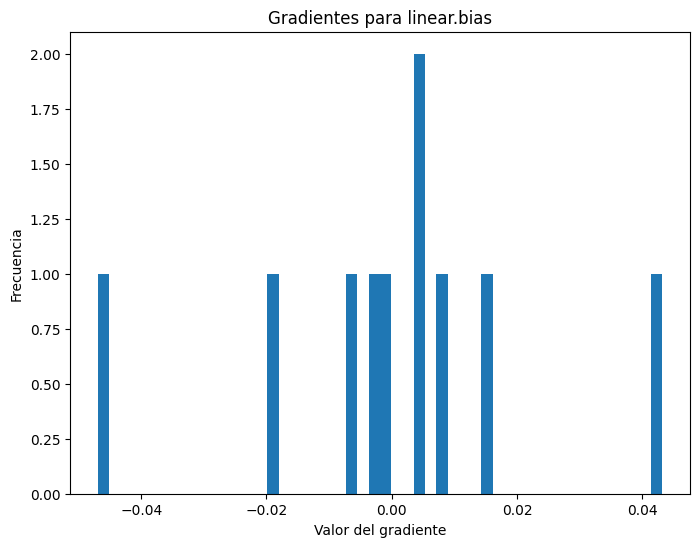

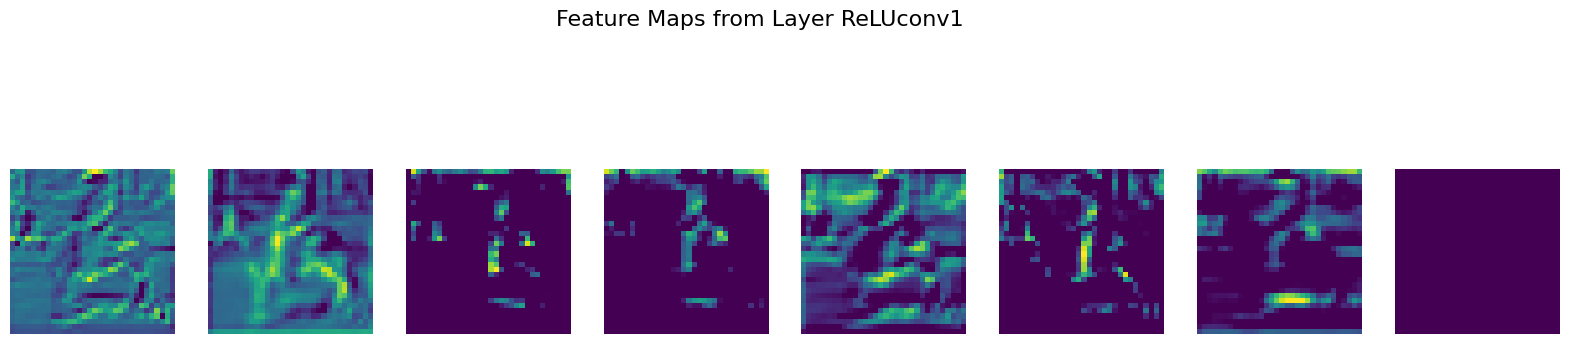

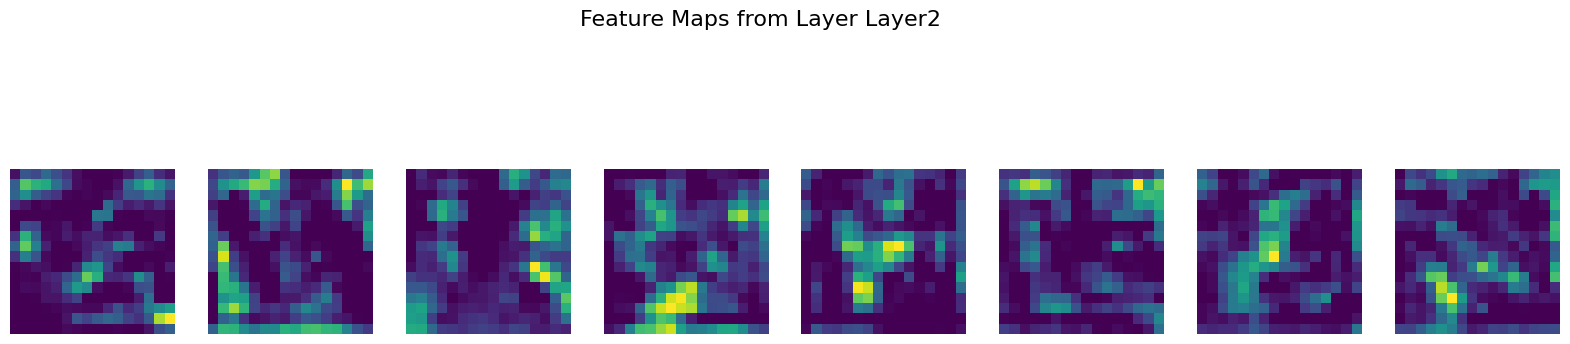

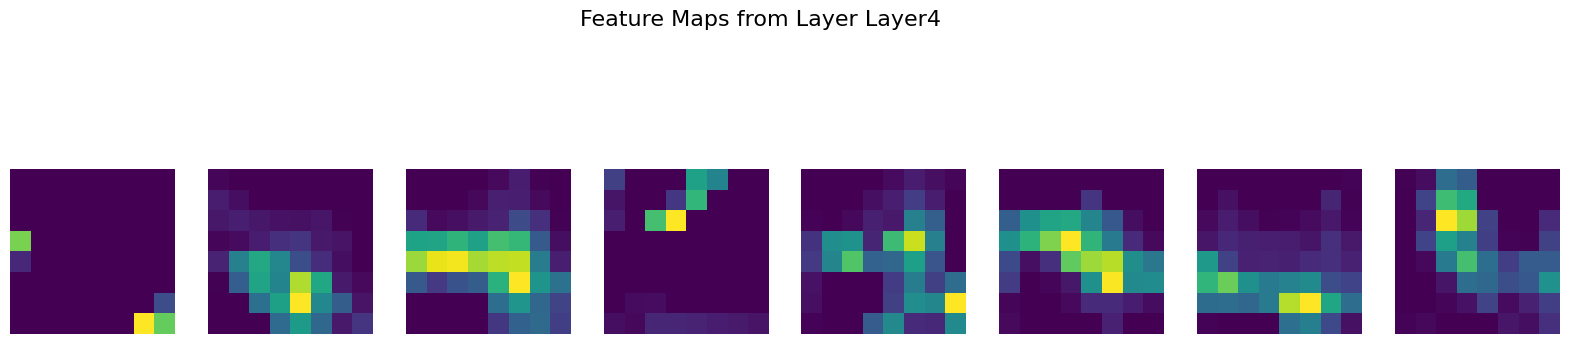

4.000000000000001e-07
Epoch 61/70
Iteración 21155 - Lote 35/352 - Pérdida de Entrenamiento: 0.1885, Precisión de Entrenamiento: 0.9337
Iteración 21190 - Lote 70/352 - Pérdida de Entrenamiento: 0.1954, Precisión de Entrenamiento: 0.9308
Iteración 21225 - Lote 105/352 - Pérdida de Entrenamiento: 0.2023, Precisión de Entrenamiento: 0.9291
Iteración 21260 - Lote 140/352 - Pérdida de Entrenamiento: 0.2052, Precisión de Entrenamiento: 0.9289
Iteración 21295 - Lote 175/352 - Pérdida de Entrenamiento: 0.2062, Precisión de Entrenamiento: 0.9287
Iteración 21330 - Lote 210/352 - Pérdida de Entrenamiento: 0.2060, Precisión de Entrenamiento: 0.9292
Iteración 21365 - Lote 245/352 - Pérdida de Entrenamiento: 0.2061, Precisión de Entrenamiento: 0.9294
Iteración 21400 - Lote 280/352 - Pérdida de Entrenamiento: 0.2058, Precisión de Entrenamiento: 0.9293
Iteración 21435 - Lote 315/352 - Pérdida de Entrenamiento: 0.2049, Precisión de Entrenamiento: 0.9298
Iteración 21470 - Lote 350/352 - Pérdida de Entren

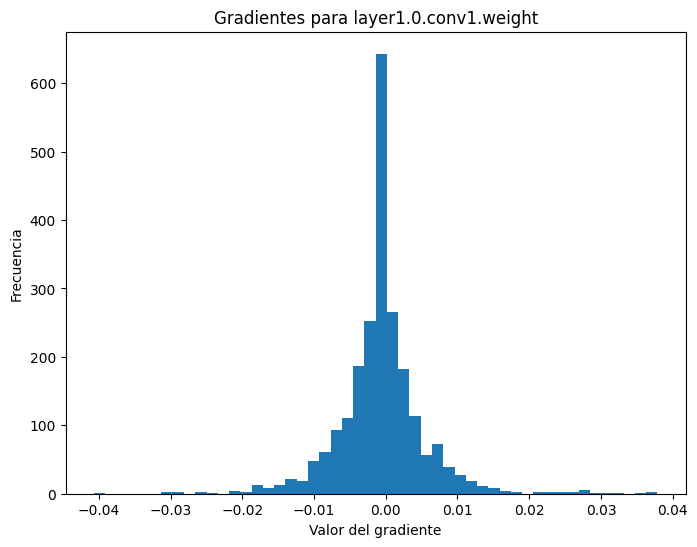

Gradientes para layer1.0.bn1.weight: min=-0.05351758748292923, max=0.03620617836713791, mean=-0.002762177959084511, std=0.023876875638961792


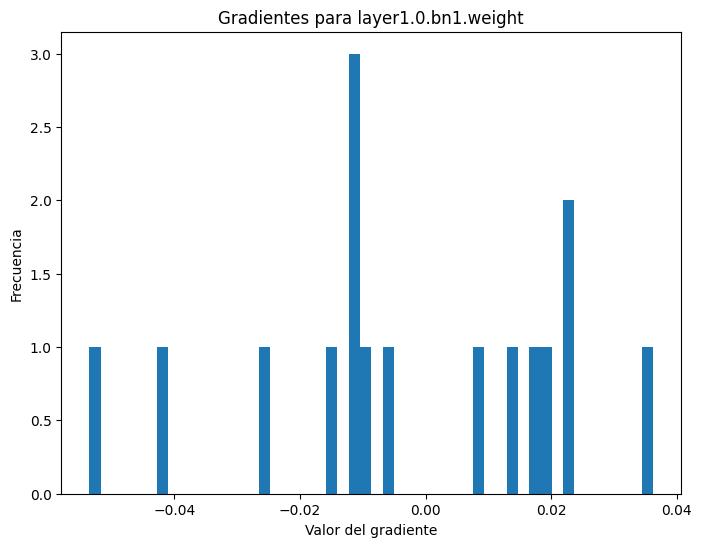

Gradientes para layer1.0.bn1.bias: min=-0.04515331983566284, max=0.03155502676963806, mean=0.003672347404062748, std=0.020171312615275383


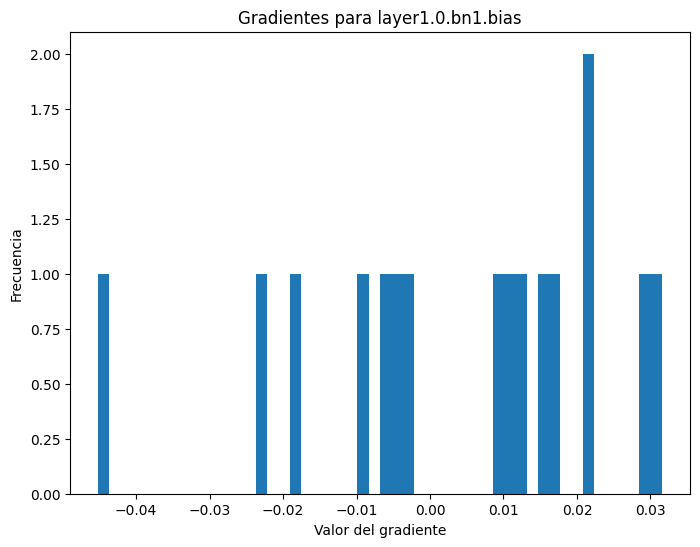

Gradientes para layer2.2.conv1.weight: min=-0.016766058281064034, max=0.01840784400701523, mean=-8.091084055195097e-06, std=0.0028687429148703814


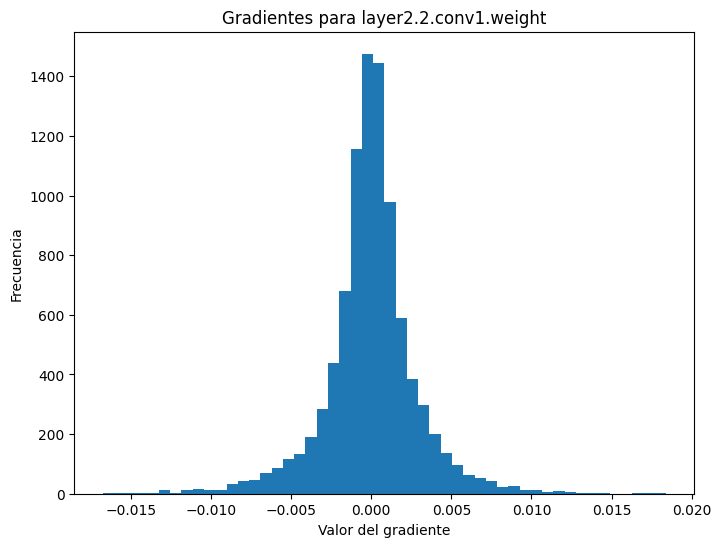

Gradientes para layer2.2.bn1.weight: min=-0.02553543634712696, max=0.014522317796945572, mean=-0.0004032990545965731, std=0.009476231411099434


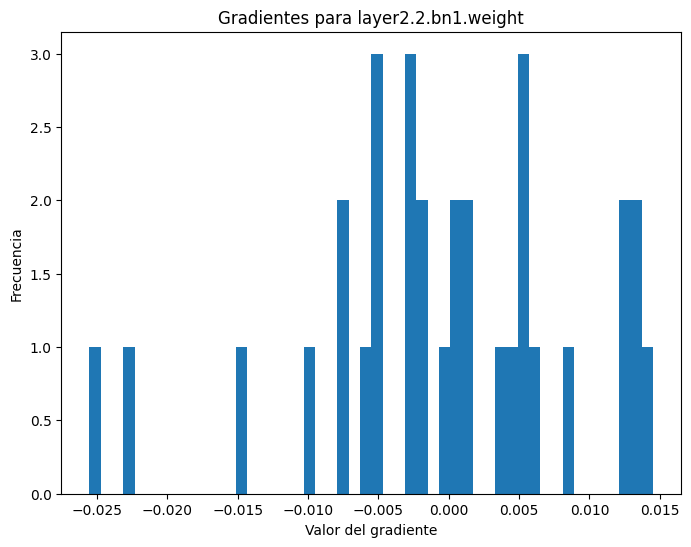

Gradientes para layer2.2.bn1.bias: min=-0.021587491035461426, max=0.0121752405539155, mean=-0.0011019655503332615, std=0.007615162990987301


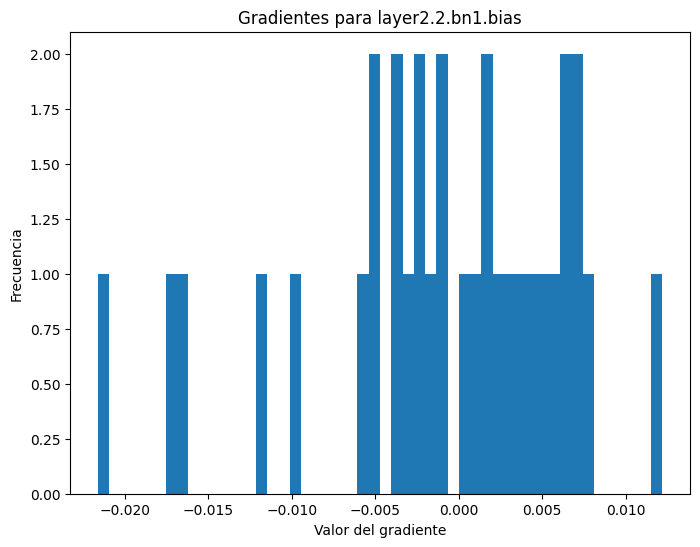

Gradientes para linear.weight: min=-0.04672917723655701, max=0.03276225924491882, mean=5.122274271407434e-10, std=0.009927858598530293


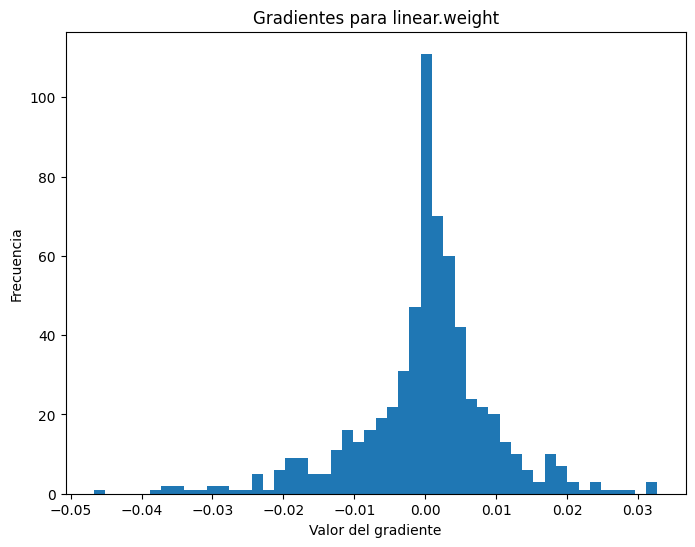

Gradientes para linear.bias: min=-0.026379866525530815, max=0.016723930835723877, mean=1.5832484212552345e-09, std=0.011907173320651054


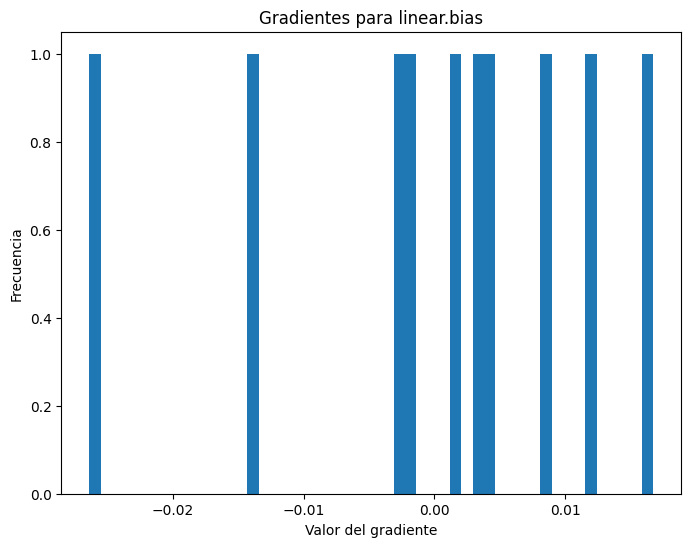

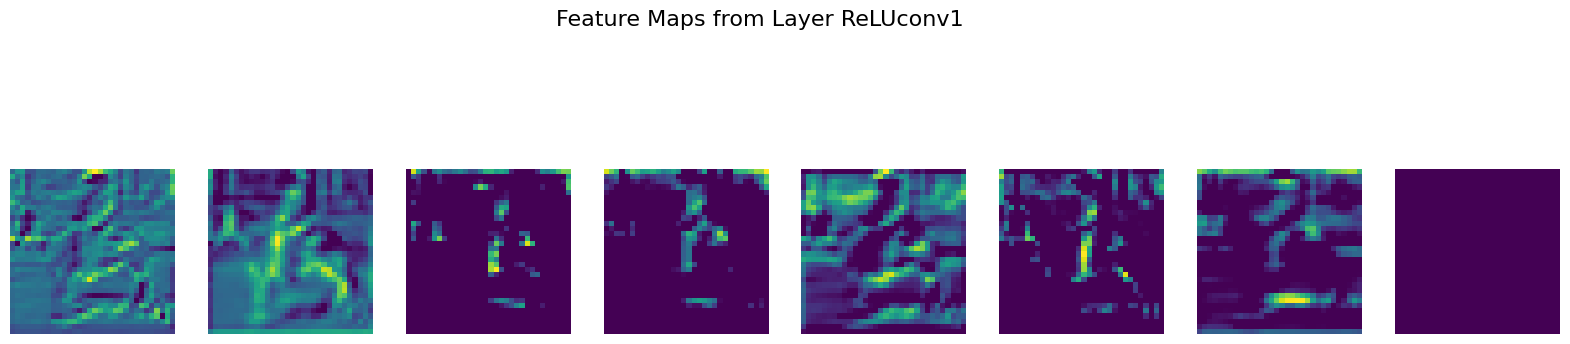

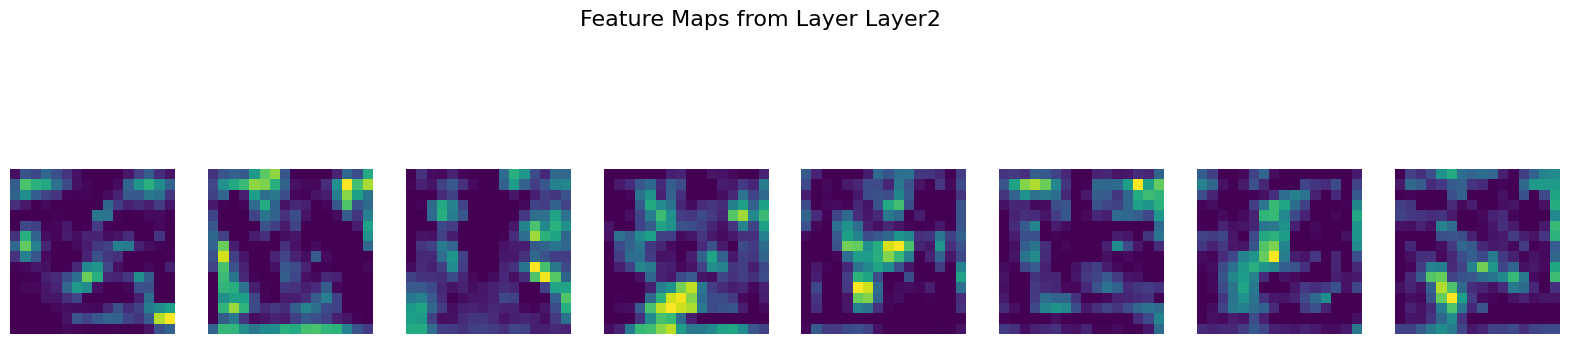

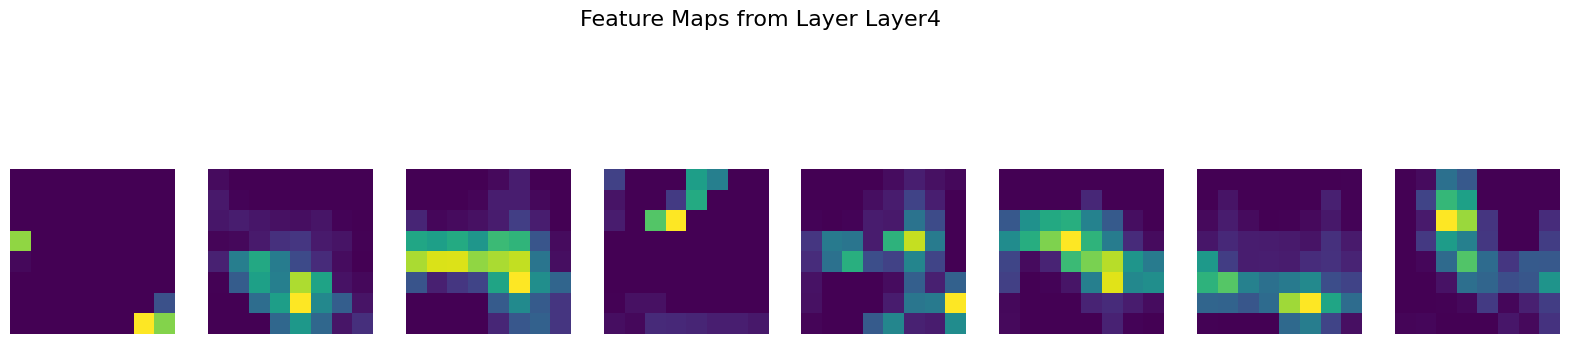

Early stopping at epoch 65

Tiempo total de entrenamiento: 2564.72 segundos


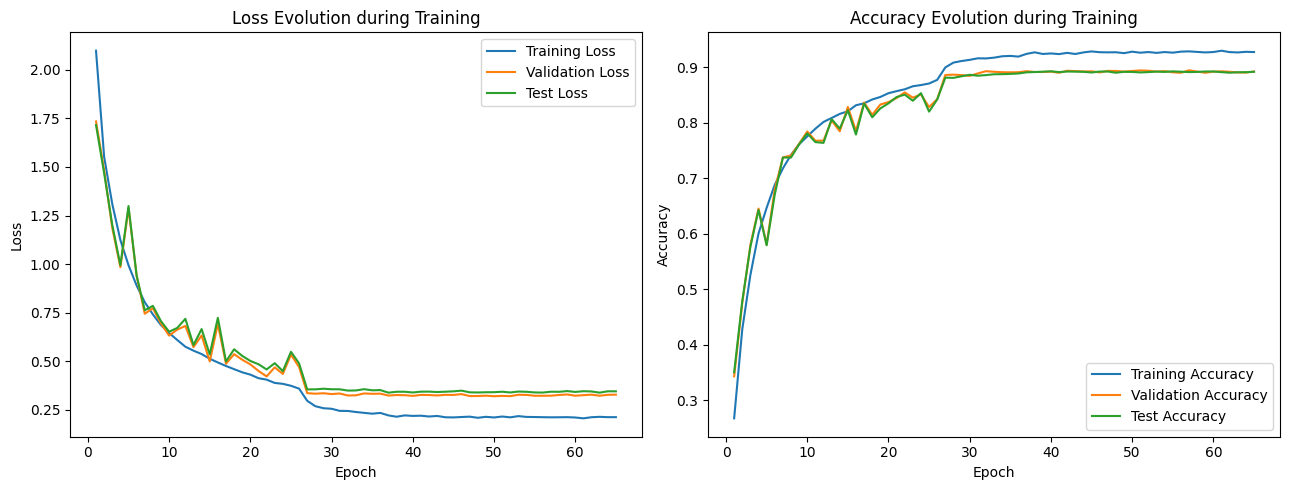

In [ ]:

# Transformaciones para entrenamiento y validación
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),  # Recorte aleatorio después del padding
    torchvision.transforms.RandomHorizontalFlip(),      # Volteo horizontal aleatorio
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

# Cargar datasets CIFAR-10 con transformaciones
train_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=True,
    download=True,
    transform=train_transform  # Se aplica data augmentation aquí
)

test_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=False,
    download=True,
    transform=val_test_transform  # Solo normalización para testing
)

# Dividir dataset de entrenamiento y validación
train_cifar10, _ = torch.utils.data.random_split(train_cifar10, [45000, 5000], generator=torch.Generator().manual_seed(42))
_, val_cifar10 = torch.utils.data.random_split(
    torchvision.datasets.CIFAR10(root="./cifar10", train=True, transform=val_test_transform),
    [45000, 5000], generator=torch.Generator().manual_seed(42)
)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""# ResNet con Profundidad Estocástica"""

__all__ = ['resnet68_SD']


def _weights_init(m):
    """
        Initialization of CNN weights
    """
    classname = m.__class__.__name__
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    """
      Identity mapping between ResNet blocks with different size feature map
    """
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, survival_prob=1.0, option='A'):
        super(BasicBlock, self).__init__()
        self.survival_prob = survival_prob  # Probabilidad de supervivencia

        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        # Conexión de atajo
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 experiment, ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2],
                                                  (0, 0, 0, 0, planes // 4, planes // 4),
                                                  "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes * self.expansion, kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(planes * self.expansion)
                )

    def forward(self, x):
        if self.training and torch.rand(1).item() > self.survival_prob:
            # Si el bloque es "saltado", usa solo la conexión de atajo
            return self.shortcut(x)
        else:
            # Si el bloque no es saltado, aplica la función residual
            out = self.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            if not self.training:
                out = out * self.survival_prob  # Escala la rama residual
            out += self.shortcut(x)
            out = self.relu(out)
            return out



class ResNet68_SD(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, survival_prob=0.8):
        super(ResNet68_SD, self).__init__()
        self.in_planes = 16
        self.survival_prob = survival_prob
        self.num_blocks = sum(num_blocks)  # Número total de bloques
        self.current_block = 0  # Contador de bloques para calcular survival_prob

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)

        # Capas residuales con decaimiento lineal de probabilidad
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(64 * block.expansion, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for s in strides:
            # Calcula survival_prob lineal para cada bloque
            block_survival_prob = 1 - (self.current_block / self.num_blocks) * (1 - self.survival_prob)
            self.current_block += 1
            layers.append(block(self.in_planes, planes, s, survival_prob=block_survival_prob))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        # Convolución inicial
        out = self.relu(self.bn1(self.conv1(x)))
        feature_maps['ReLUconv1'] = out
        out = self.layer1(out)
        out = self.layer2(out)
        feature_maps['Layer2'] = out
        out = self.layer3(out)
        feature_maps['Layer4'] = out
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        # Capa completamente conectada
        out = self.linear(out)
        return out

def resnet68_SD(survival_prob=0.8):
    return ResNet68_SD(BasicBlock, [11, 11, 11], survival_prob=survival_prob)

# Instancia del modelo para verificar
model = resnet68_SD(survival_prob=0.8)
print(model)



# Función para mostrar los gradientes (opcional)
def show_gradients_ResNet_110(model):
    layers_to_show = ['layer1.0.conv1', 'layer1.0.bn1', 'layer2.2.conv1', 'layer2.2.bn1', 'linear']  # Capas inicial, intermedia y final
    for name, param in model.named_parameters():
        if any(layer in name for layer in layers_to_show) and param.requires_grad and param.grad is not None:
            grad = param.grad.cpu().numpy()
            print(f"Gradientes para {name}: min={grad.min()}, max={grad.max()}, mean={grad.mean()}, std={grad.std()}")
            plt.figure(figsize=(8, 6))
            plt.hist(grad.flatten(), bins=50)
            plt.title(f'Gradientes para {name}')
            plt.xlabel('Valor del gradiente')
            plt.ylabel('Frecuencia')
            plt.show()

def show_curves(curves):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    fig.set_facecolor('white')

    epochs = np.arange(len(curves["val_loss"])) + 1

    # Pérdida
    ax[0].plot(epochs, np.array(curves['train_loss']), label='Training Loss')
    ax[0].plot(epochs, np.array(curves['val_loss']), label='Validation Loss')
    ax[0].plot(epochs, np.array(curves['test_loss']), label='Test Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Evolution during Training')
    ax[0].legend()

    # Precisión
    ax[1].plot(epochs, np.array(curves['train_acc']), label='Training Accuracy')
    ax[1].plot(epochs, np.array(curves['val_acc']), label='Validation Accuracy')
    ax[1].plot(epochs, np.array(curves['test_acc']), label='Test Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Evolution during Training')
    ax[1].legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.show()

# Visualizar mapas de características (opcional)
def show_feature_maps(feature_maps):
    for layer_name, feature_map in feature_maps.items():
        fmap = feature_map[0].cpu().numpy()  # Convert to CPU and NumPy for visualization
        num_feature_maps = fmap.shape[0]

        # Plot a grid of feature maps (first 8 feature maps)
        fig, axes = plt.subplots(1, min(8, num_feature_maps), figsize=(20, 5))
        fig.suptitle(f"Feature Maps from Layer {layer_name}", fontsize=16)

        for i in range(min(8, num_feature_maps)):
            axes[i].imshow(fmap[i], cmap='viridis')
            axes[i].axis('off')

        plt.show()

# Training step function
def train_step(x_batch, y_batch, model, optimizer, criterion, device):
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_predicted = model(x_batch)
    loss = criterion(y_predicted, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return y_predicted, loss

# Funciones para guardar y cargar checkpoints (opcional)
def checkpoint_save(model, optimizer, epoch, filename):
    checkpoint_data = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint_data, os.path.join(checkpoint_dir, filename))
    print(f"Checkpoint guardado en {os.path.join(checkpoint_dir, filename)}")

def checkpoint_resume(model, optimizer, filename):
    checkpoint_path = os.path.join(checkpoint_dir, filename)
    if os.path.isfile(checkpoint_path):
        checkpoint_data = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint_data['model_state_dict'])
        optimizer.load_state_dict(checkpoint_data['optimizer_state_dict'])
        epoch = checkpoint_data['epoch']
        print(f"Checkpoint cargado desde '{checkpoint_path}' (época {epoch})")
        return epoch
    else:
        print(f"No se encontró ningún checkpoint en '{checkpoint_path}'")
        return None

# Evaluation function
def evaluate(val_loader, model, criterion, device):
    model.eval()
    cumulative_loss = 0
    cumulative_corrects = 0
    data_count = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            final_output = model(imgs)
            loss = criterion(final_output, labels)
            cumulative_loss += loss.item() * len(labels)
            data_count += len(labels)
            _, pred_class = final_output.max(1)
            cumulative_corrects += (pred_class == labels).sum().item()
    val_acc = cumulative_corrects / data_count
    val_loss = cumulative_loss / data_count
    return val_acc, val_loss


# Función de entrenamiento
def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    max_iterations,
    criterion,
    batch_size,
    lr,
    weight_decay,
    n_evaluations_per_epoch,
    early_stop_thresh,
    show_gradients,
    patience,
    use_gpu=True,
    data_augmentation=False,
    resume_checkpoint=None
):
    original_transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

    if data_augmentation:
        train_dataset.dataset.transform = torchvision.transforms.Compose([
            torchvision.transforms.RandomCrop(32, padding=4),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
        ])
    else:
        train_dataset.dataset.transform = original_transform

    print(f"Using train transform: {train_dataset.dataset.transform}")
    print(f"Using validation transform: {val_dataset.dataset.transform}")

    # Usar GPU si está disponible
    device = torch.device('cuda' if use_gpu else 'cpu')
    model = model.to(device)

    # DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=use_gpu)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)
    test_loader = torch.utils.data.DataLoader(test_cifar10, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience, threshold=0.0001, threshold_mode='abs')
    scaler = torch.amp.GradScaler()
    # Inicializar curvas incluyendo las del conjunto de prueba
    curves = {"train_acc": [], "val_acc": [], "test_acc": [],
              "train_loss": [], "val_loss": [], "test_loss": [],
              "epoch_times": []}
    t0 = time.perf_counter()
    iteration = 0
    n_batches = len(train_loader)
    start_epoch = 0
    if resume_checkpoint is not None:
        start_epoch = checkpoint_resume(model, optimizer, resume_checkpoint)
        print(f"Reanudando desde la época {start_epoch}")

    best_val_loss = float('inf')
    best_epoch = -1
    early_stop_counter = 0

    for epoch in range(start_epoch, epochs):
        print(optimizer.param_groups[0]["lr"])
        print(f"\rEpoch {epoch + 1}/{epochs}")
        cumulative_train_loss = 0
        cumulative_train_corrects = 0
        train_loss_count = 0
        train_acc_count = 0

        # Inicio de medición de tiempo por época
        epoch_start_time = time.perf_counter()

        model.train()
        for i, (x_batch, y_batch) in enumerate(train_loader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, device)

            cumulative_train_loss += loss.item()
            train_loss_count += 1
            train_acc_count += y_batch.shape[0]

            # Cálculo de precisión
            class_prediction = torch.argmax(y_predicted, axis=1).long()
            cumulative_train_corrects += (y_batch == class_prediction).sum().item()

            # Registro de métricas
            if (i + 1) % (n_batches // n_evaluations_per_epoch) == 0:
                train_loss = cumulative_train_loss / train_loss_count
                train_acc = cumulative_train_corrects / train_acc_count

                print(
                    f"Iteración {iteration + 1} - Lote {i + 1}/{n_batches} - "
                    f"Pérdida de Entrenamiento: {train_loss:.4f}, Precisión de Entrenamiento: {train_acc:.4f}"
                )

            iteration += 1
            if iteration >= max_iterations:
                print(f"Número máximo de iteraciones alcanzado: {max_iterations}")
                break

        # Fin de medición de tiempo por época
        epoch_end_time = time.perf_counter()
        epoch_duration = epoch_end_time - epoch_start_time
        curves["epoch_times"].append(epoch_duration)

        print(f"Tiempo de la época {epoch + 1}: {epoch_duration:.2f} segundos")

        # Evaluación en el conjunto de validación
        val_acc, val_loss = evaluate(val_loader, model, criterion, device)
        print(f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

        # **Evaluación en el conjunto de prueba**
        test_acc, test_loss = evaluate(test_loader, model, criterion, device)
        print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

        train_loss = cumulative_train_loss / train_loss_count
        train_acc = cumulative_train_corrects / train_acc_count

        curves["train_acc"].append(train_acc)
        curves["val_acc"].append(val_acc)
        curves["test_acc"].append(test_acc)
        curves["train_loss"].append(train_loss)
        curves["val_loss"].append(val_loss)
        curves["test_loss"].append(test_loss)
        scheduler.step(val_loss)

        # Checkpointing del mejor modelo basado en la pérdida de validación
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            early_stop_counter = 0
            checkpoint_filename = f"best_checkpoint_epoch_{epoch + 1}.pth"
            checkpoint_save(model, optimizer, epoch, checkpoint_filename)
            print(f"Checkpoint del mejor modelo guardado en la época {epoch + 1}")
        else:
            early_stop_counter += 1

        if epoch + 1 == 1 or (epoch + 1) % 5 == 0 or early_stop_counter >= early_stop_thresh:
            show_gradients(model)
            show_feature_maps(feature_maps)

        if early_stop_counter >= early_stop_thresh:
            print(f"Early stopping at epoch {epoch + 1}")
            break

        if iteration >= max_iterations:
            break

    total_training_time = sum(curves["epoch_times"])
    print(f"\nTiempo total de entrenamiento: {total_training_time:.2f} segundos")

    # Asegurarse de que el modelo esté en CPU después del entrenamiento
    model.cpu()

    if data_augmentation:
        train_dataset.dataset.transform = original_transform

    return curves

# Configuraciones
use_gpu = torch.cuda.is_available()

# Directorio para guardar checkpoints (opcional)
checkpoint_dir = "/content/drive/MyDrive/CheckpointsResNet68_SD"
os.makedirs(checkpoint_dir, exist_ok=True)
feature_maps = {}
if __name__ == "__main__":
    # Hiperparámetros
    batch_size = 128
    epochs = 70
    max_iterations = 600000  # Ajusta según sea necesario
    learning_rate = 0.04
    n_evaluations_per_epoch = 10
    data_augmentation = True
    weight_decay = 1e-4
    early_stop_thresh = 15
    patience = 3
    survival_prob = 0.8  # Probabilidad de supervivencia para la profundidad estocástica

    # Inicializar el modelo con profundidad estocástica
    model = resnet68_SD(survival_prob=0.8)

    # Definir función de pérdida
    criterion = nn.CrossEntropyLoss()

    # Entrenar el modelo
    curves = train_model(
        model=model,
        train_dataset=train_cifar10,
        val_dataset=val_cifar10,
        epochs=epochs,
        max_iterations=max_iterations,
        criterion=criterion,
        batch_size=batch_size,
        lr=learning_rate,
        n_evaluations_per_epoch=n_evaluations_per_epoch,
        early_stop_thresh=early_stop_thresh,
        show_gradients=show_gradients_ResNet_110,
        patience=patience,
        use_gpu=use_gpu,
        data_augmentation=data_augmentation,
        resume_checkpoint=None,  # Establece a una cadena de caracteres para reanudar, por ejemplo, "best_checkpoint_epoch_10.pth"
        weight_decay=weight_decay
    )

    # Plotear curvas de entrenamiento
    show_curves(curves)



In [ ]:
__all__ = ['ResNet', 'resnet68_SD']

def test(net):
    total_params = 0

    for x in filter(lambda p: p.requires_grad, net.parameters()):
        total_params += np.prod(x.data.numpy().shape)
    print("Total number of params", total_params)
    print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size())>1, net.parameters()))))


if __name__ == "__main__":
    for net_name in __all__:
        if net_name.startswith('resnet'):
            print(net_name)
            test(globals()[net_name]())
            print()

resnet68_SD
Total number of params 1047450
Total layers 68

